# SNe Gas Loss Analysis
## Fall 2023
### Author: Mitsuru Watanabe

**Key findings**
- fraction of SN-driven gas loss is relatively constant over time
- SN-driven discharged gas loss is higher for small galaxies
- Permanently expelled gas loss is higher for smaller galaxies
- No significant indication of above results vary by different times at infall
- Constant effect of SN-heating on removing the gas via mass loading factor plot


From the past summer, we found that the ratio of $M_{sn,discharged}/M_{discharged}$ is larger in massive galaxies. We might argue that the push of SN-driven outflow is needed for the gas to be discharged when the stellar mass is high. We will investigate this result further, by looking at fraction vs time plot once again.

In [1]:
import pynbody
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec

from base import *
from compiler import *
from analysis import *

base.py executed
compiler.py executed


In [2]:
# quick check to ensure all selected satellites are accounted for.
path = f'{rootPath}SNe-heated_Gas_Flow/SNeData/predischarged_particles.hdf5'
import h5py
with h5py.File(path) as data:
    print(len(data.keys()), 'Available keys:', *data.keys())

29 Available keys: h148_10 h148_12 h148_2 h148_249 h148_251 h148_27 h148_282 h148_3 h148_34 h148_38 h148_4 h148_55 h148_6 h148_65 h229_14 h229_18 h229_20 h229_22 h229_49 h242_10 h242_21 h242_30 h242_38 h242_401 h242_69 h242_8 h329_117 h329_29 h329_7


## Fraction of SN-driven discharged gas over time

In [3]:
# quick calc. for ubiquitous weights in plotting.
@pynbody.derived_array
def wt(*gas):
    if len(gas) == 1:
        return np.array(gas[0]['mass'] / gas[0]['mass'].sum())
    
    else:
        return np.array(gas[0]['mass'] / gas[1]['mass'].sum())

found the keys, starting with:  h148_10
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <
Loaded: h148_10


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


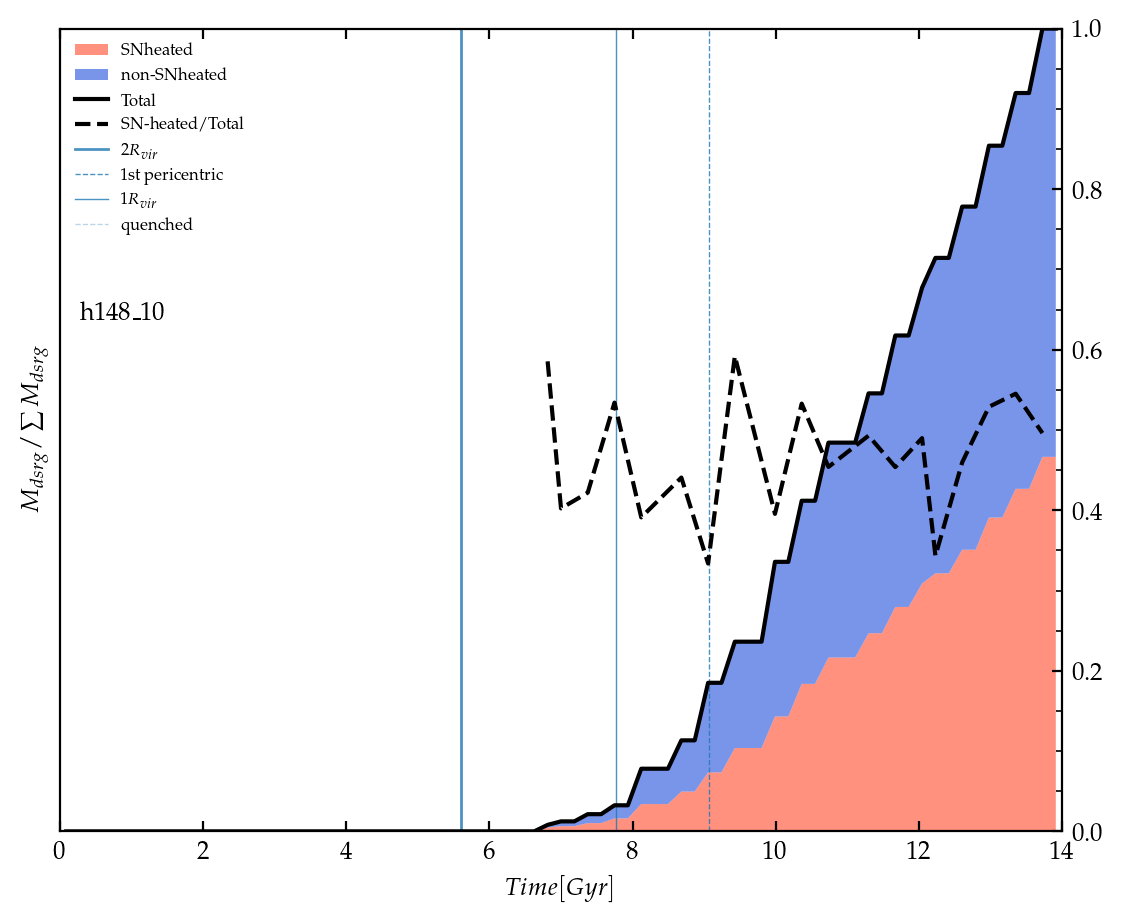

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_12 <
Loaded: h148_12


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


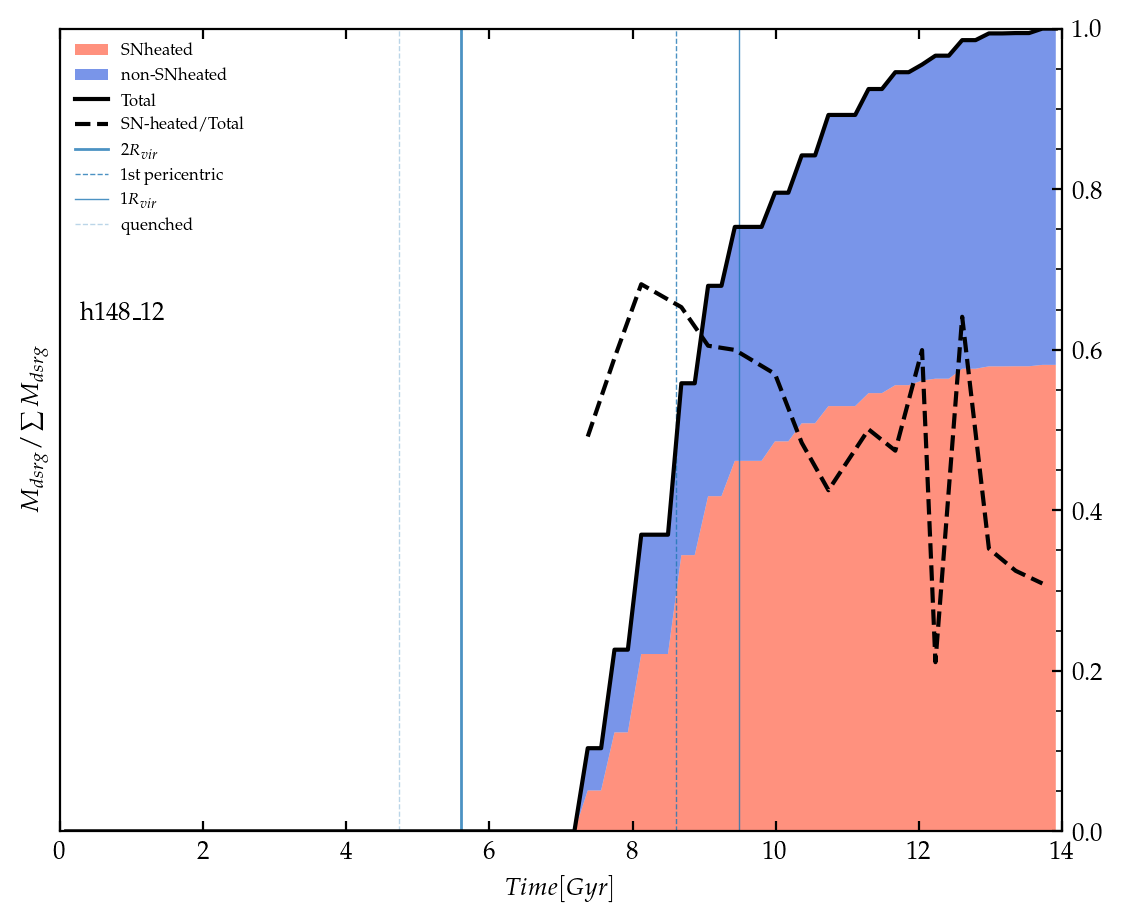

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_2 <
Loaded: h148_2


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


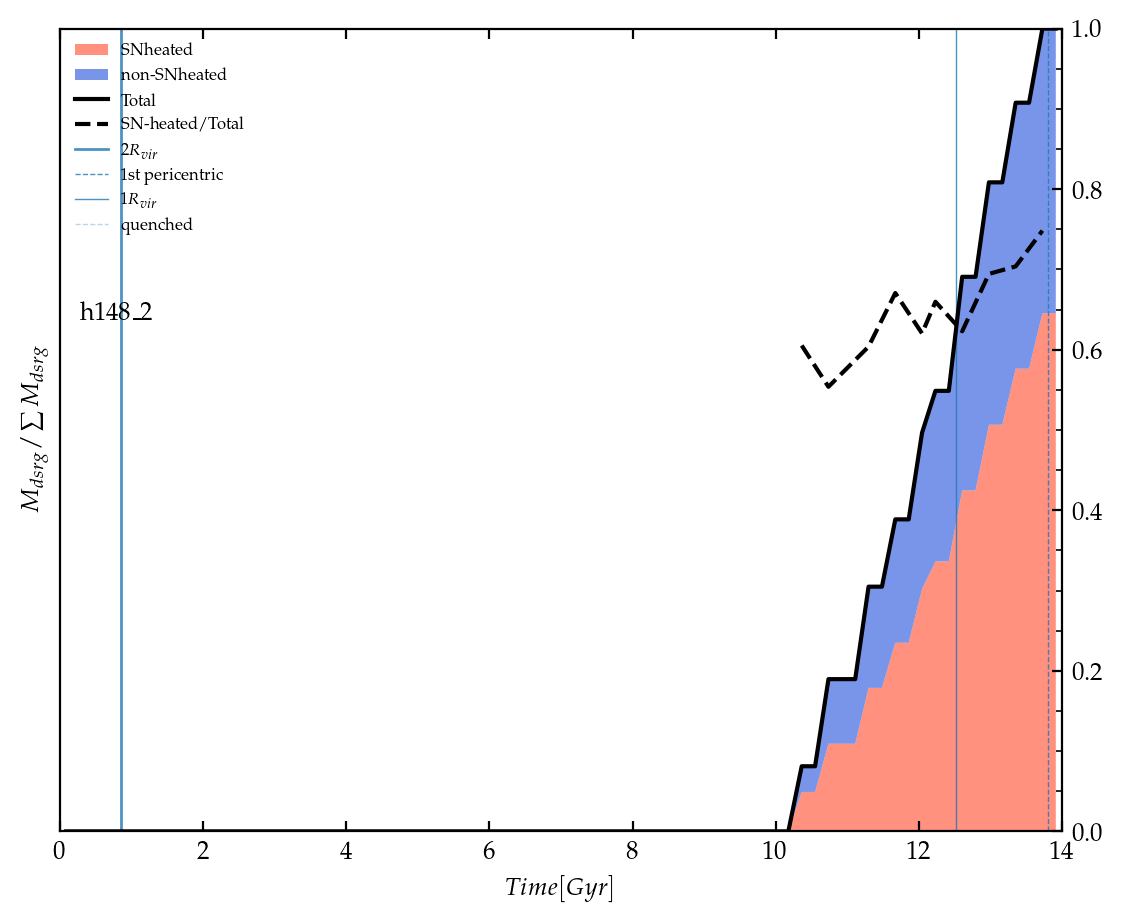

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_249 <
Loaded: h148_249


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


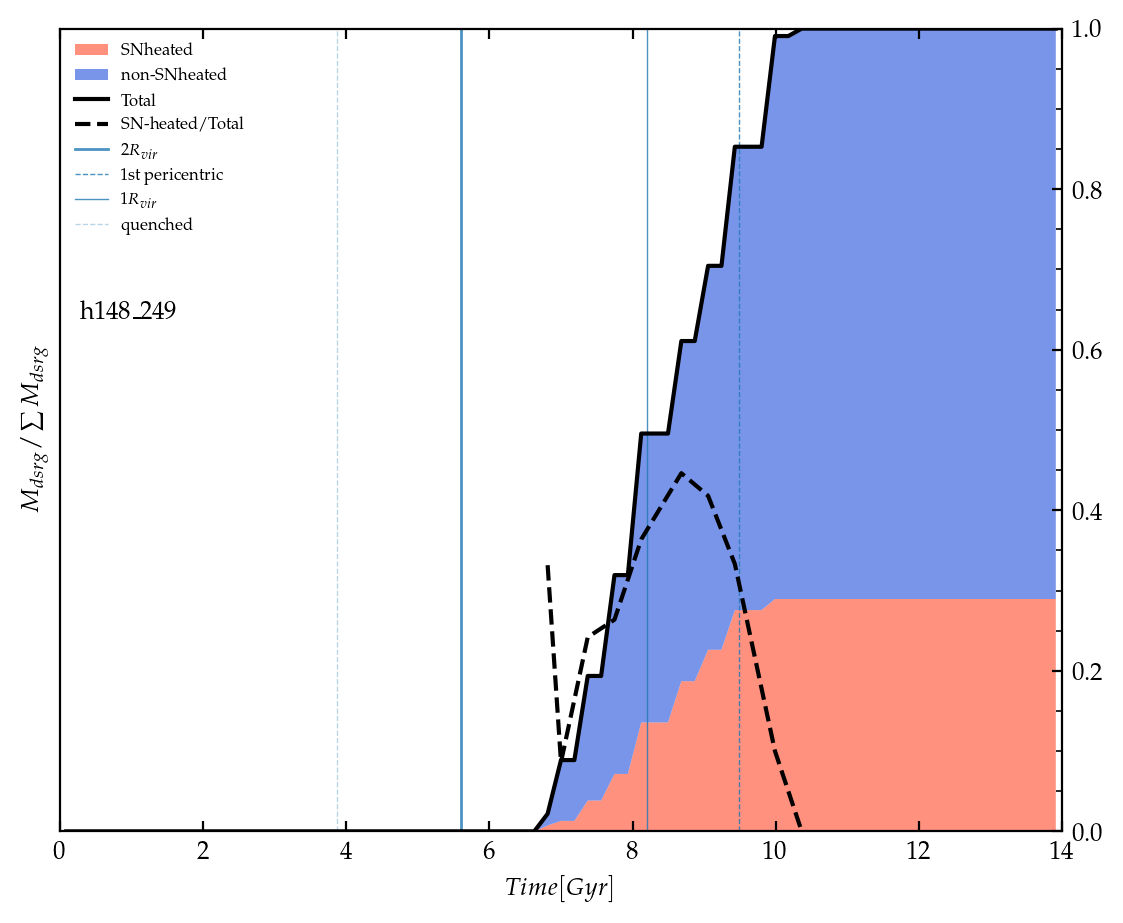

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_251 <
Loaded: h148_251


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


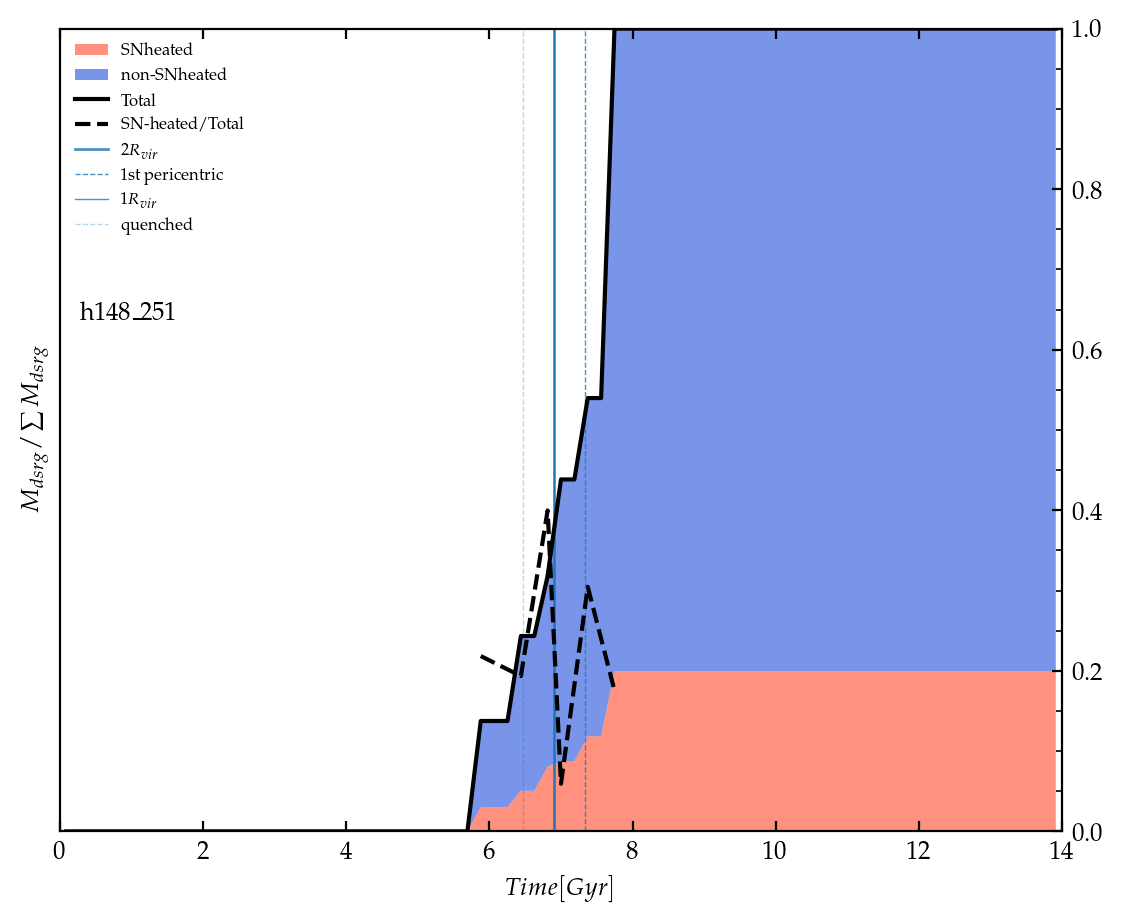

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_27 <
Loaded: h148_27


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


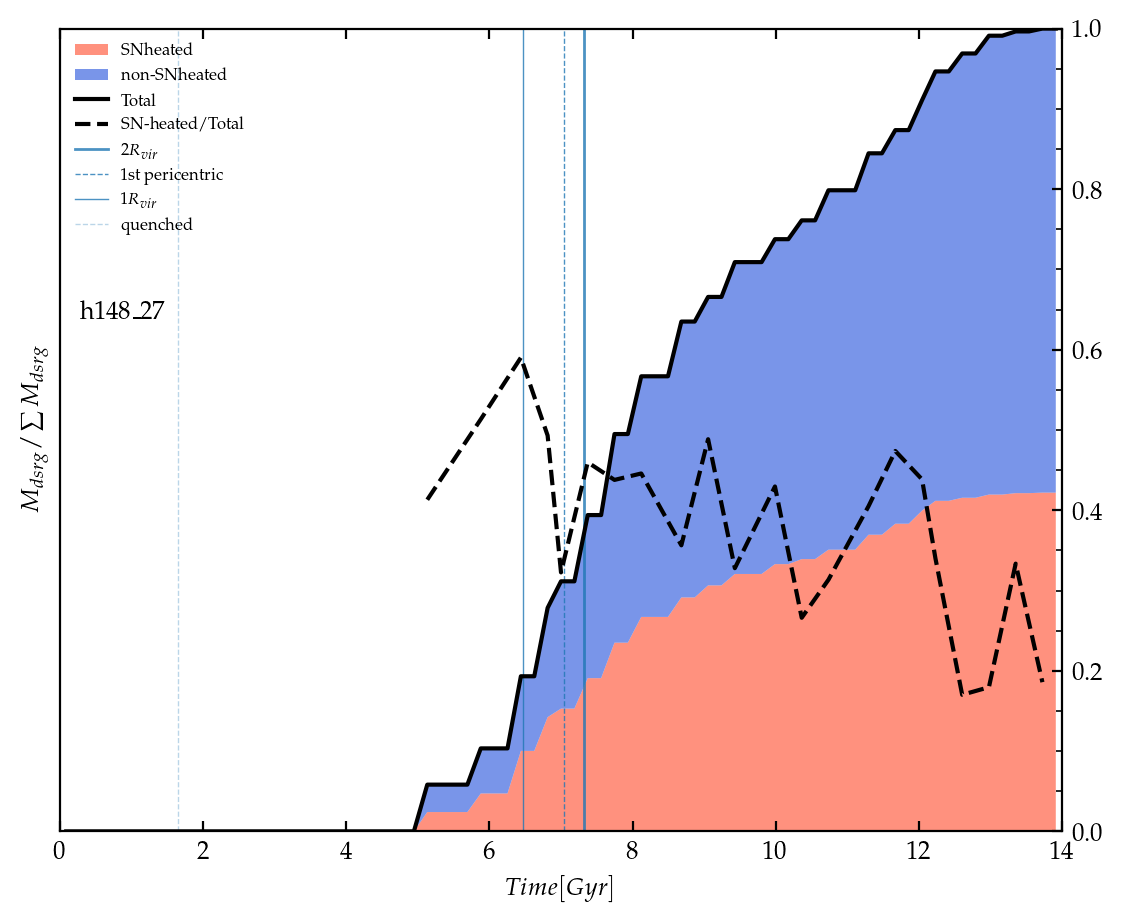

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_282 <
Loaded: h148_282


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


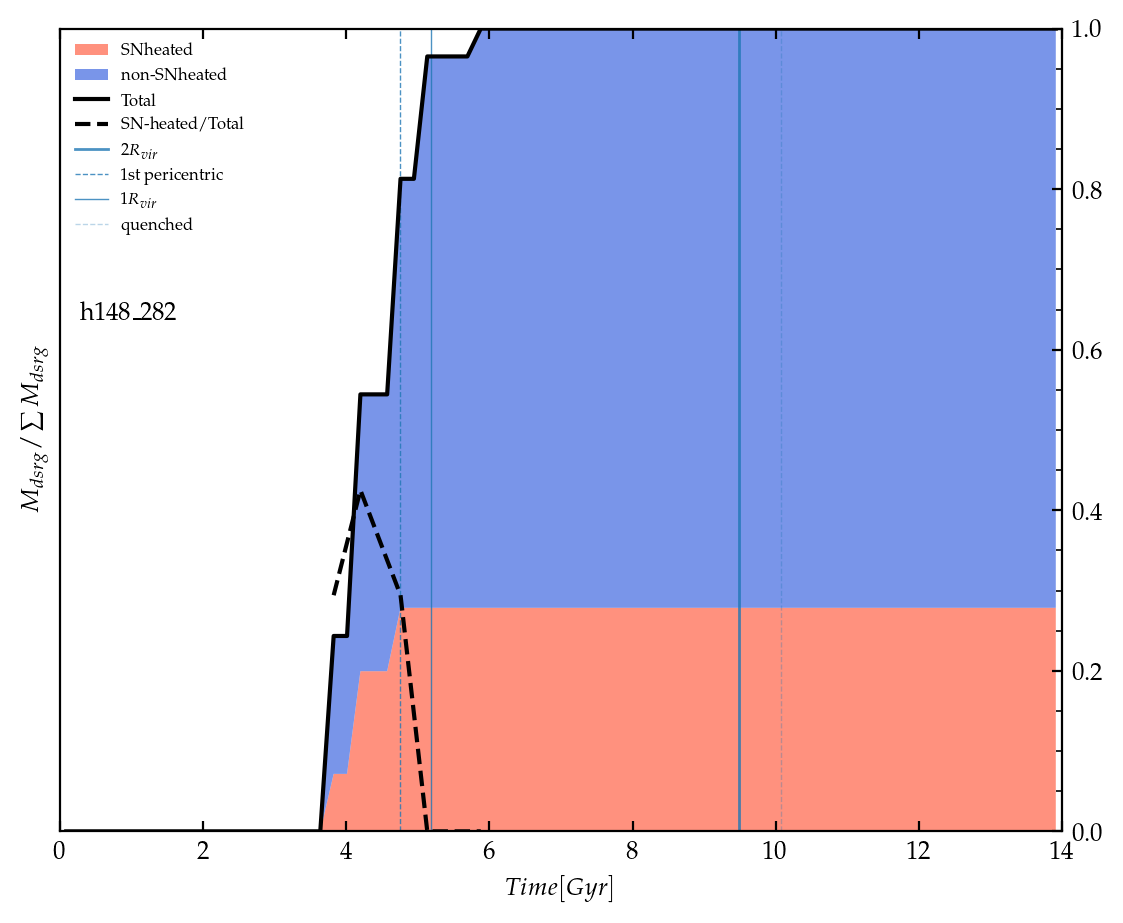

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_3 <
Loaded: h148_3


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


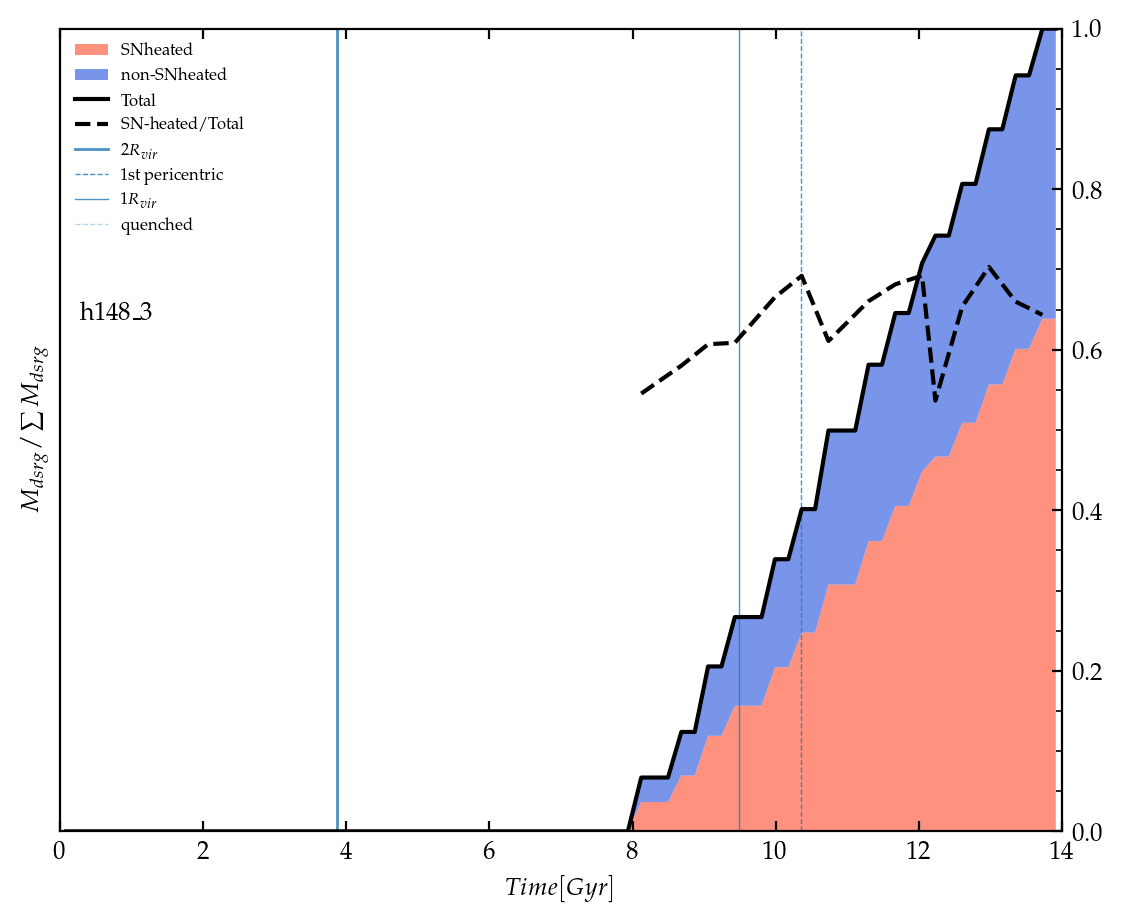

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_34 <
Loaded: h148_34


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


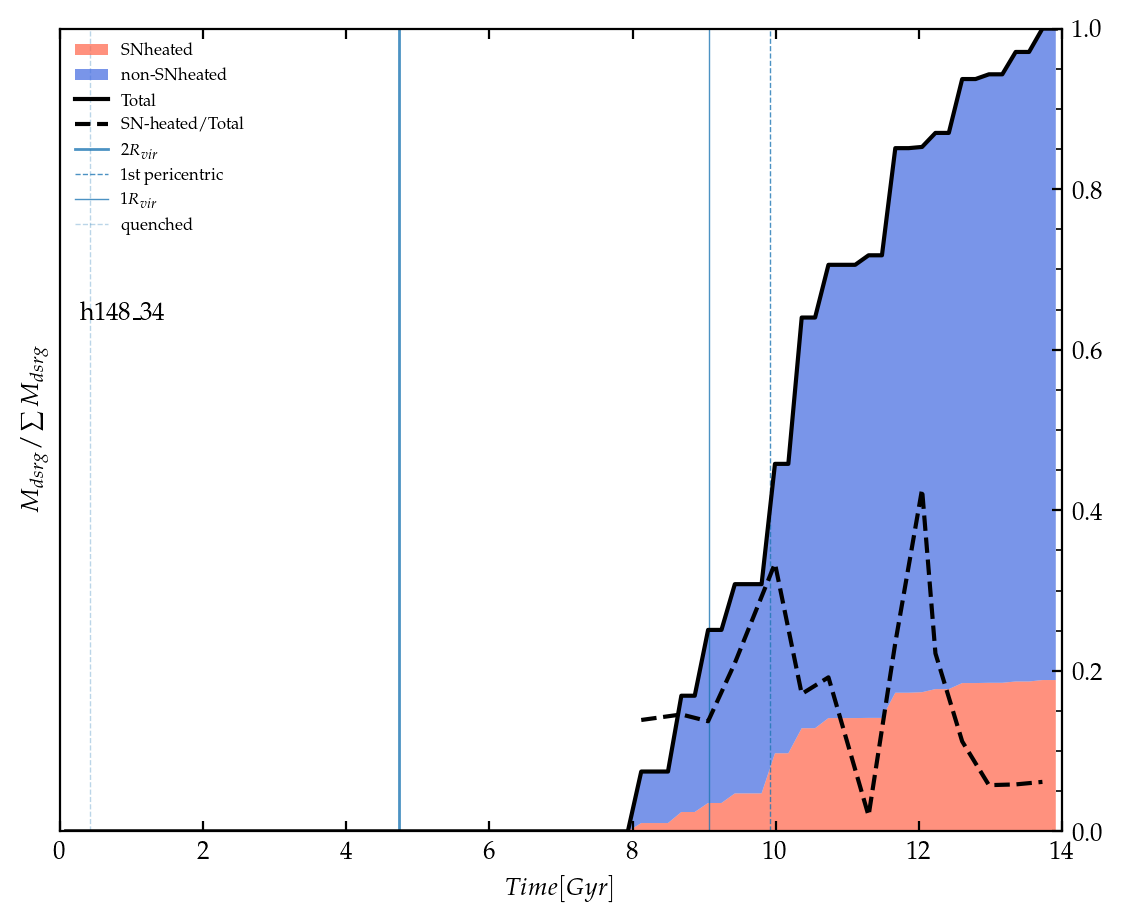

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_38 <
Loaded: h148_38


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


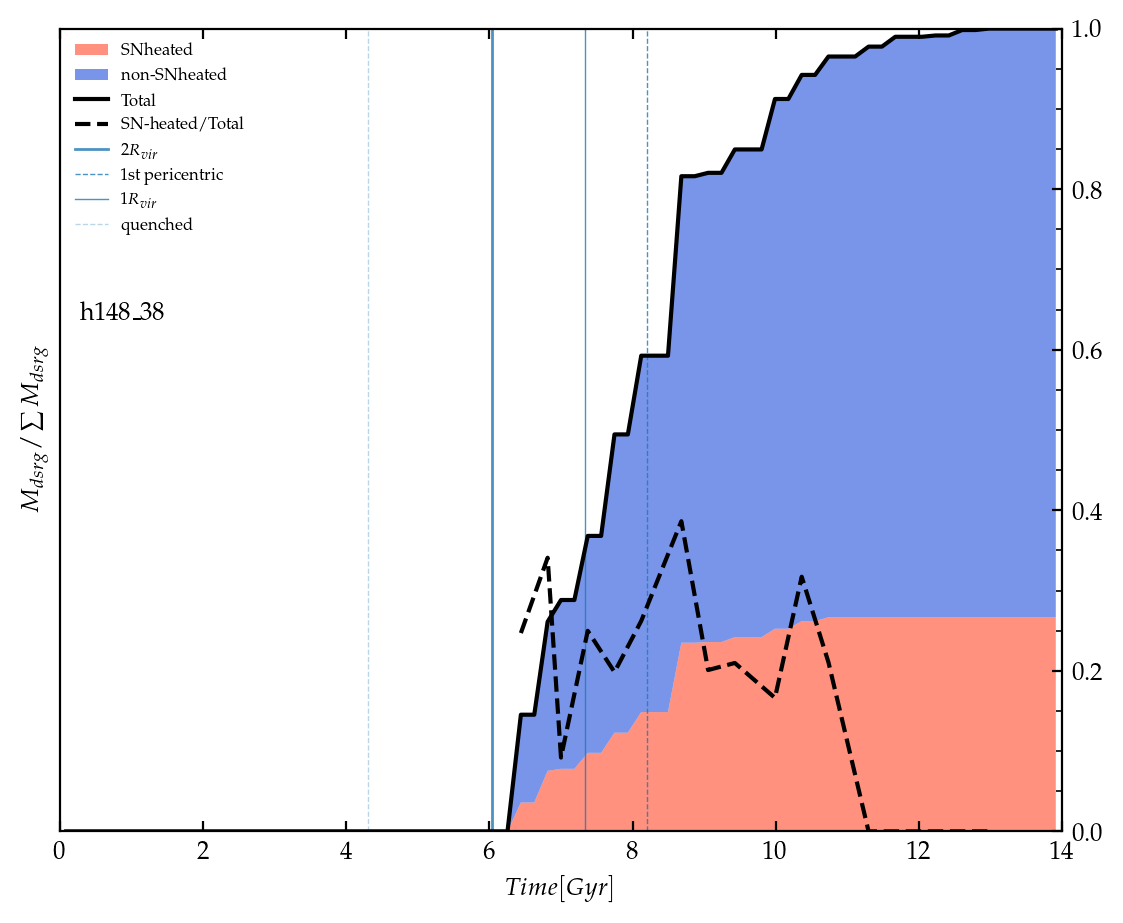

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_4 <
Loaded: h148_4


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


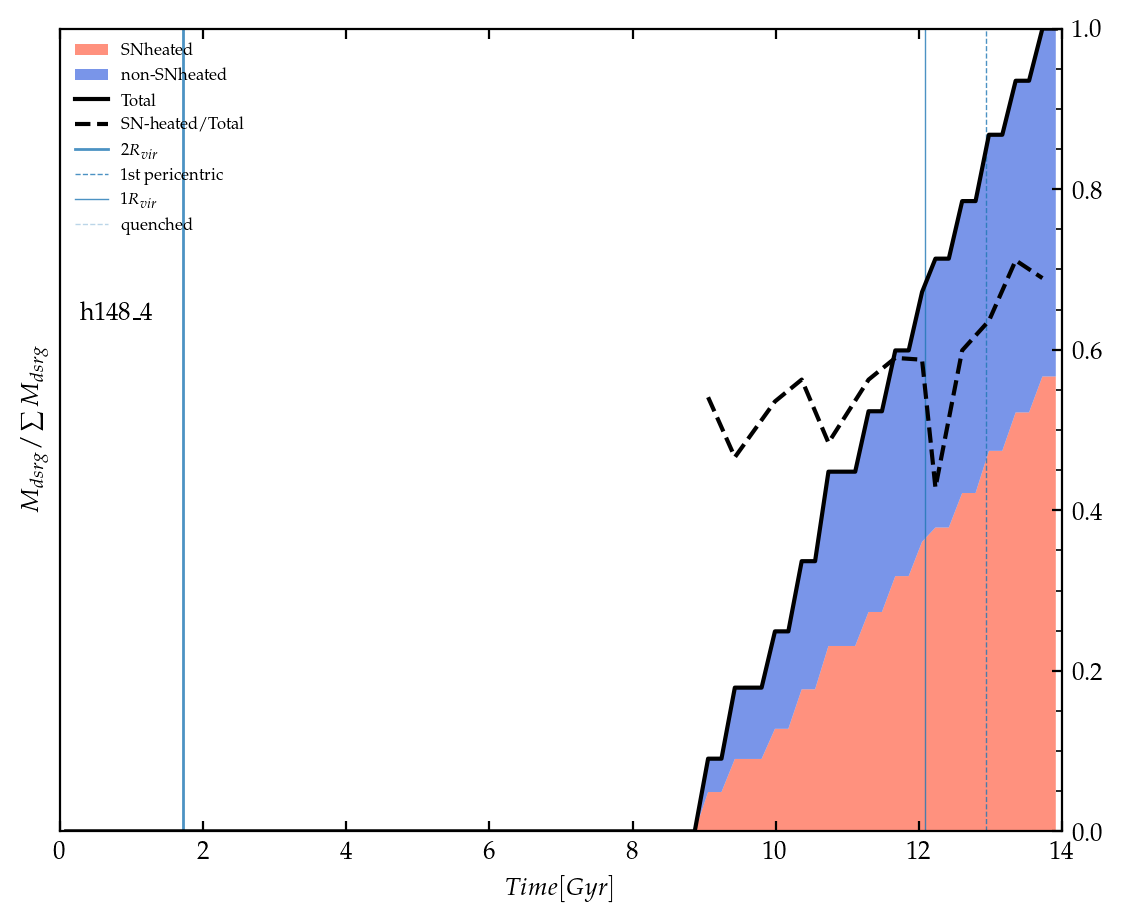

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_55 <
Loaded: h148_55


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


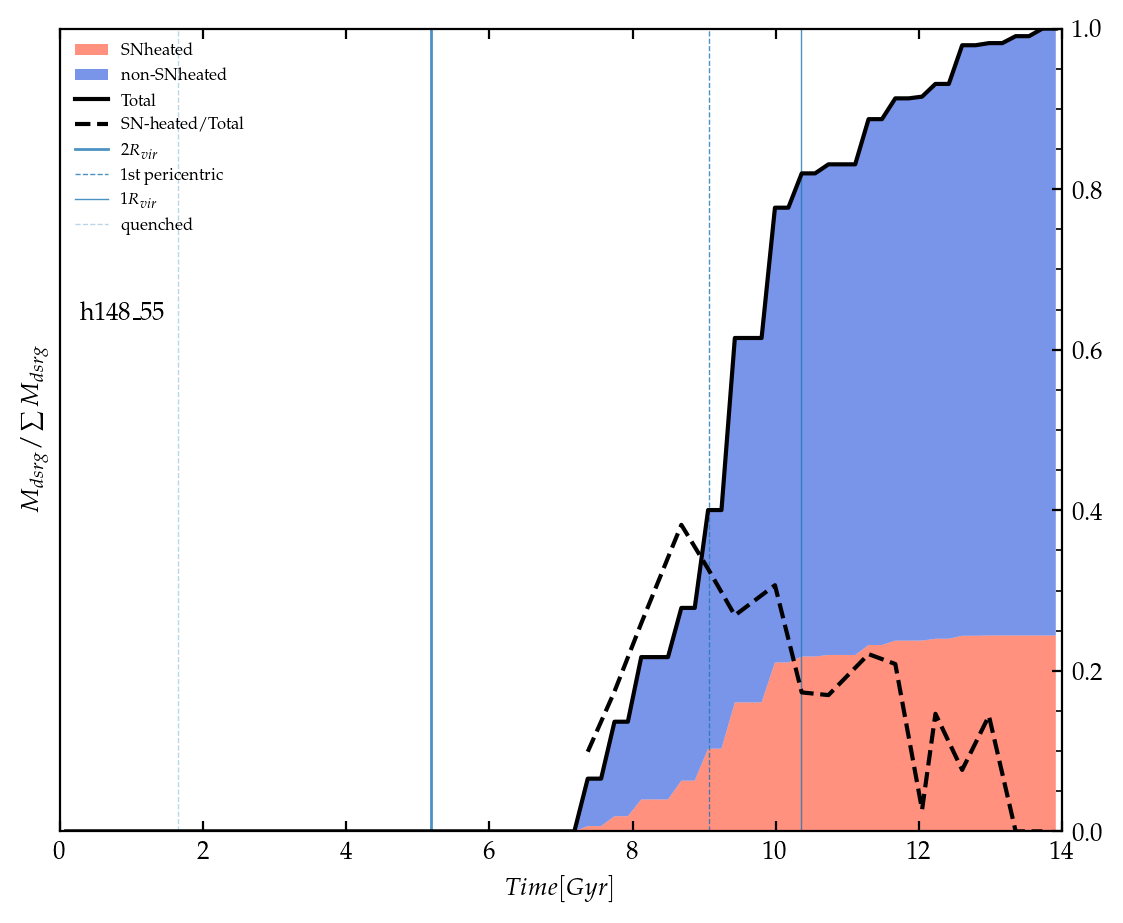

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_6 <
Loaded: h148_6


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


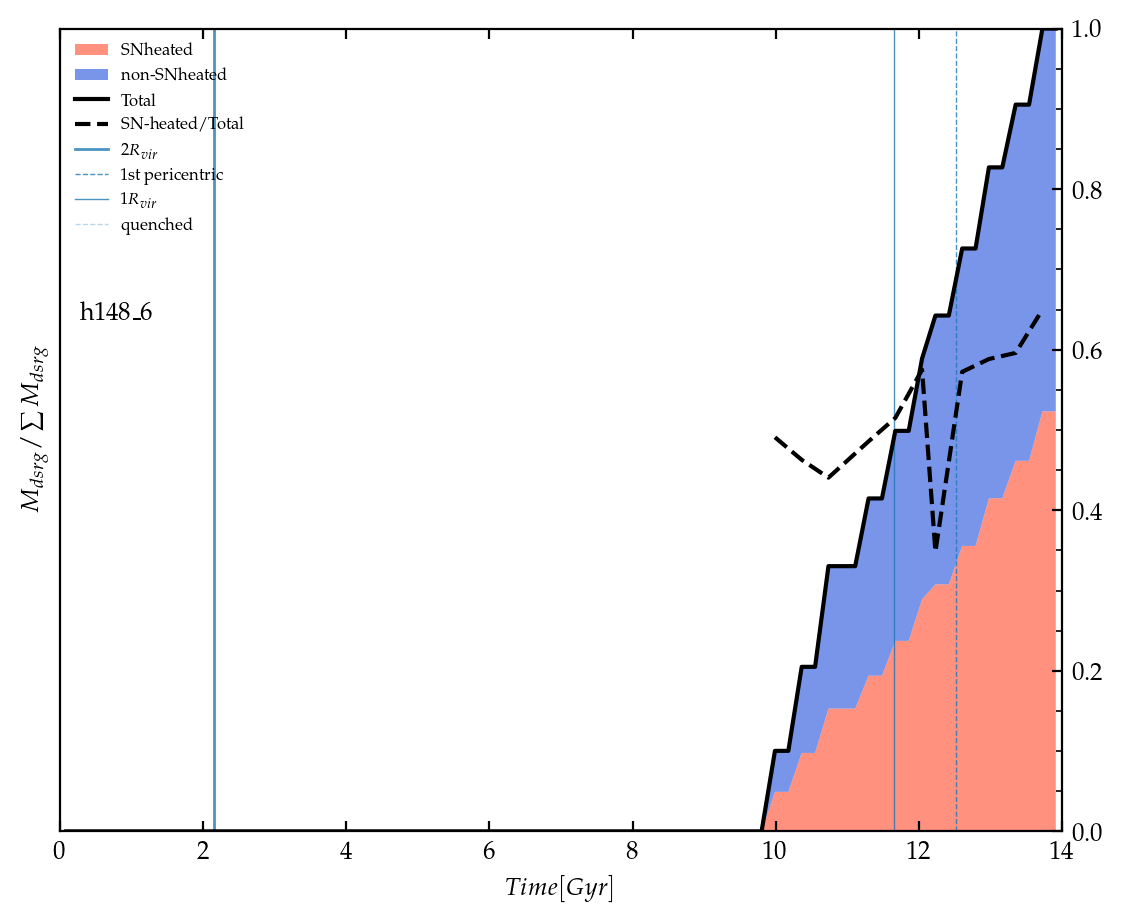

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_65 <
Loaded: h148_65


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


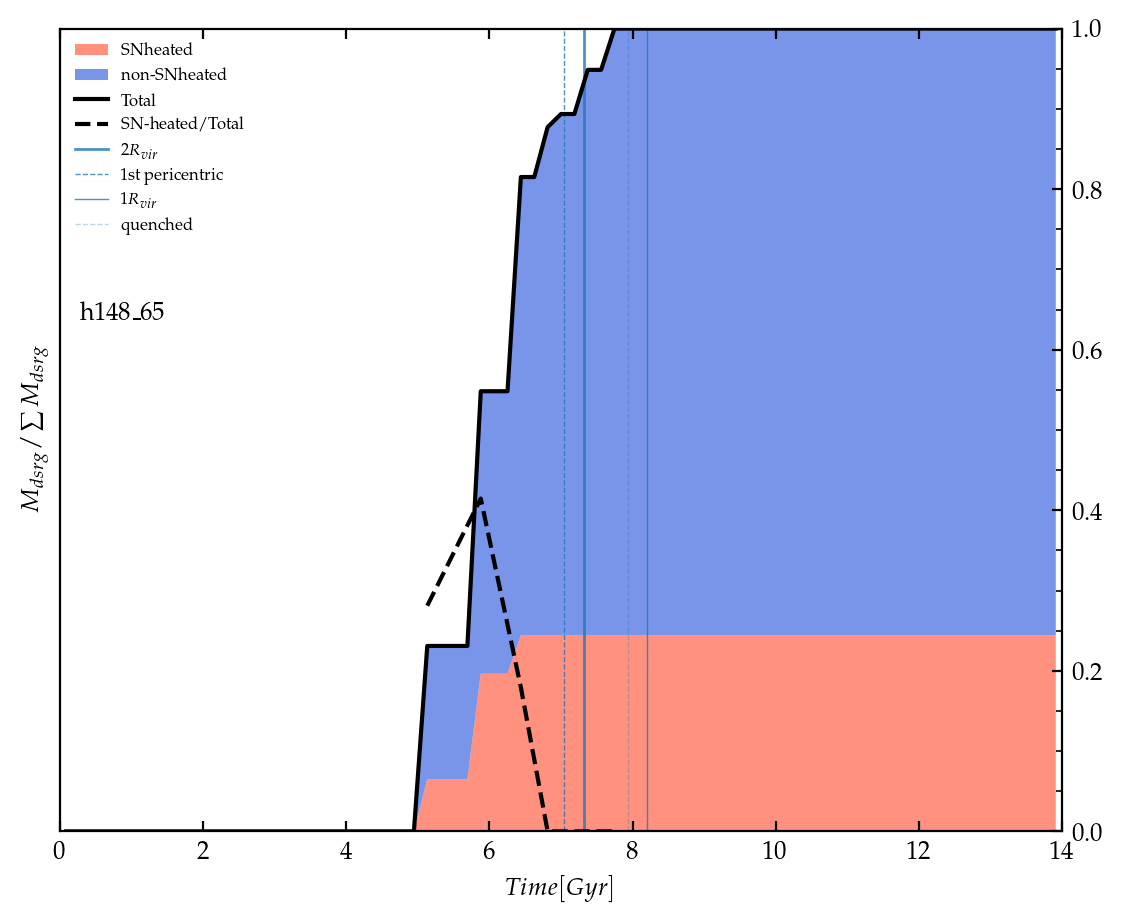

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_14 <
Loaded: h229_14


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


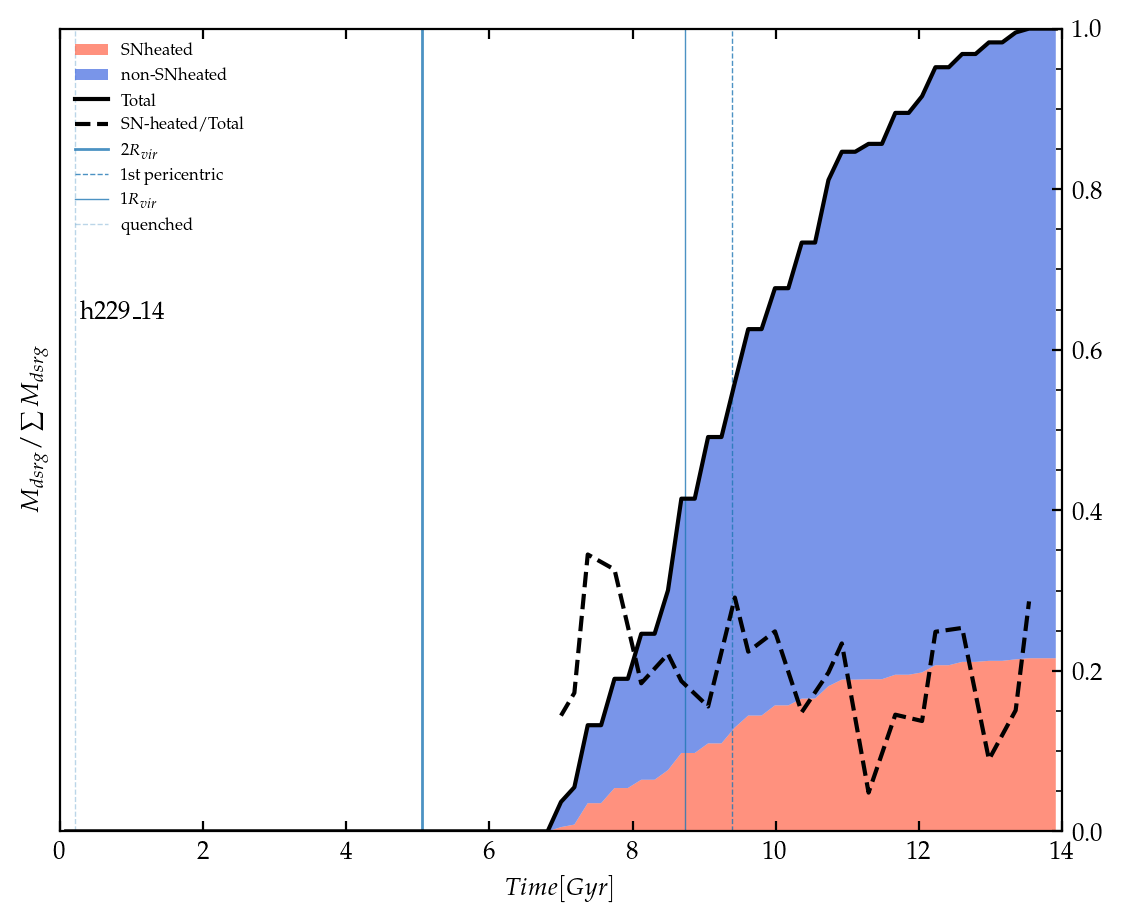

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_18 <
Loaded: h229_18


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


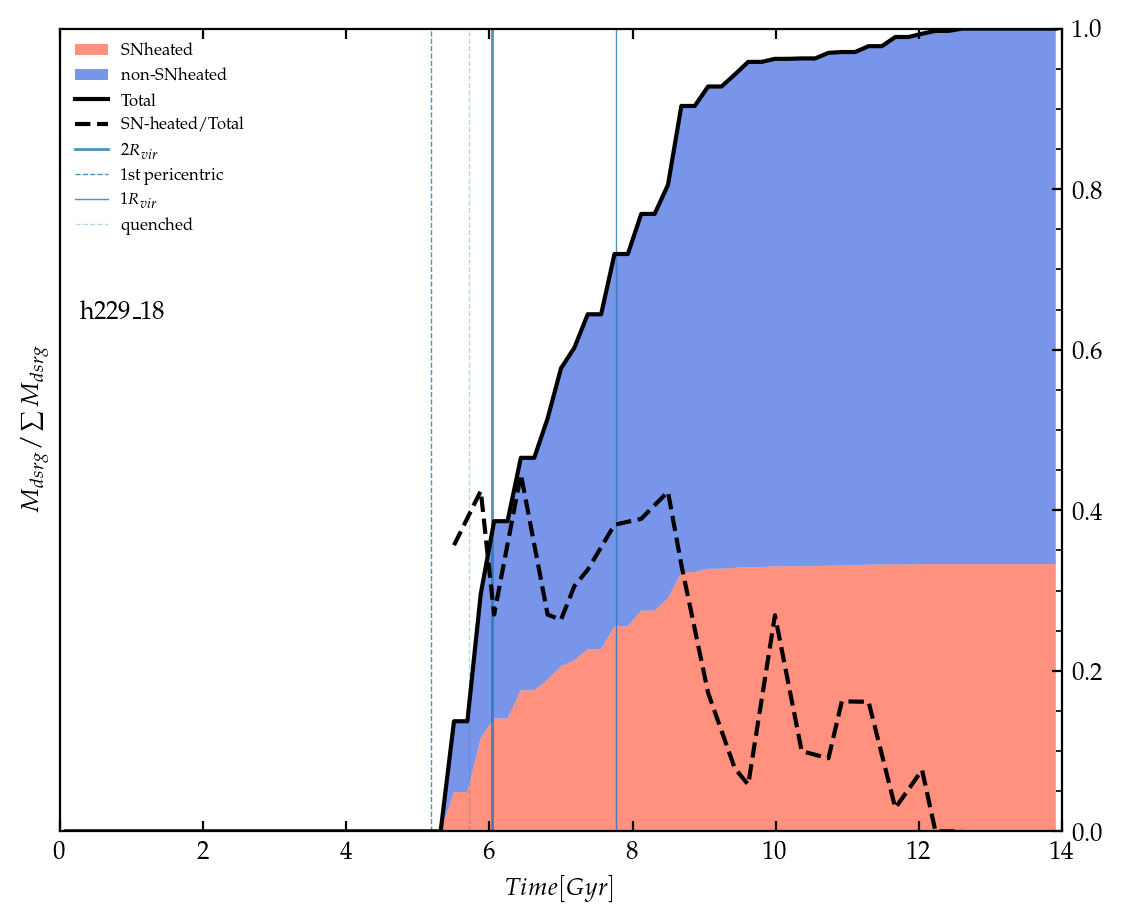

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_20 <
Loaded: h229_20


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


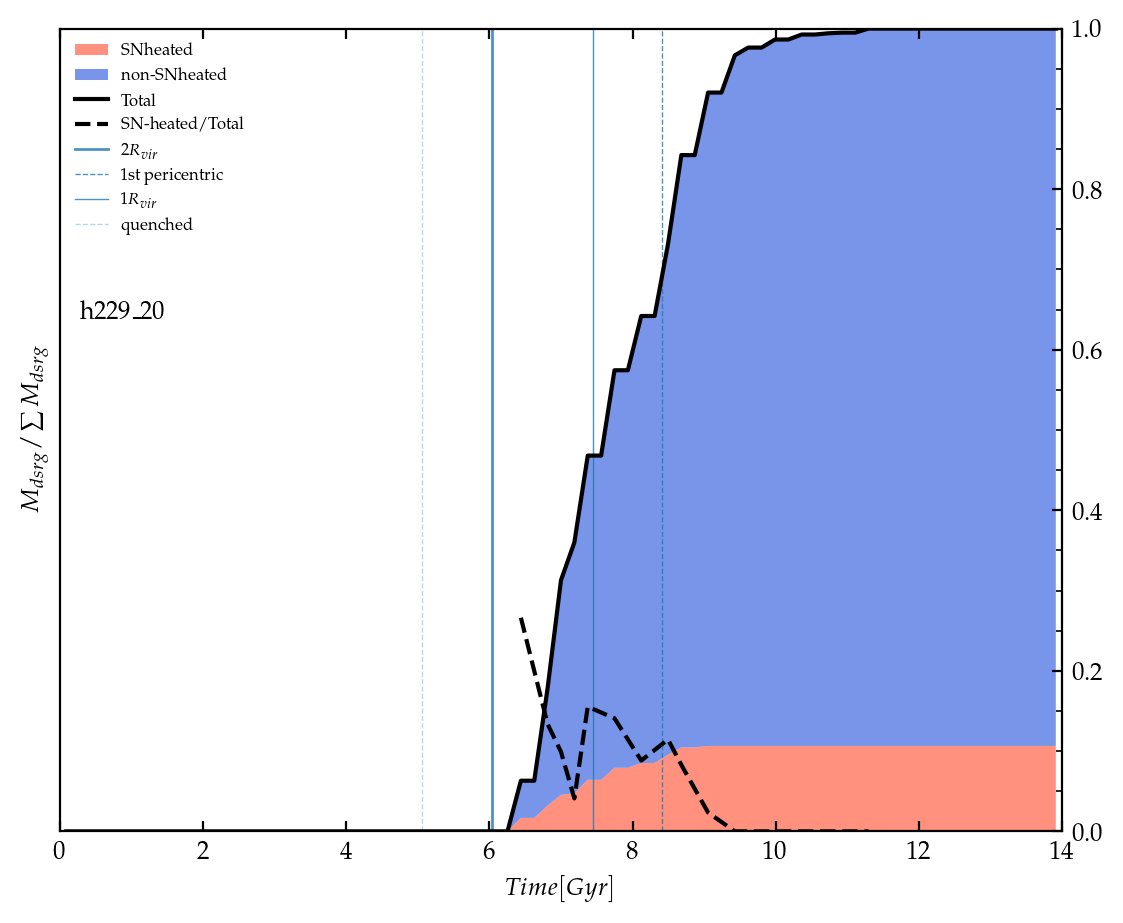

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_22 <
Loaded: h229_22


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


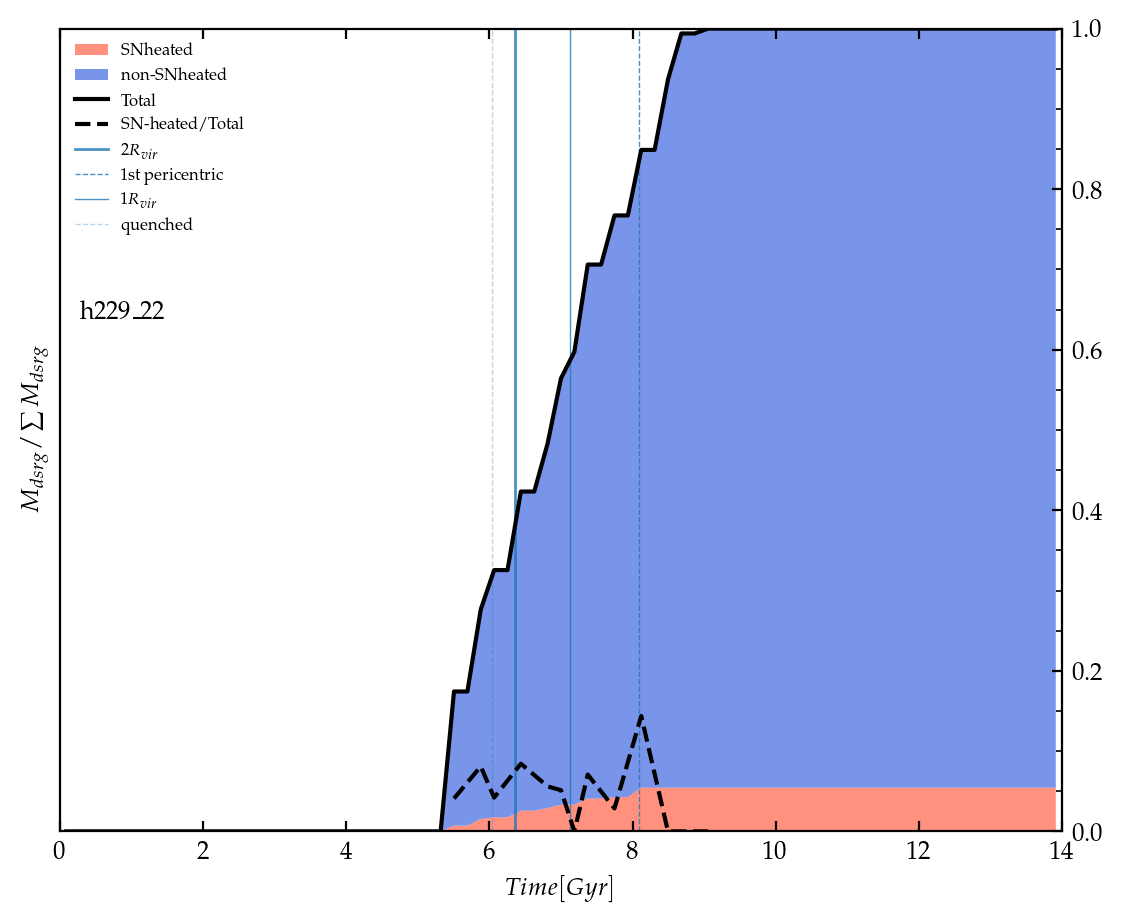

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_49 <
Loaded: h229_49


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


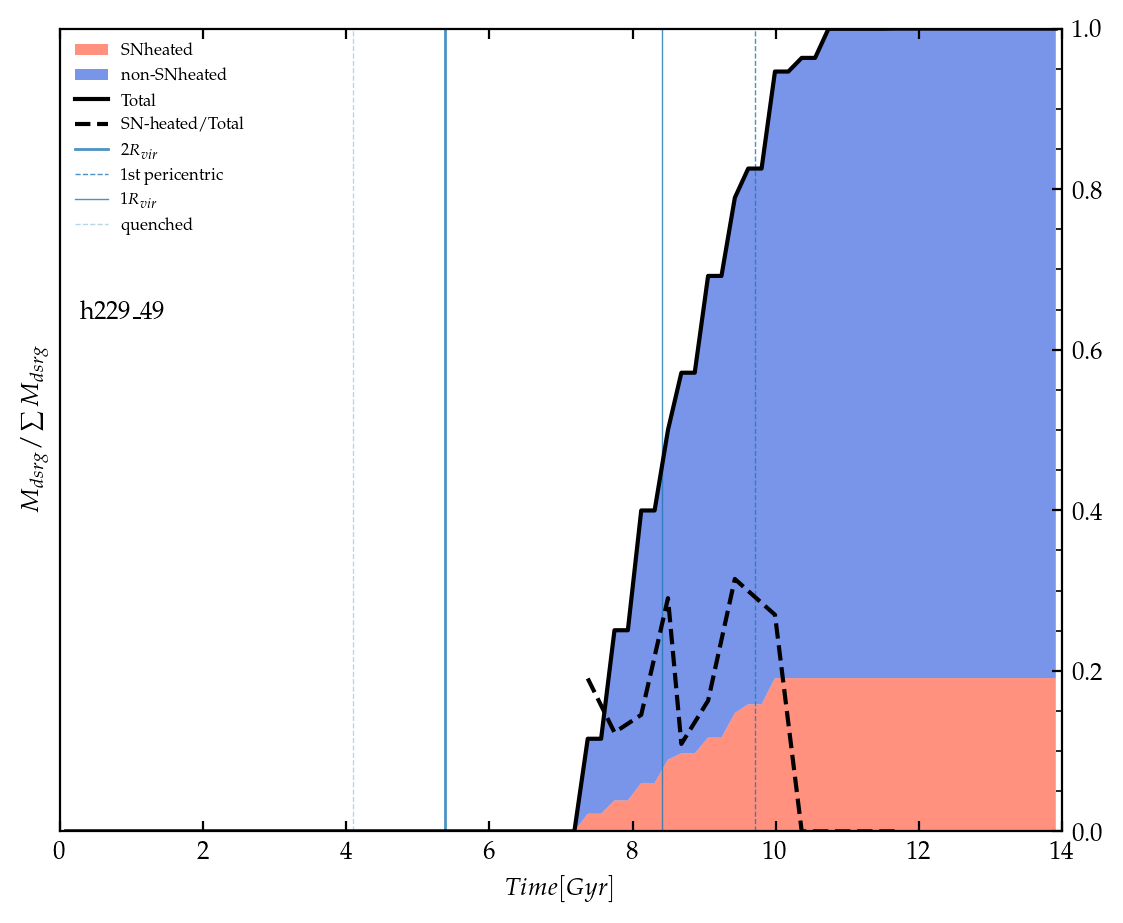

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_10 <
Loaded: h242_10


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


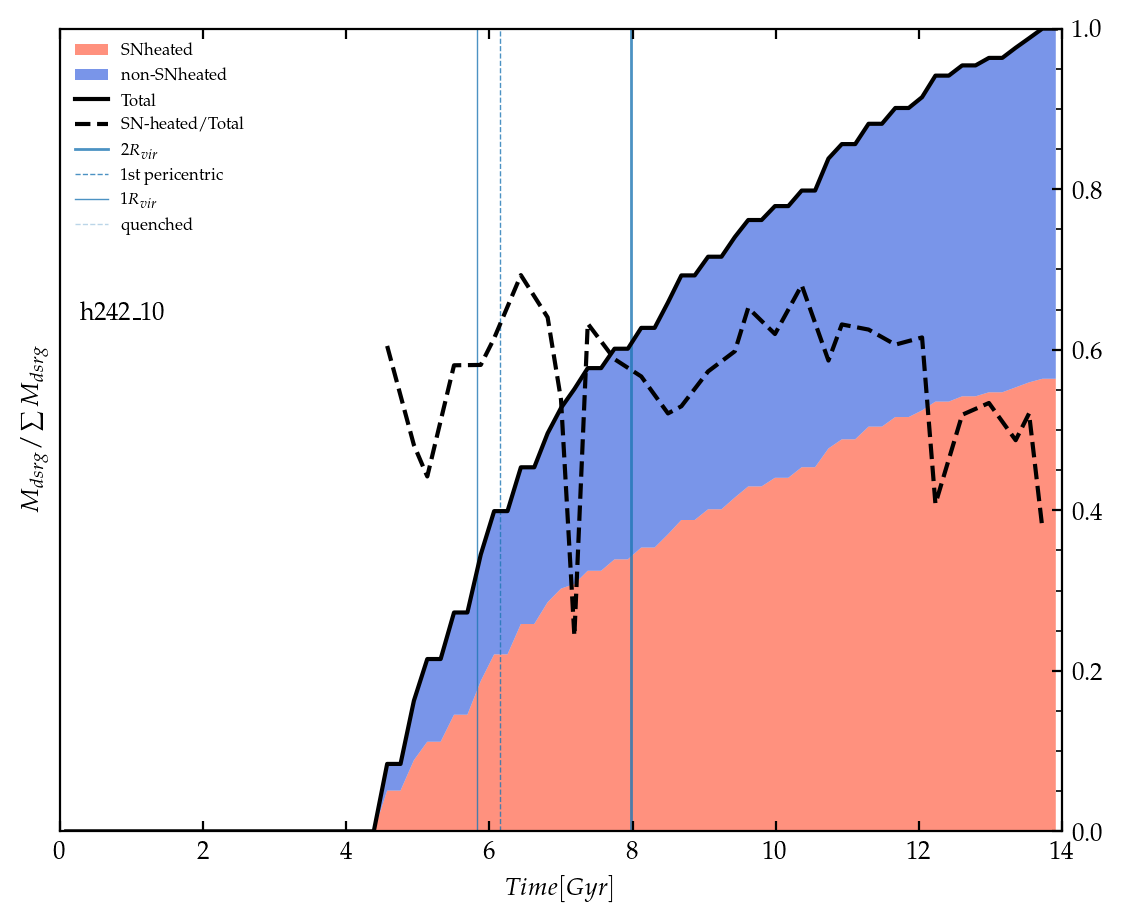

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_21 <
Loaded: h242_21


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


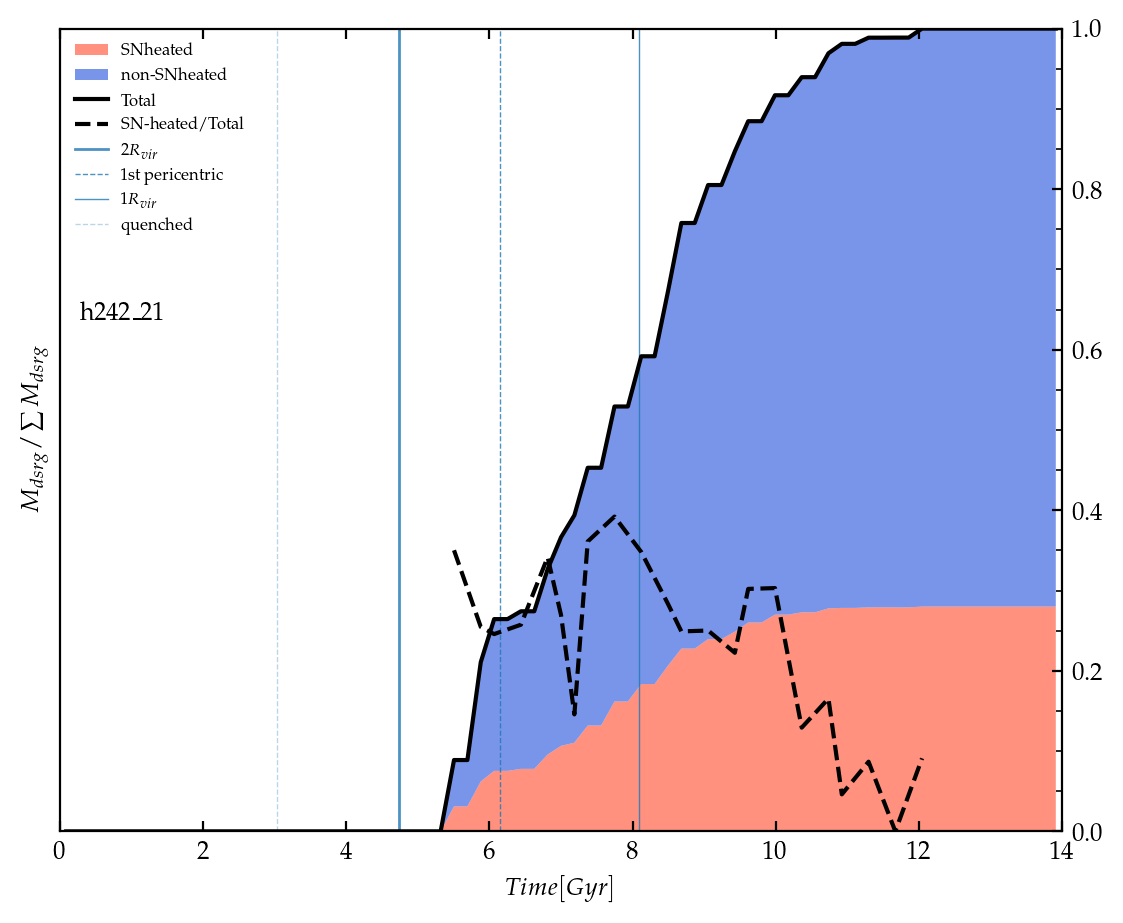

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_30 <
Loaded: h242_30


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


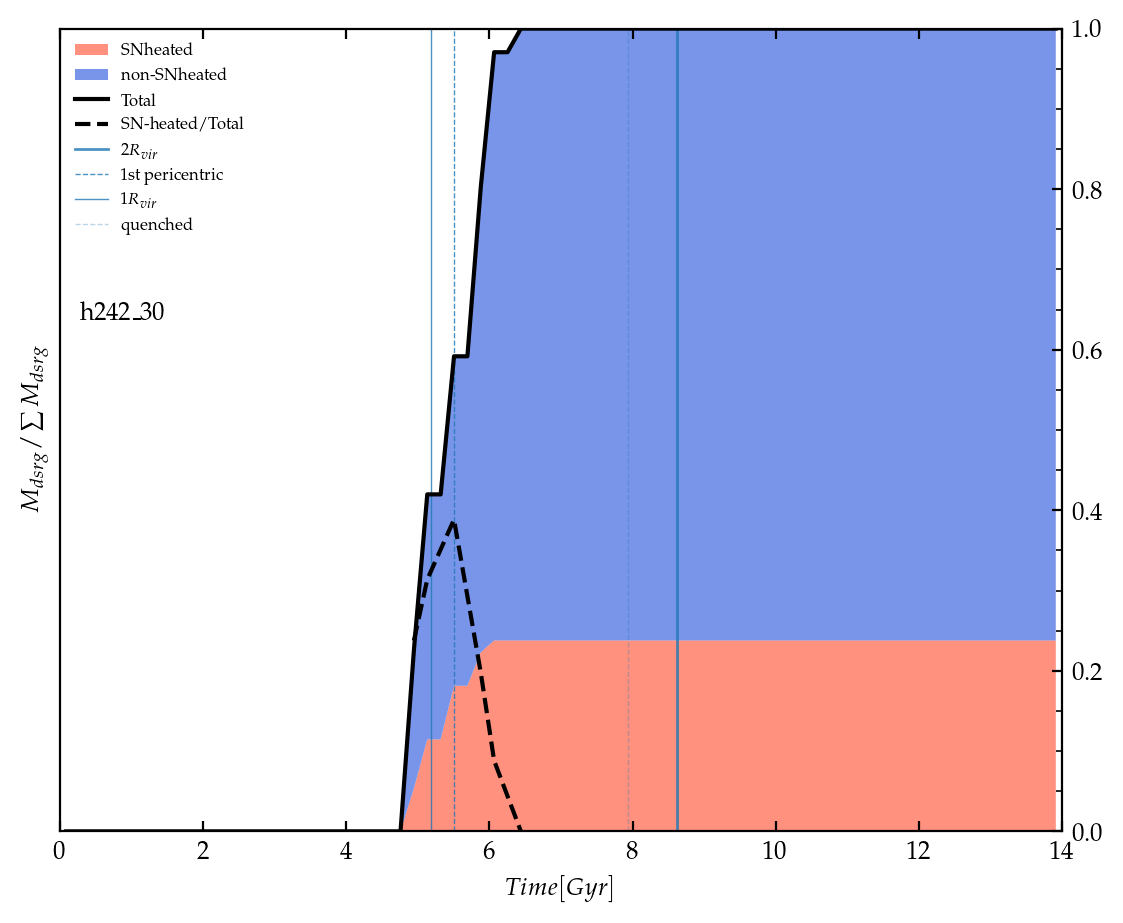

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_38 <
Loaded: h242_38


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


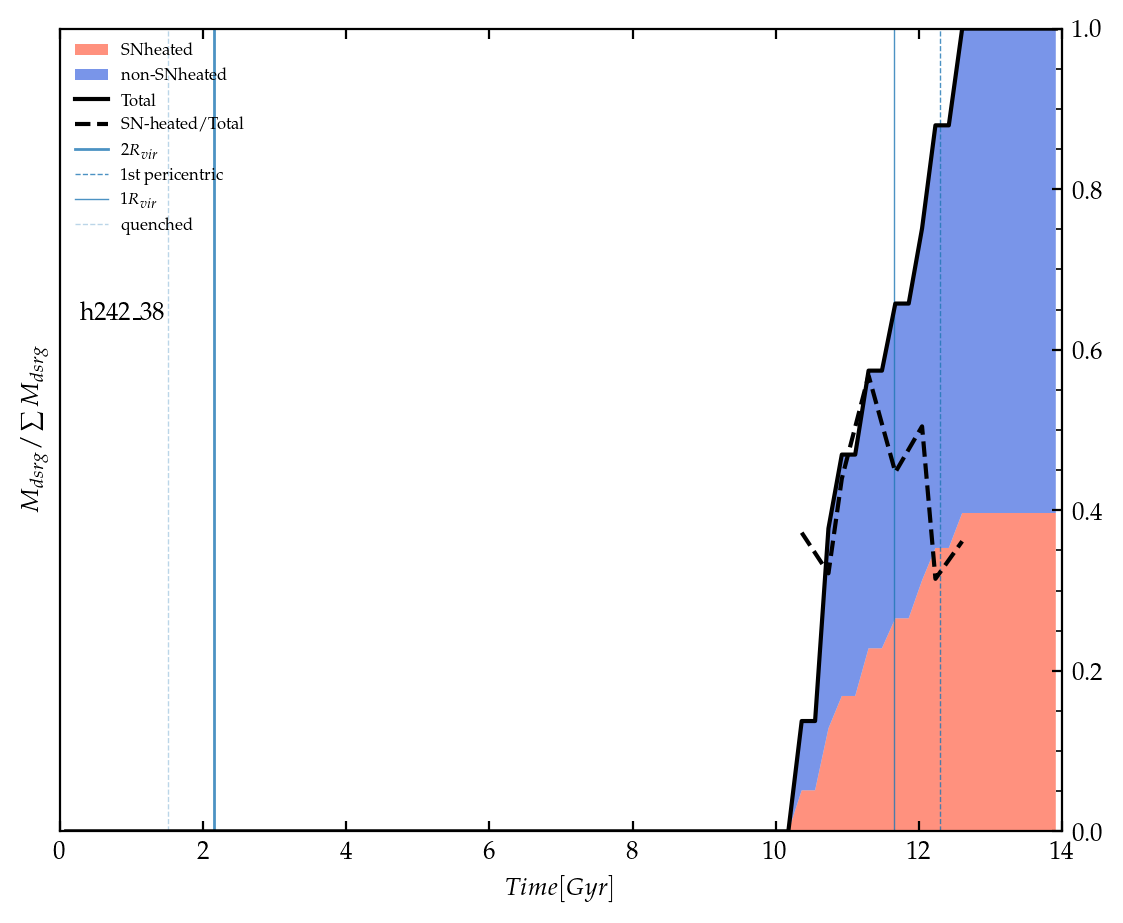

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_401 <
Loaded: h242_401


/tmp/ipykernel_52351/2996624413.py:55: RuntimeWarning: invalid value encountered in divide
  ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',


TypeError: cannot convert the series to <class 'float'>

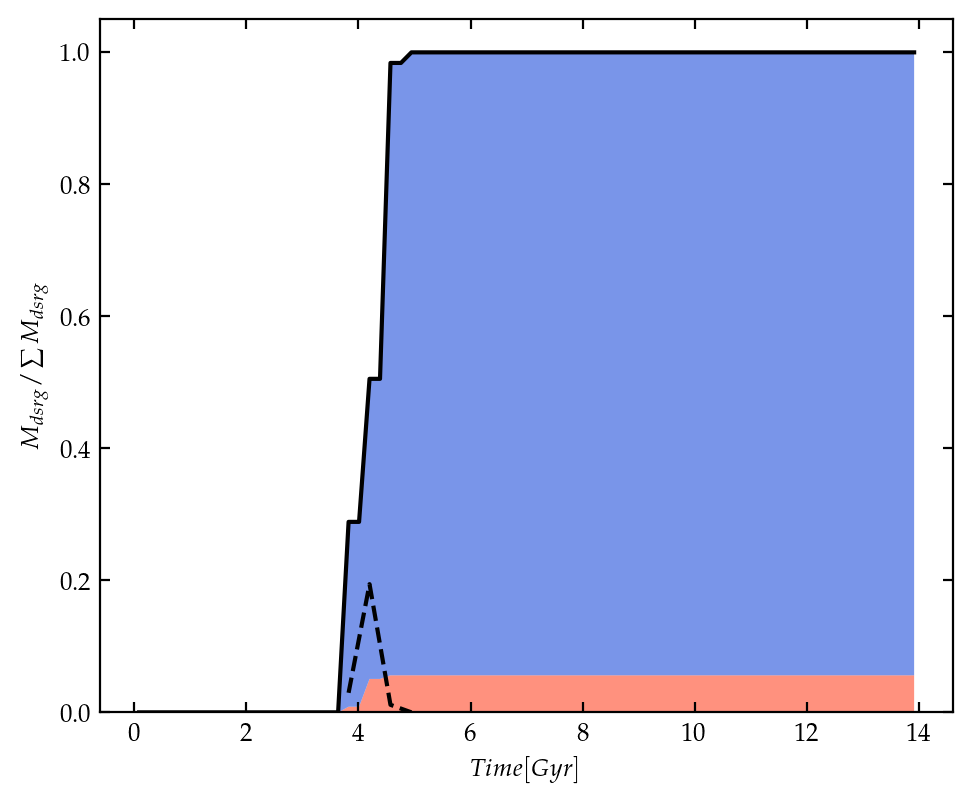

In [11]:
# The fraction of SN-driven discharged gas over all discharged gas vs time
### Plot for all satellites below ###
keys = get_keys()

# keys = ['h148_10', 'h148_12', 'h148_2', 'h148_249', 'h148_251', 'h148_27', 'h148_282', 'h148_3', 'h148_34',
#         'h148_38', 'h148_4', 'h148_55', 'h148_6', 'h148_65', 'h229_14', 'h229_18', 'h229_20', 'h229_22',
#         'h229_49', 'h242_10', 'h242_21', 'h242_30', 'h242_38', 'h242_401', 'h242_69', 'h242_8', 'h329_117',
#         'h329_29', 'h329_7']
# print(keys)

for key in keys:
    
    # Skip the ones I already have
    exclude = []
    
    if key in exclude:
        continue
    
    # defining discharged dataset if not introduced
    sim = str(key[:4])
    haloid = int(key[5:])
    predischarged, discharged = read_one_discharged(key)
    # gas SN-heated/unheated prior to discharge.
    hot = discharged[discharged['snHeated']==True]  # heated.
    cold = discharged[discharged['snHeated']==False]  # unheated.
    
    # read tinfall, tquench, etc. time from csv file
    data = pd.read_csv('SNeData/all-satellite-information-2.csv')
    r_data = data[(data.sim==sim)&(data.haloid==haloid)]
    print('Loaded:', key)
    
### Plot for all satellites above
    
    # identifying where discharged gas is removed to as a function of time.
    bins = 75
    fig, ax = plt.subplots(1,1, dpi=200, figsize=(5.5,4.5), sharex=True,
                           constrained_layout=False)

    y1, x = np.histogram(hot.time, bins=bins, weights=wt(hot,discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum1 = np.cumsum(y1)
    y2, x = np.histogram(cold.time, bins=bins, weights=wt(cold,discharged),
                         range=(0, 14))
    sum2 = np.cumsum(y2)
    ax.stackplot(bincenters, sum1, sum2, alpha=0.7,
                 colors=['tomato', 'royalblue'], labels=['SNheated', 'non-SNheated'])         

    y3, x = np.histogram(discharged.time, bins=bins, weights=wt(discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum3 = np.cumsum(y3)
    ax.plot(bincenters, sum3, alpha=1.0, c='black', label='Total')

    ax.plot(bincenters[y3>0], (y1/y3)[y3>0], linestyle='--', c='black',
            label='SN-heated/Total')
    
    ax.set_xlabel(r'$Time [Gyr]$')
    ax.set_ylabel('$M_{dsrg} / \sum M_{dsrg}$')
    
    #show where it infalls, quenches if any, where at 1 Rvir, and where at the 1st pericentric
    f_time = float(r_data['tinfall'])
    p_time = float(r_data['1st p_time'])
    vir_time = float(r_data['t_1Rvir_from_Host'])
    q_time = float(r_data['tquench'])
    
    #make a vertical line indicating those instances
    ax.axvline(x=f_time, linestyle='solid', label='$2 R_{vir}$', 
                 alpha = 0.8, linewidth = 1, zorder = 1)
    ax.axvline(x=p_time, linestyle='dashed', label='1st pericentric', 
                 alpha = 0.8, linewidth = 0.5, zorder = 1)
    ax.axvline(x=vir_time, linestyle='solid', label='$1 R_{vir}$', 
                 alpha = 0.8, linewidth = 0.5, zorder = 1)
    if not q_time == np.nan: #it's quenched
        ax.axvline(x=q_time, linestyle='dashed', label='quenched', 
                     alpha = 0.3, linewidth = 0.5, zorder = 1)

    ax.set_xlim(0, 14)
    ax.set_ylim(0, 1.0)
    ax.tick_params(direction='in', which='both', top=True, right=True)
    ax.yaxis.tick_right()
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

    ax.legend(frameon=False, loc='upper left', fontsize=6)
    ax.annotate(key, (0.02, 0.66), xycoords='axes fraction', va='top', zorder=1000)
    plt.savefig(f'plots/F23_FracSNdsrg_{key}.pdf')
    plt.show()

## Analysis of SN-driven gas loss over time
It seems that the fraction of SN-driven gas loss is relatively constant over time. However, each unique satellite, with different galaxy stellar mass and different infall time, shows different trend in varying its fraction over time. Here, we analyze the fraction at 1Gyr before infall, at 1st pericentric passage, and after 1Rvir for all the satellites. Hopefully we can see positive relationship b/w fraction and stellar mass, and also some variability in different times.

In [5]:
data = pd.read_csv('SNeData/all-satellite-information-2.csv')
data = data[['sim', 'haloid', 'quenched', 'tquench', 'tinfall', '1st p_time', 't_1Rvir_from_Host']]
data

,sim,haloid,quenched,tquench,tinfall,1st p_time,t_1Rvir_from_Host
0,h148,10,False,NaN,5.602745,9.060013,7.767072
1,h148,12,True,4.740687,5.602745,8.608831,9.490994
2,h148,2,False,NaN,0.861961,13.800797,12.507856
3,h148,249,True,3.878726,5.602745,9.490994,8.198053
4,h148,251,True,6.464608,6.895686,7.336092,6.905111
5,h148,27,True,1.649749,7.326666,7.039793,6.474131
6,h148,282,True,10.067335,9.481568,4.750210,5.181190
7,h148,3,False,NaN,3.878823,10.352954,9.490994
8,h148,34,True,0.430883,4.740784,9.921974,9.060013
9,h148,38,True,4.309706,6.033725,8.198053,7.336092


found the keys, starting with:  h148_10
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <
Loaded: h148_10
h148_10 9.060013312533592 0.5919770919122043
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_12 <
Loaded: h148_12
h148_12 8.608830726788982 0.6529904628620379


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_2 <
Loaded: h148_2


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: Runtime

h148_2 13.800797497085432 nan
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_249 <
Loaded: h148_249
h148_249 9.490993692946342 0.10003909565005058
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_251 <
Loaded: h148_251
h148_251 7.336091790882829 0.3046737927368095
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_27 <
Loaded: h148_27
h148_27 7.039792779348961 0.4597227387979948
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_282 <
Loaded: h148_282
h148_282 4.750209508400876 0.294185638369389


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_3 <
Loaded: h148_3


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime


h148_3 10.35295445377185 0.6919812233967958
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_34 <
Loaded: h148_34
h148_34 9.921974073359095 0.33371356914480915
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_38 <
Loaded: h148_38


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime


h148_38 8.198052551708967 0.3863503104164769
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_4 <
Loaded: h148_4
h148_4 12.93883673625992 0.6360020086325473
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_55 <
Loaded: h148_55
h148_55 9.060013312533592 0.268992676644701


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_6 <
Loaded: h148_6
h148_6 12.507856355847158 0.5724041356786901
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_65 <
Loaded: h148_65
h148_65 7.039792779348961 0.0


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: Runtime

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_14 <
Loaded: h229_14
h229_14 9.383248597782789 0.291284588816023
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_18 <
Loaded: h229_18
h229_18 5.181189888758382 0.35643416572286446


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: Runtime

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_20 <
Loaded: h229_20
h229_20 8.413542741855249 0.1144873929985788
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_22 <
Loaded: h229_22
h229_22 8.0903074565453 0.14370354070499583
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_49 <
Loaded: h229_49


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime


h229_49 9.706483883092371 0.2698182946235082
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_10 <
Loaded: h242_10
h242_10 6.150895744842153 0.6928948791249788


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1, dpi=200, figsize=(5.5,4.5), sharex=True,
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = 

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_21 <
Loaded: h242_21
h242_21 6.150895744842153 0.25738993806448185
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_30 <
Loaded: h242_30
h242_30 5.504425174222988 0.38841685731526643
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_38 <
Loaded: h242_38


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime


h242_38 12.292366165723918 0.3613456985783957
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_69 <
Loaded: h242_69
h242_69 9.70648388324738 0.25295385351962113
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_8 <
Loaded: h242_8


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_23903/1890180721.py:45: Runtime

h242_8 6.150895744842153 0.553403155227315
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_117 <
Loaded: h329_117
h329_117 4.975800801418971 0.0
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_29 <
Loaded: h329_29
h329_29 9.060013312693757 0.0
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_7 <
Loaded: h329_7
h329_7 13.800797497330509 nan


/tmp/ipykernel_23903/1890180721.py:45: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/1890180721.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime


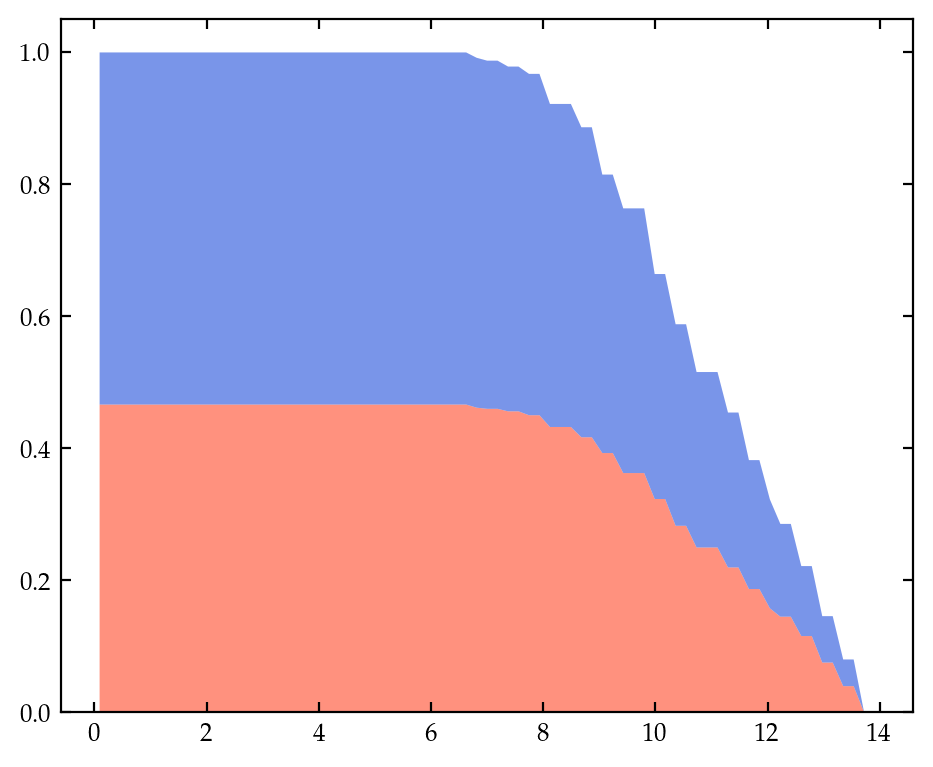

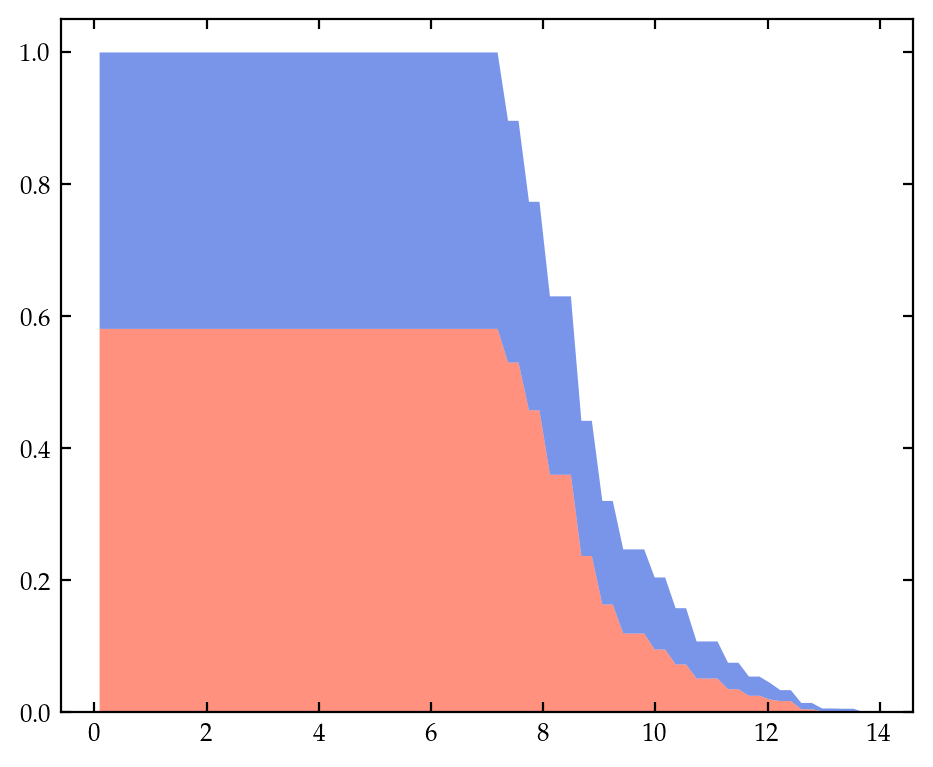

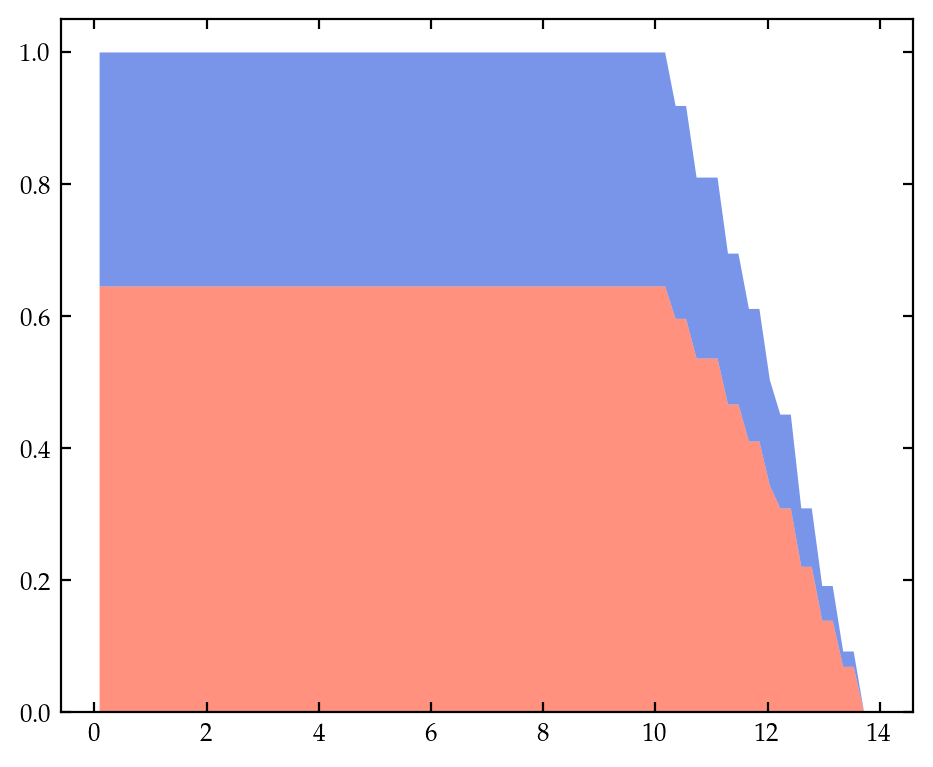

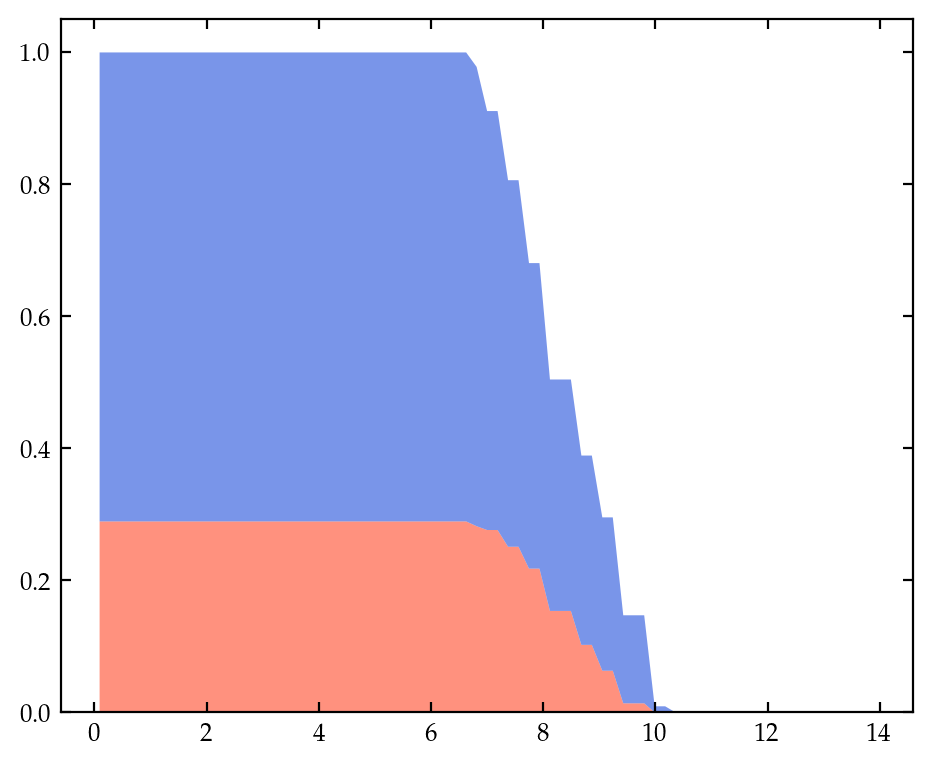

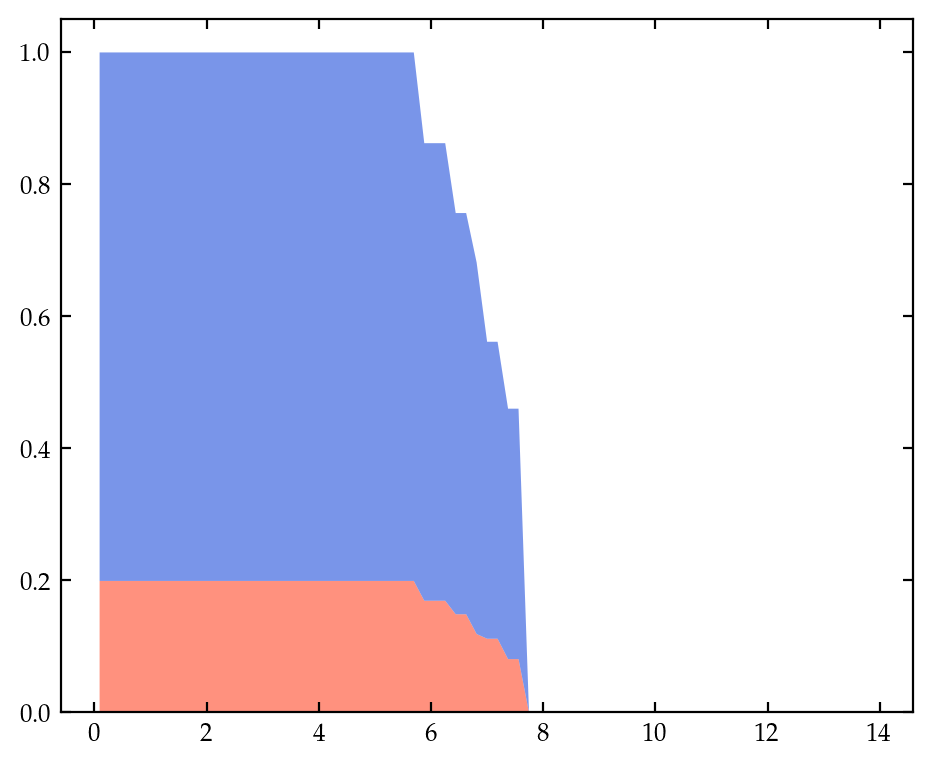

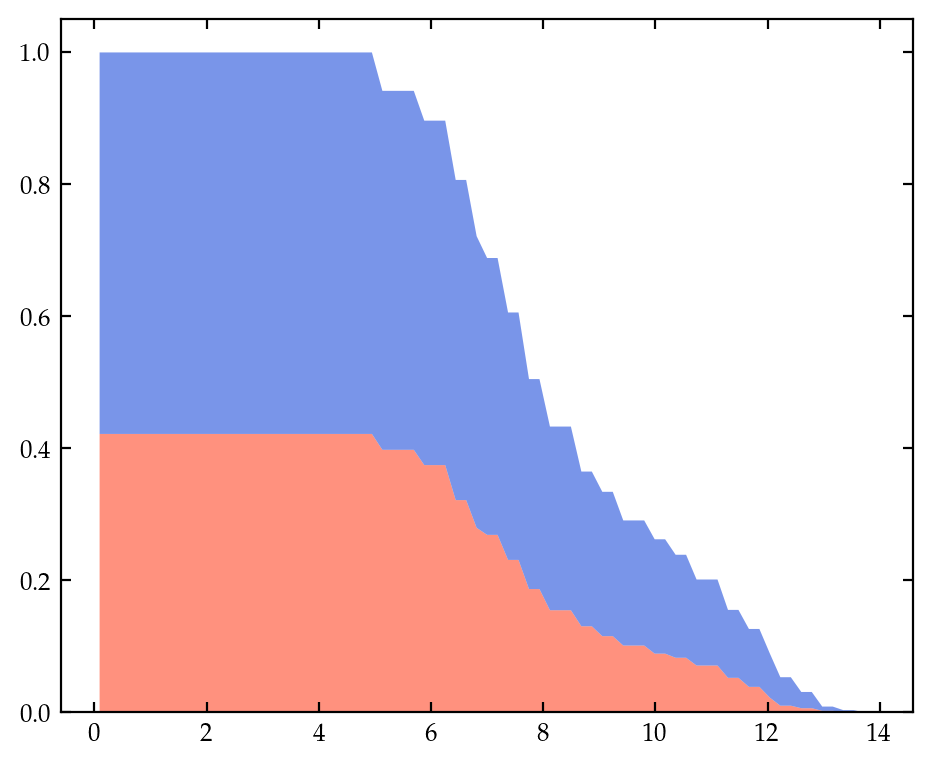

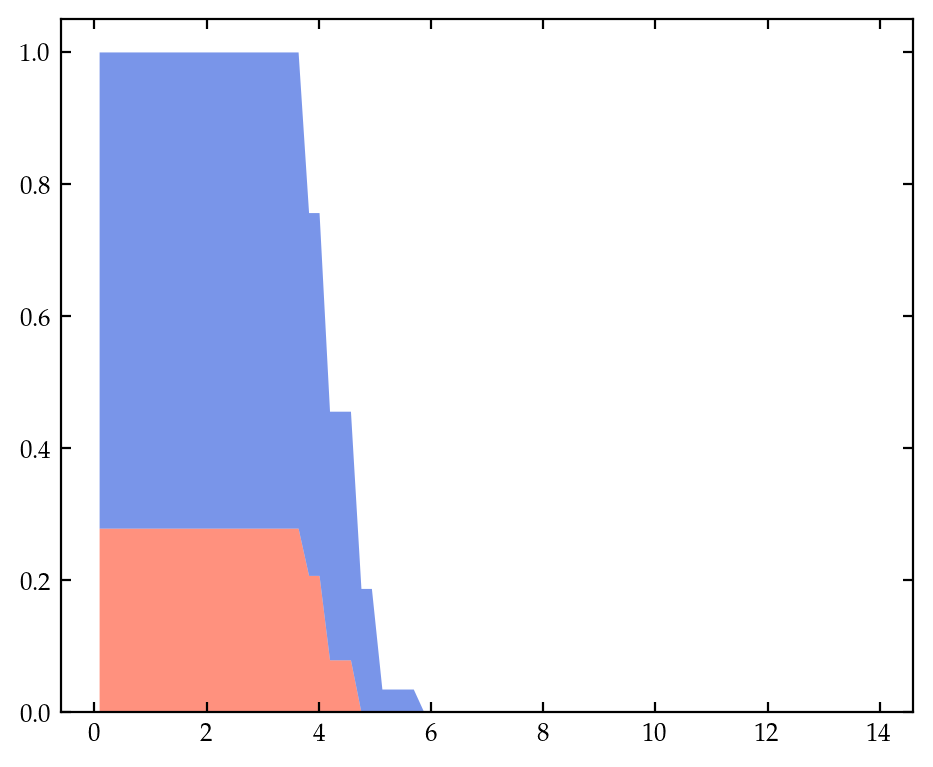

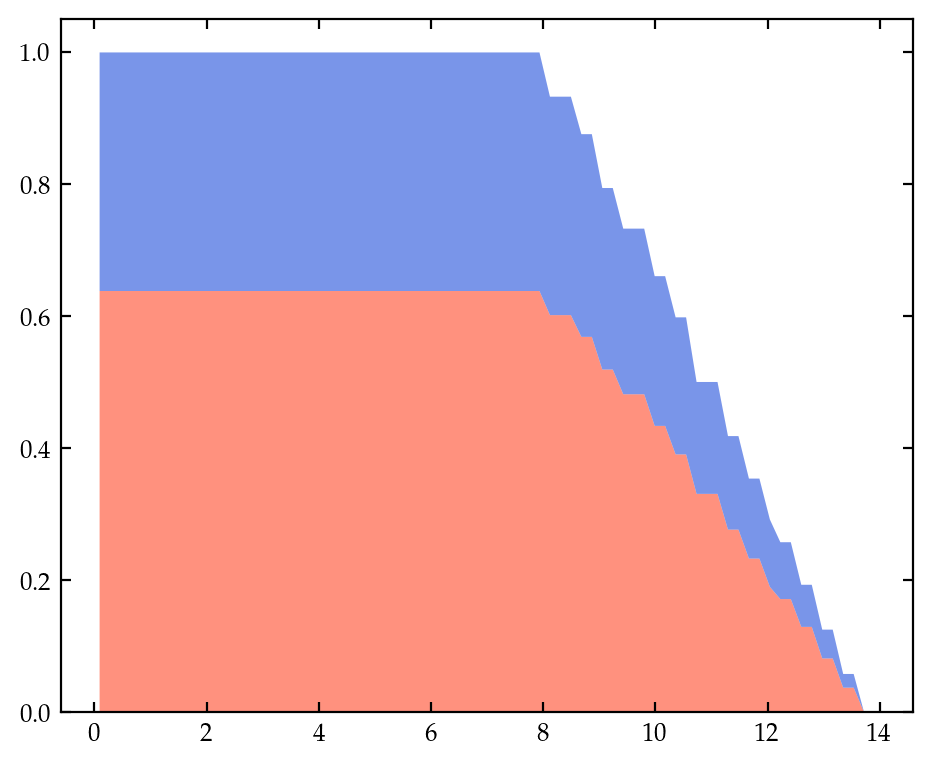

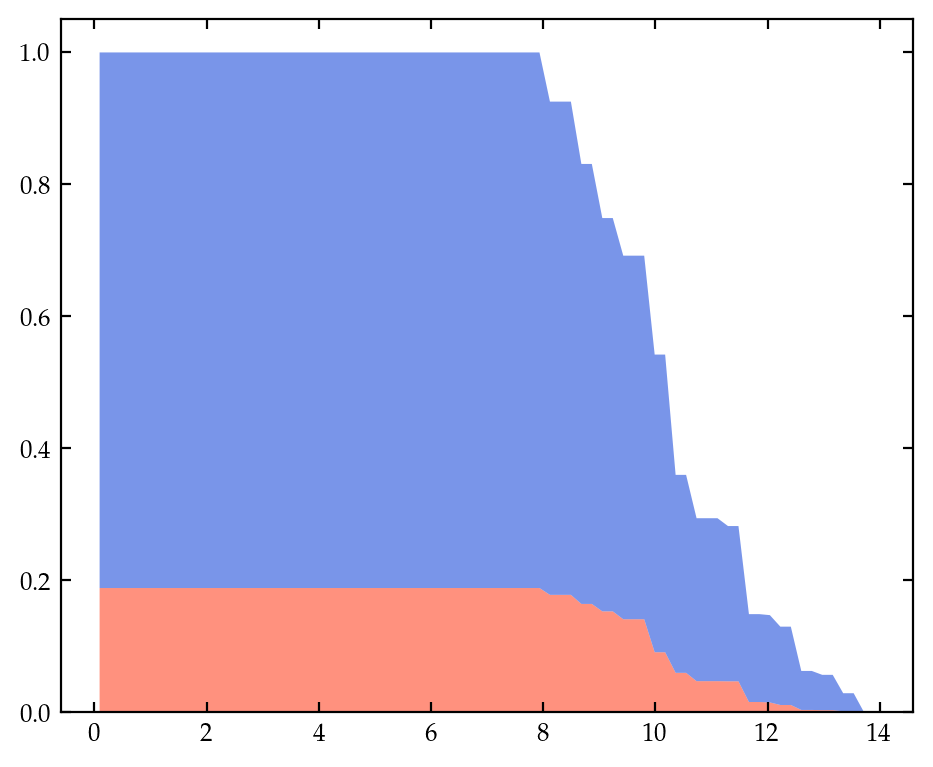

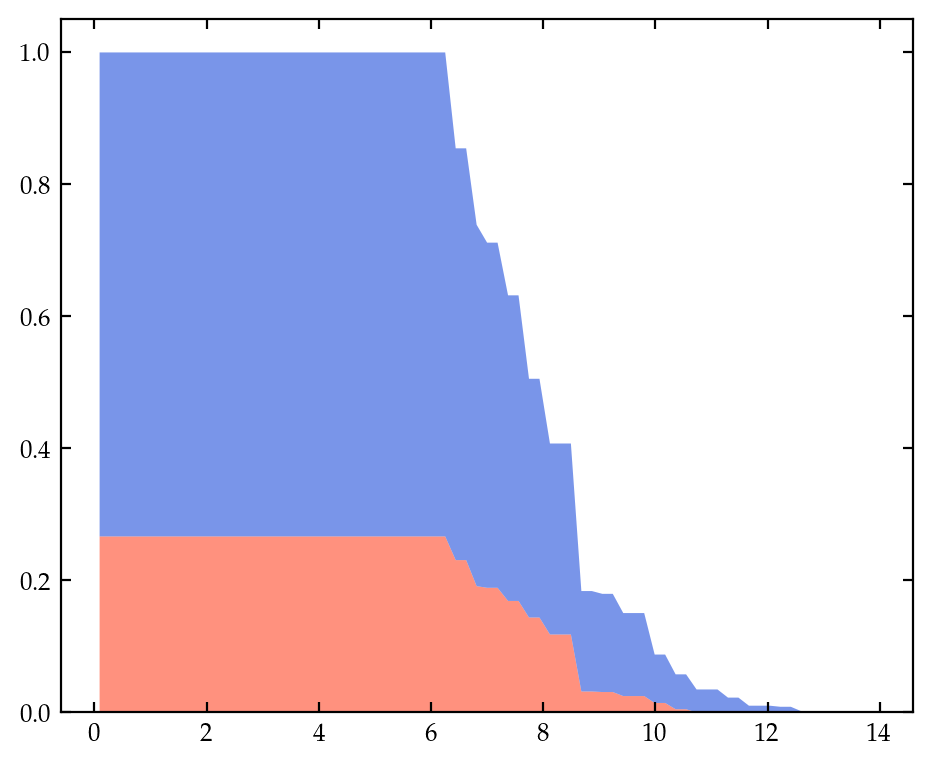

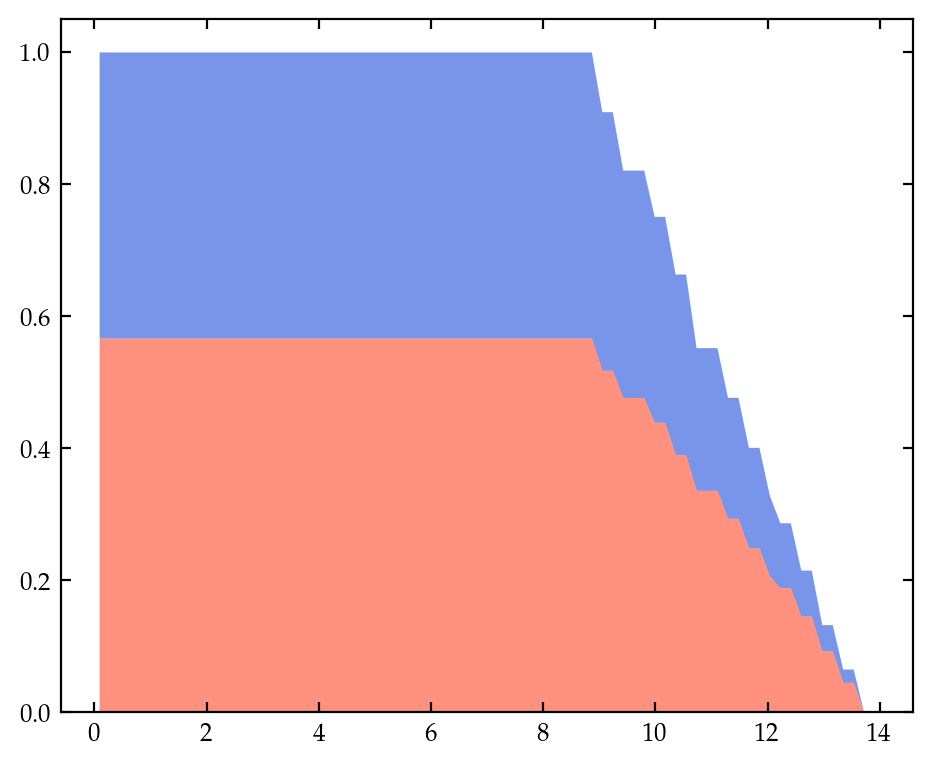

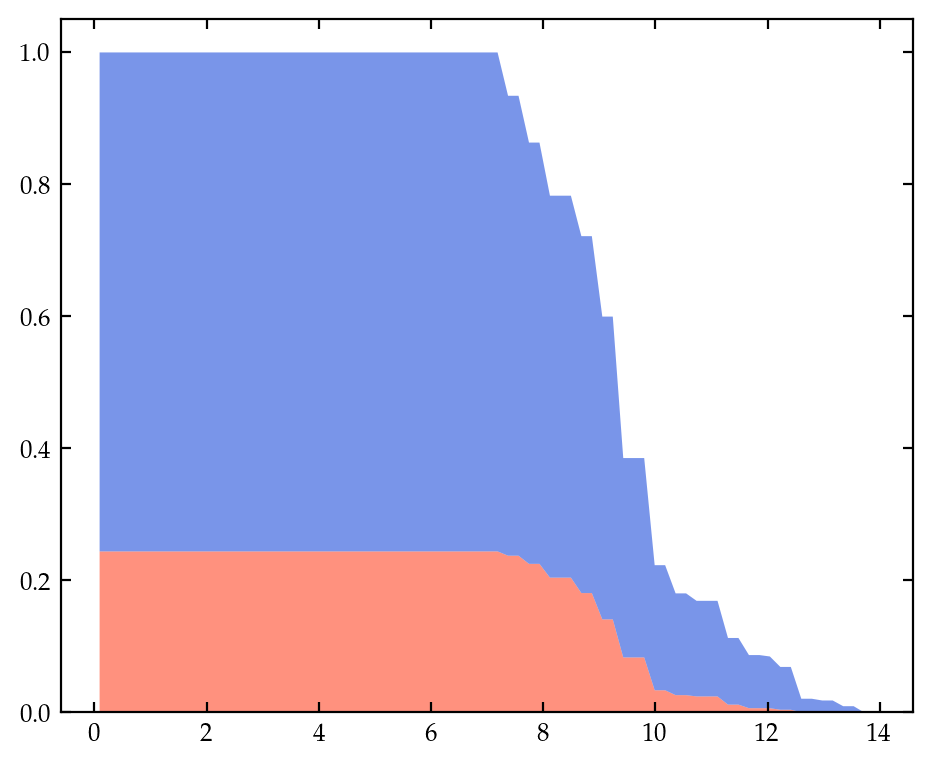

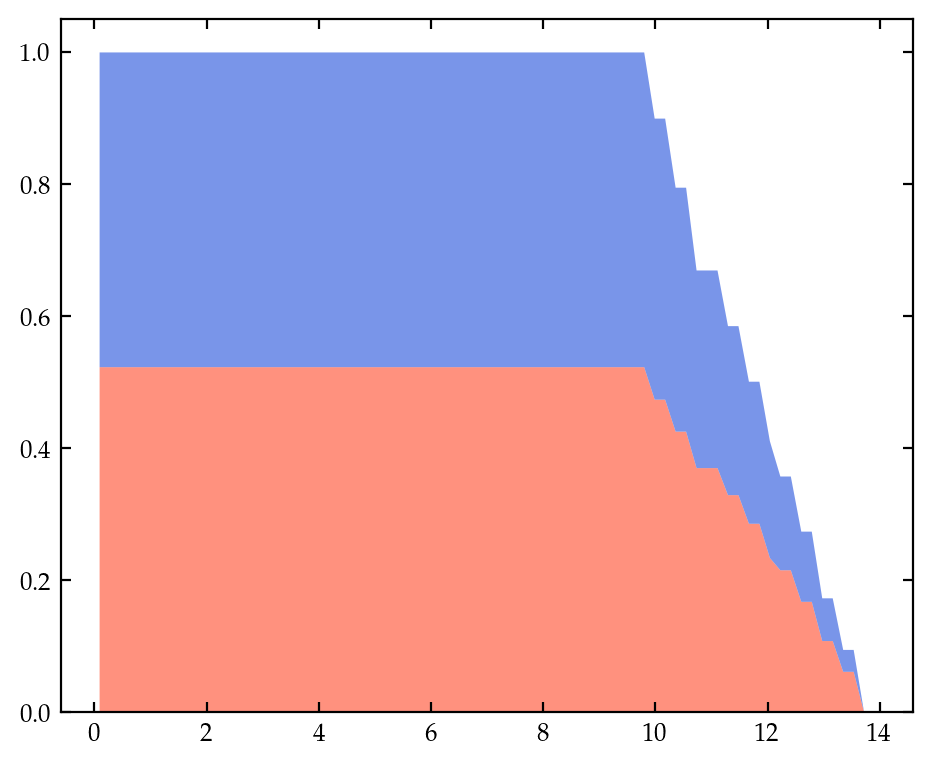

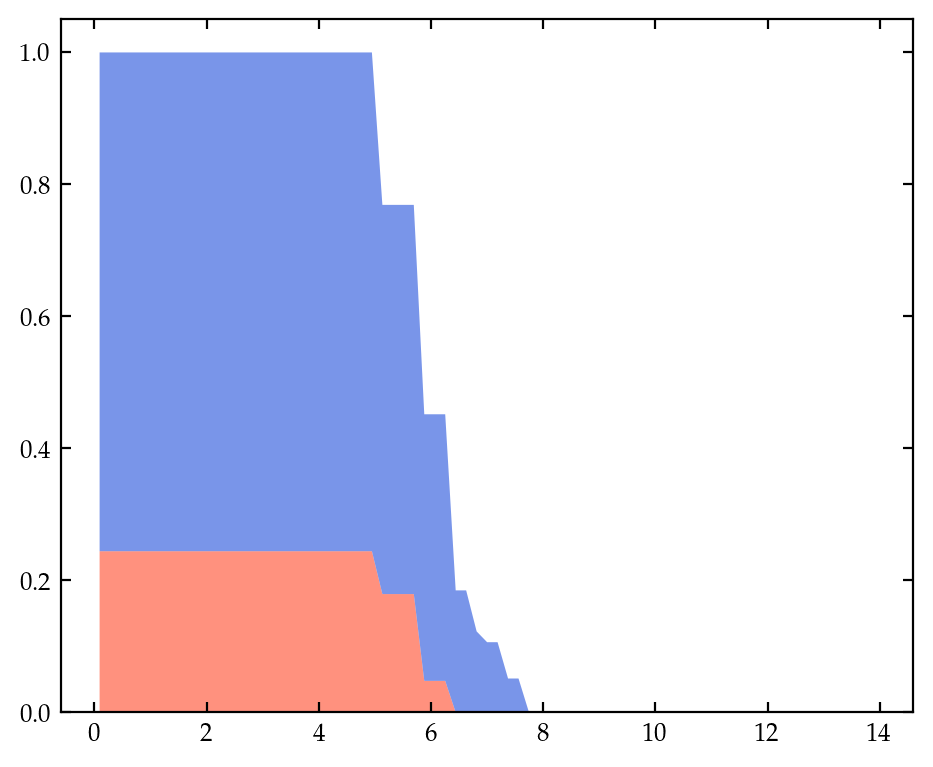

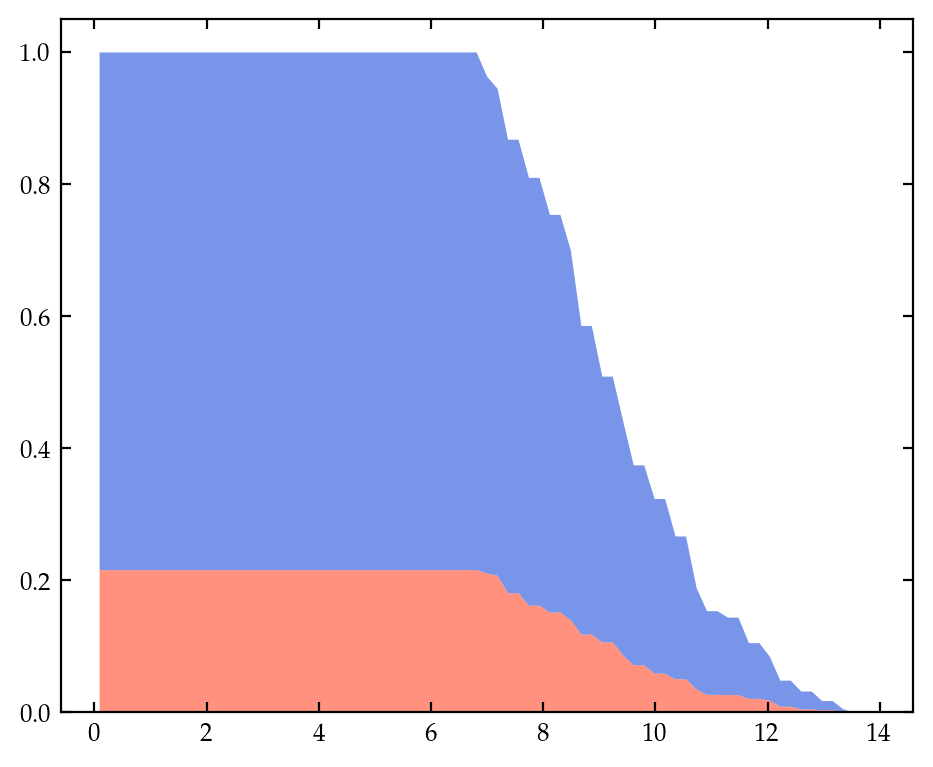

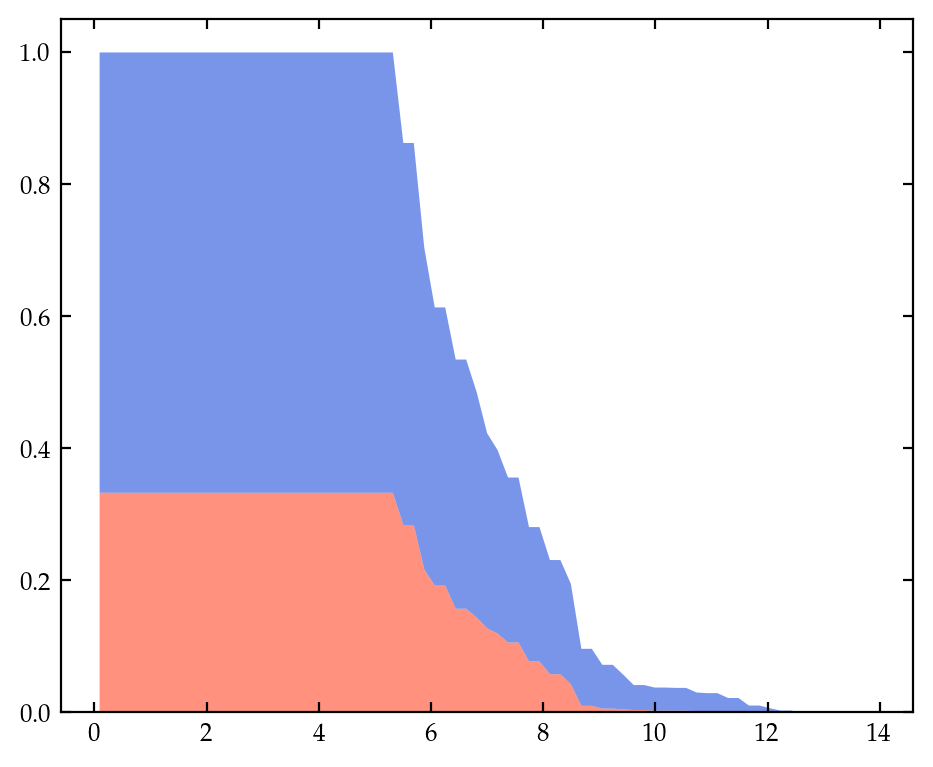

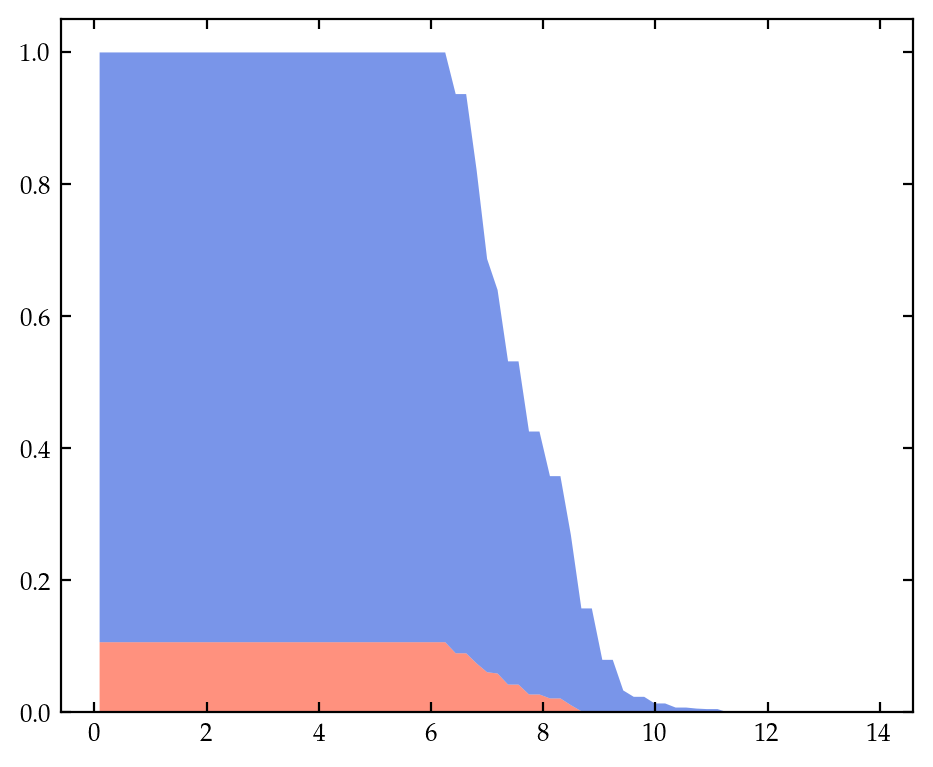

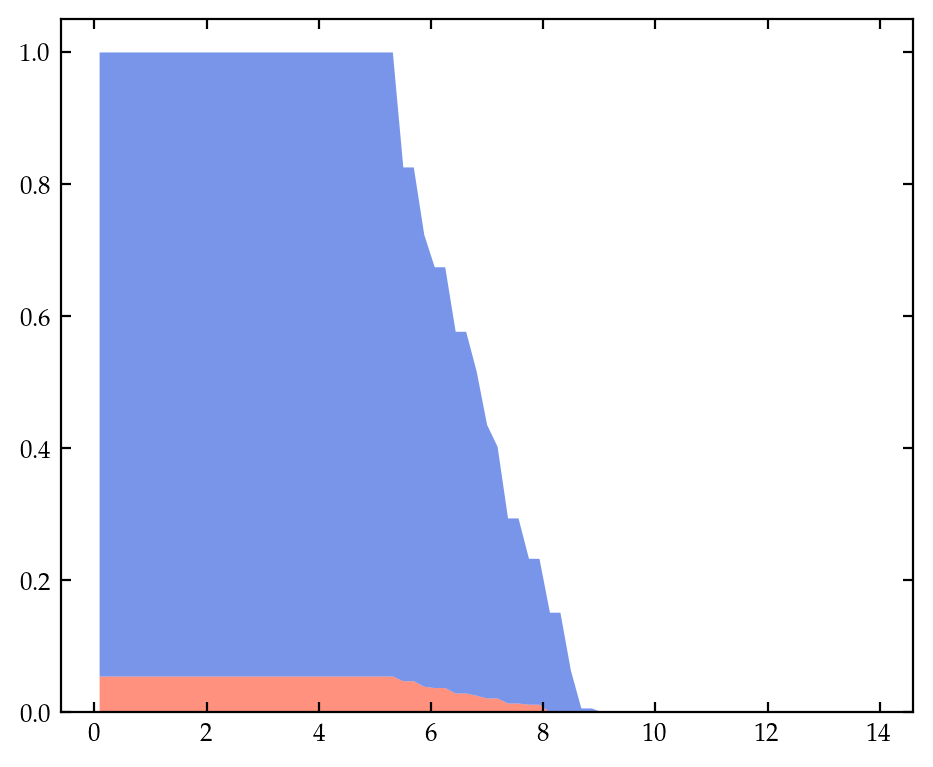

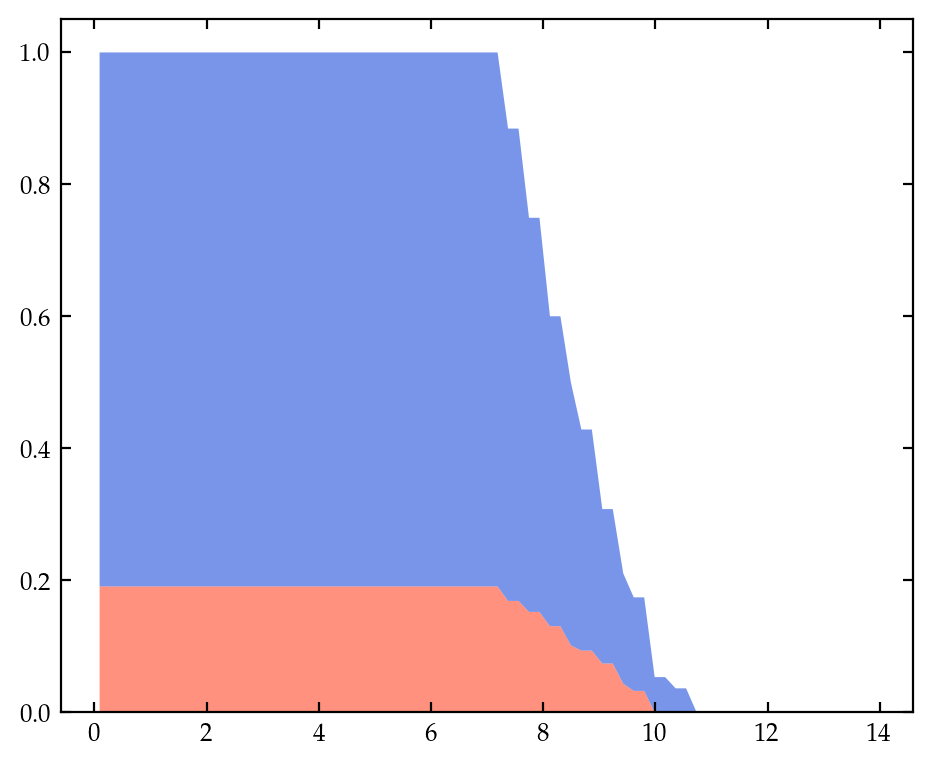

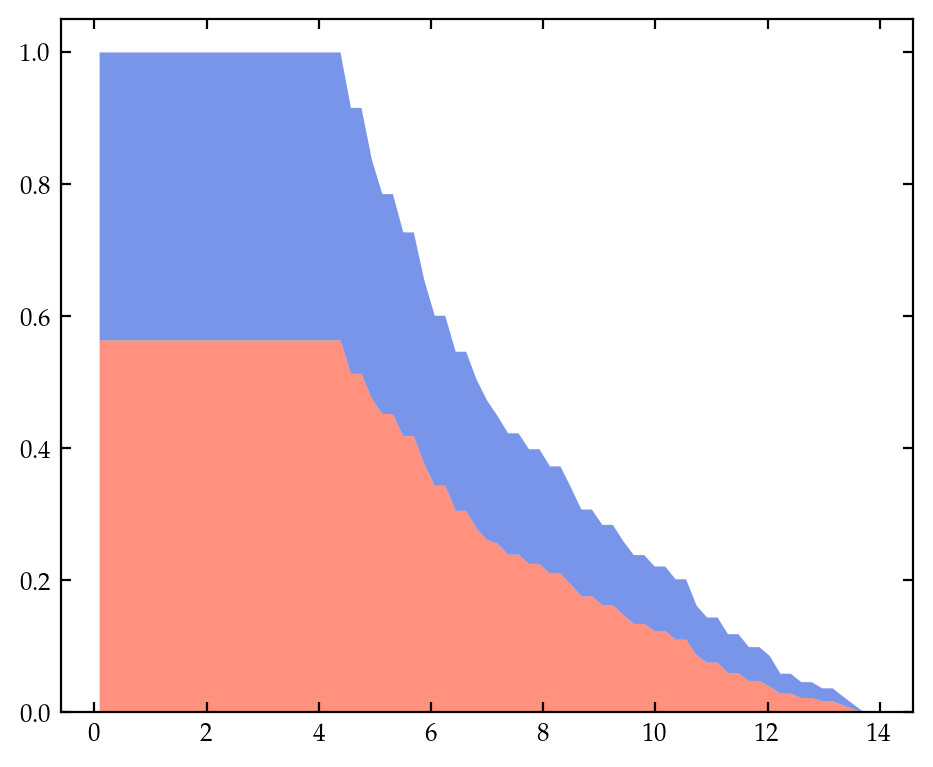

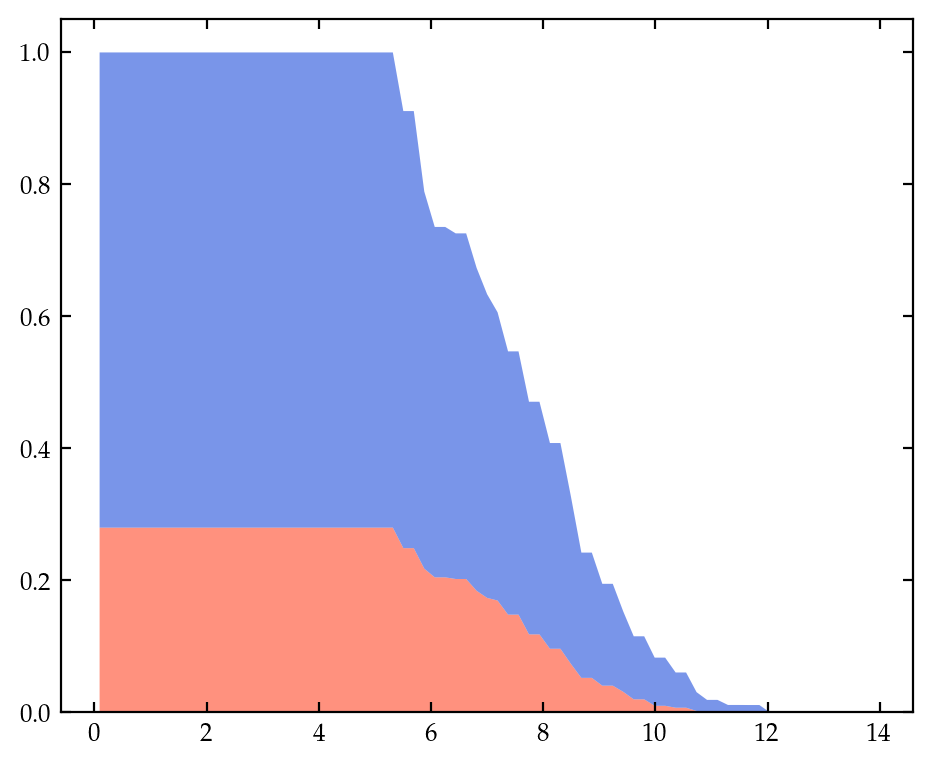

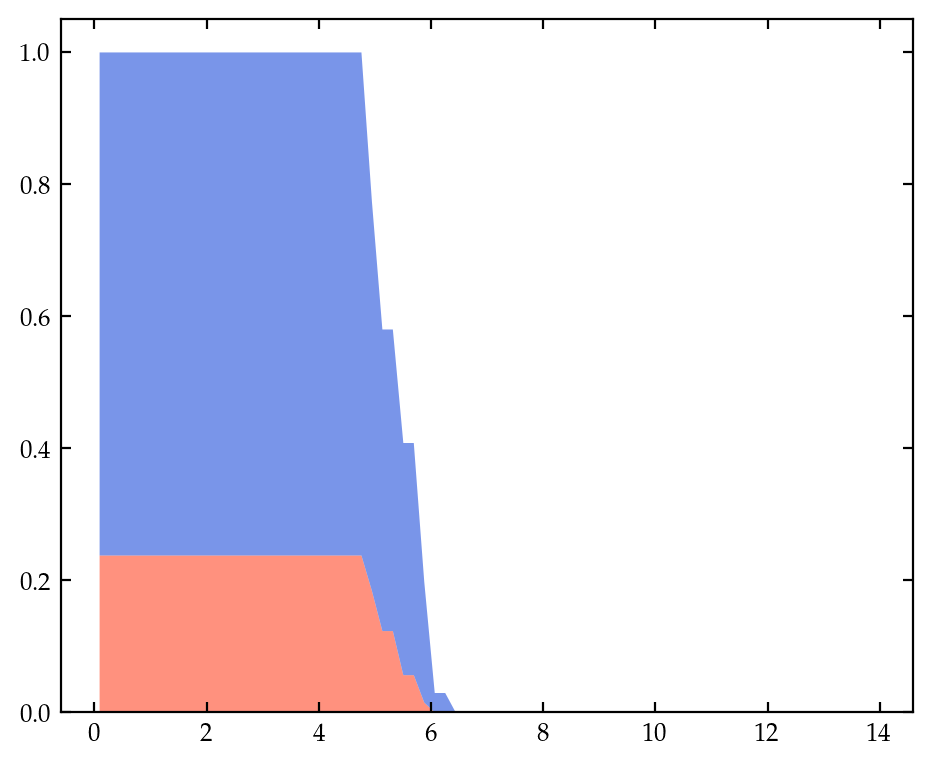

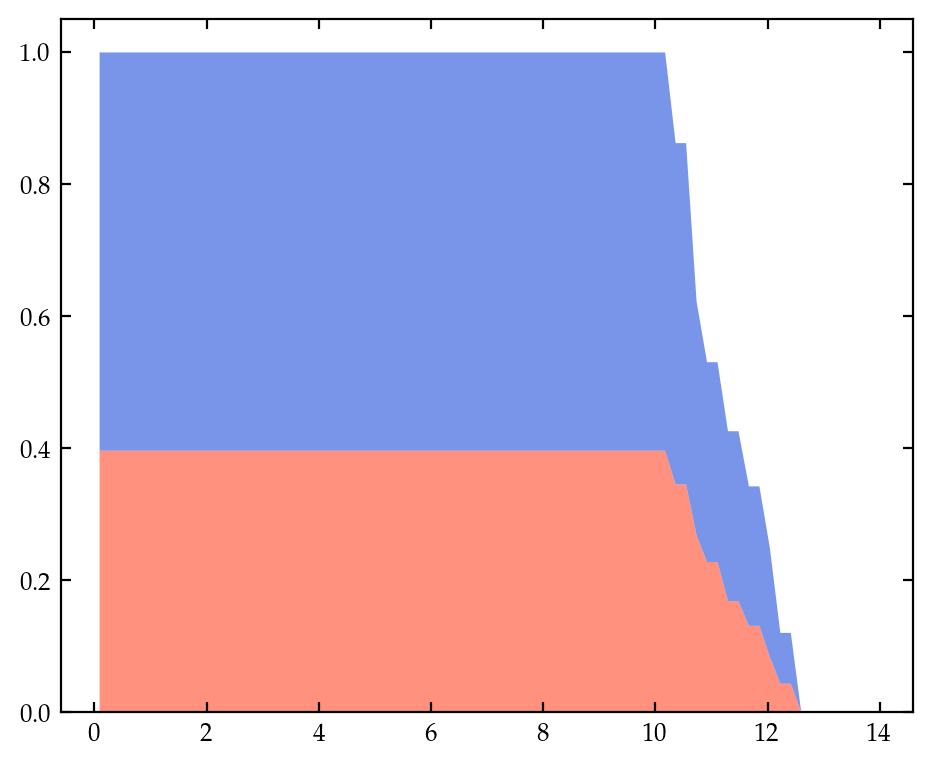

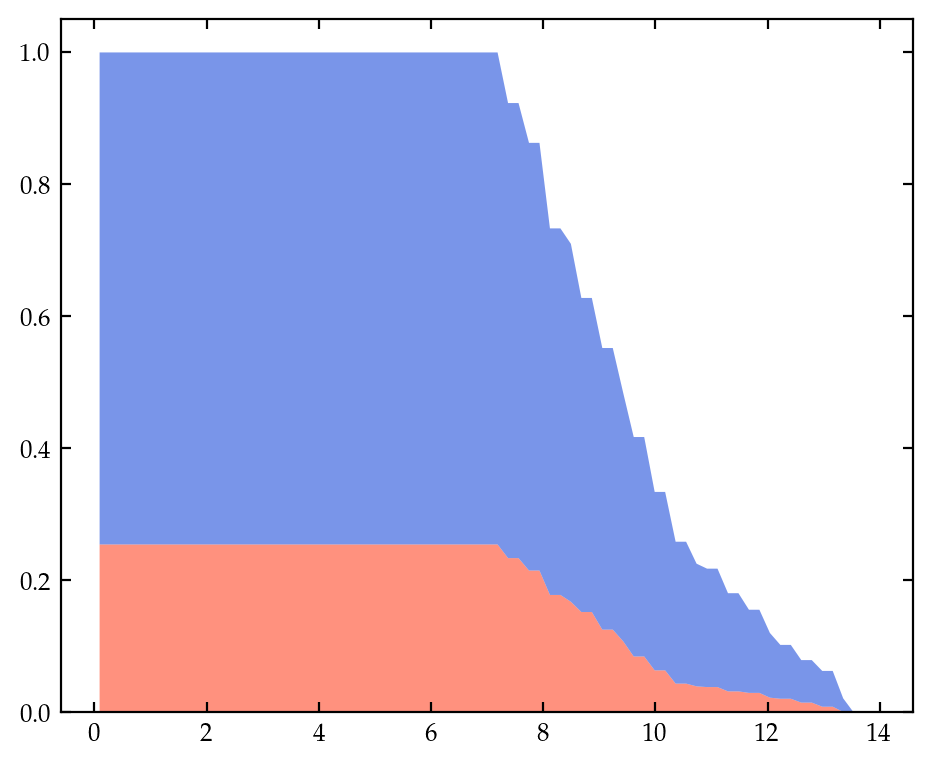

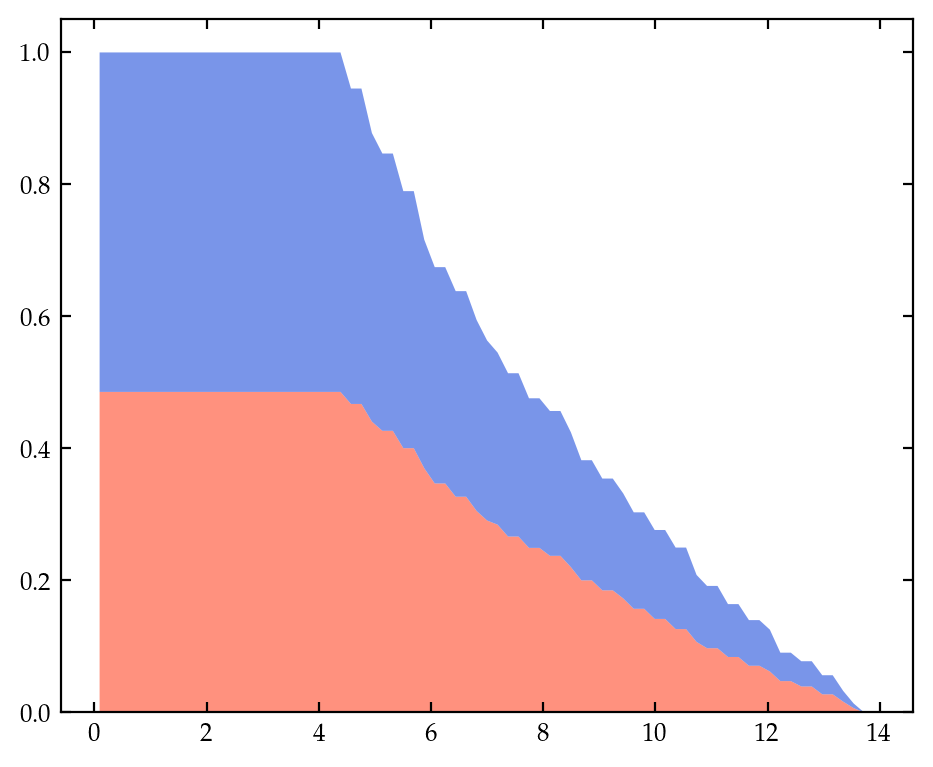

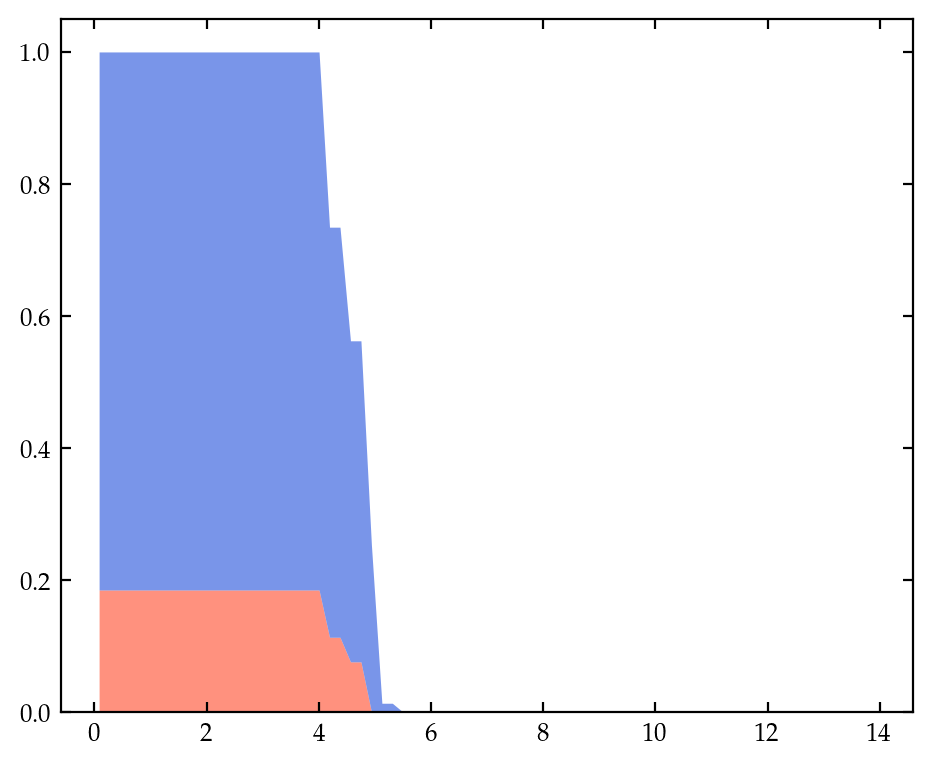

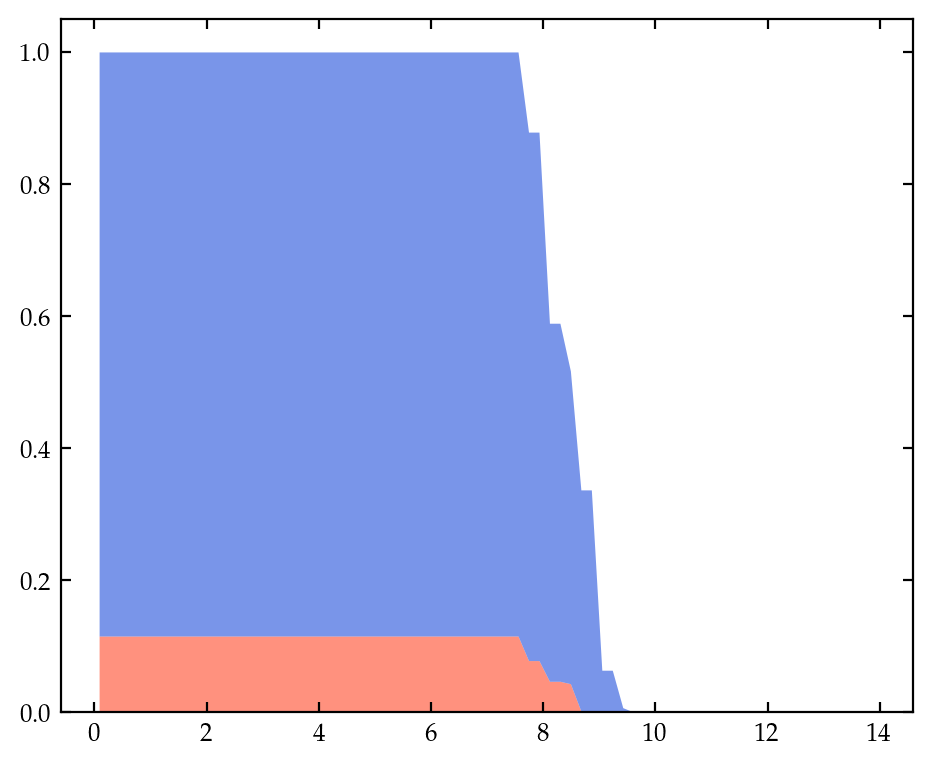

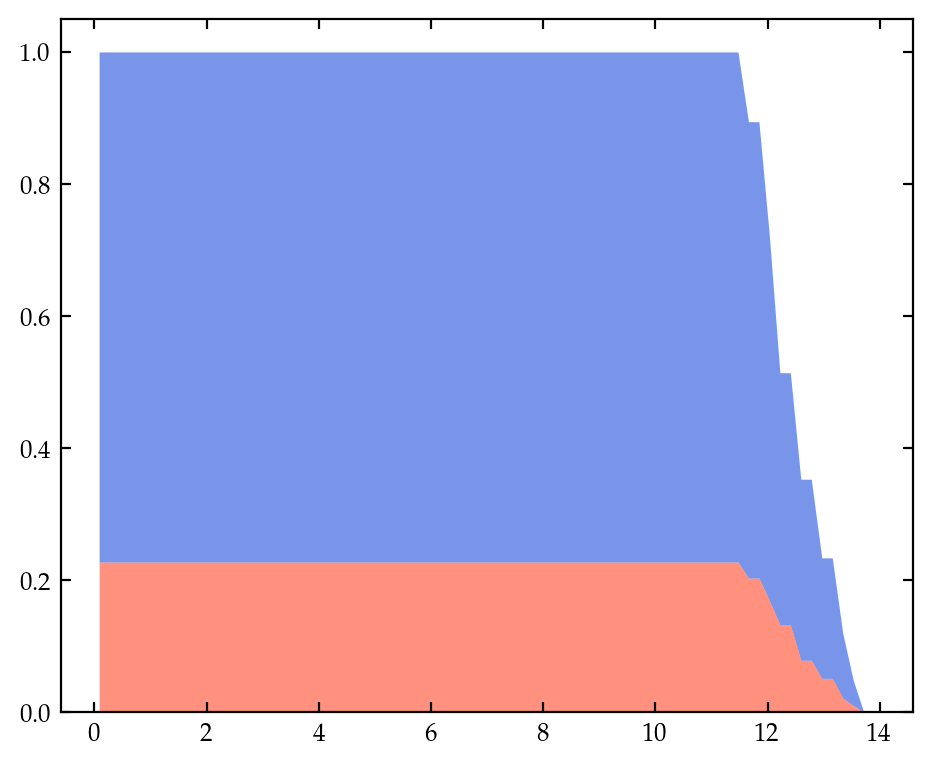

In [12]:
#fraction with respect to stellar mass?
output = pd.DataFrame()
keys = get_keys()
for key in keys:
    
    # Skip the ones I already have
    exclude = ['h242_401']
    
    if key in exclude:
        continue
    
    # defining discharged dataset if not introduced
    sim = str(key[:4])
    haloid = int(key[5:])
    predischarged, discharged = read_one_discharged(key)
    # gas SN-heated/unheated prior to discharge.
    hot = discharged[discharged['snHeated']==True]  # heated.
    cold = discharged[discharged['snHeated']==False]  # unheated.
    
    # read tinfall, tquench, etc. time from csv file
    data = pd.read_csv('SNeData/all-satellite-information-2.csv')
    r_data = data[(data.sim==sim)&(data.haloid==haloid)]
    
    print('Loaded:', key)

    #fraction
    bins = 75
    fig, ax = plt.subplots(1,1, dpi=200, figsize=(5.5,4.5), sharex=True,
                            constrained_layout=False)

    y1, x = np.histogram(hot.time, bins=bins, weights=wt(hot,discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum1 = np.cumsum(y1)
    y2, x = np.histogram(cold.time, bins=bins, weights=wt(cold,discharged),
                         range=(0, 14))
    sum2 = np.cumsum(y2)
    ax.stackplot(bincenters, sum1[-1]-sum1, sum2[-1]-sum2, alpha=0.7,
                 colors=['tomato', 'royalblue'], labels=['SNheated', 'non-SNheated'])         

    y3, x = np.histogram(discharged.time, bins=bins, weights=wt(discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum3 = np.cumsum(y3)
    frac = (y1/y3)[y3>0]
    
    #show where it infalls, quenches if any, where at 1 Rvir, and where at the 1st pericentric
    f_time = float(r_data['tinfall'])
    p_time = float(r_data['1st p_time'])
    vir_time = float(r_data['t_1Rvir_from_Host'])
    q_time = float(r_data['tquench'])

    frac_ptime = np.nan
    try:
        frac_ptime = frac[np.where(bincenters[y3>0] > p_time)[0][0]]
    except:
        frac_ptime = np.nan
    
    #save frac
    r_data['frac_ptime'] = frac_ptime
    print(key, p_time, frac_ptime)
    
    #upload to dataframe
    output = pd.concat([output, r_data])

In [8]:
output.frac_ptime

0     0.591977
1     0.652990
2          NaN
3     0.100039
4     0.304674
5     0.459723
6     0.294186
7     0.691981
8     0.333714
9     0.386350
10    0.636002
11    0.268993
12    0.572404
13    0.000000
14    0.291285
15    0.356434
16    0.114487
17    0.143704
18    0.269818
19    0.692895
20    0.257390
21    0.388417
22    0.361346
23    0.252954
24    0.553403
25    0.000000
26    0.000000
27         NaN
Name: frac_ptime, dtype: float64

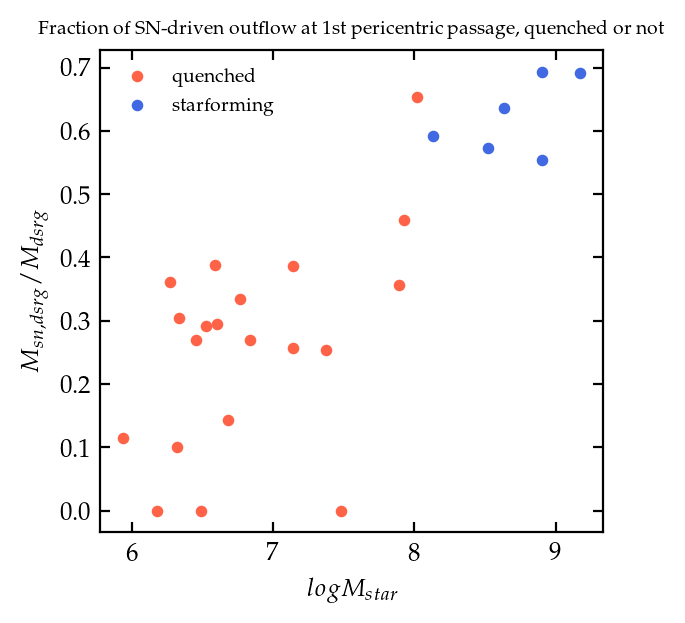

In [15]:
#plot the graph
#quenched? or still star-formation active?
#most of quenched galaxies quench prior to reaching 1 Rvir
quenched = output[output.quenched == True]
starforming = output[output.quenched == False]

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))

#scatter plot for quenched galaxy
xa = np.log10(quenched['M_star'][np.isfinite(quenched['frac_ptime'])])
ya = quenched['frac_ptime'][np.isfinite(quenched['frac_ptime'])]
plt.scatter(xa, ya, c='tomato', label='quenched', s = 10)

#scatter plot for star-forming galaxy
xb = np.log10(starforming['M_star'][np.isfinite(starforming['frac_ptime'])])
yb = starforming['frac_ptime'][np.isfinite(starforming['frac_ptime'])]
plt.scatter(xb, yb, c='royalblue', label='starforming', s = 10)

plt.legend(fontsize=7)
ax.set_xlabel("$log M_{star}$")
ax.set_ylabel('$M_{sn, dsrg} / M_{dsrg}$')
ax.set_title('Fraction of SN-driven outflow at 1st pericentric passage, quenched or not', fontsize = 7)

#save
plt.savefig(f'plots/fracSNdsrg_Mstar4.pdf')
plt.show()

found the keys, starting with:  h148_10
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <
Loaded: h148_10
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_12 <
Loaded: h148_12


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_2 <
Loaded: h148_2


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_249 <
Loaded: h148_249
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_251 <
Loaded: h148_251


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_27 <
Loaded: h148_27
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_282 <
Loaded: h148_282


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_3 <
Loaded: h148_3


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_34 <
Loaded: h148_34
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_38 <
Loaded: h148_38


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_4 <
Loaded: h148_4
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_55 <
Loaded: h148_55


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_6 <
Loaded: h148_6
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_65 <
Loaded: h148_65


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h229_14 <
Loaded: h229_14
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_18 <
Loaded: h229_18


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h229_20 <
Loaded: h229_20
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_22 <
Loaded: h229_22
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_49 <


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1, dpi=200, figsize=(5.5,4.5), sharex=True,
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


Loaded: h229_49
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_10 <
Loaded: h242_10


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h242_21 <
Loaded: h242_21
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_30 <
Loaded: h242_30
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_38 <


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


Loaded: h242_38
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_69 <
Loaded: h242_69


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h242_8 <
Loaded: h242_8


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


> Returning (predischarged, discharged, hot_predischarged) for satellite h329_117 <
Loaded: h329_117
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_29 <
Loaded: h329_29
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_7 <
Loaded: h329_7


/tmp/ipykernel_23903/4027703730.py:50: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]


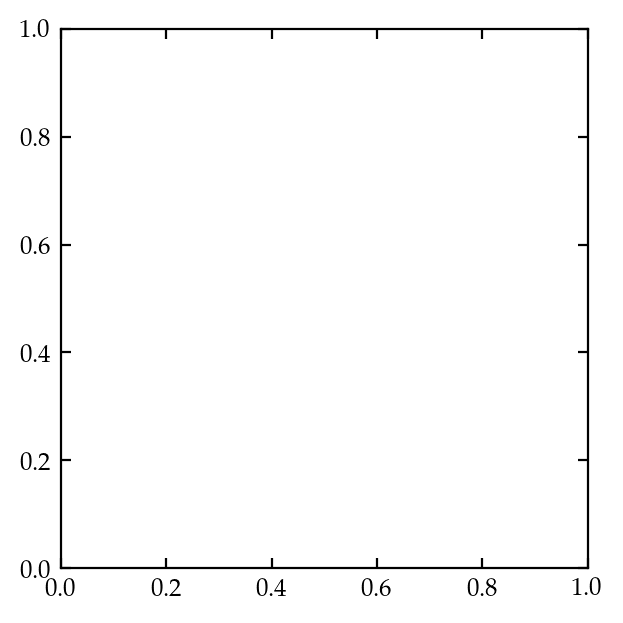

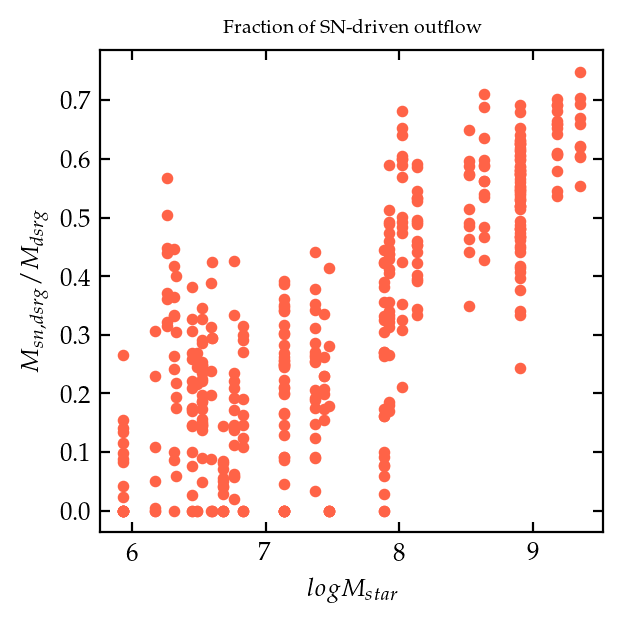

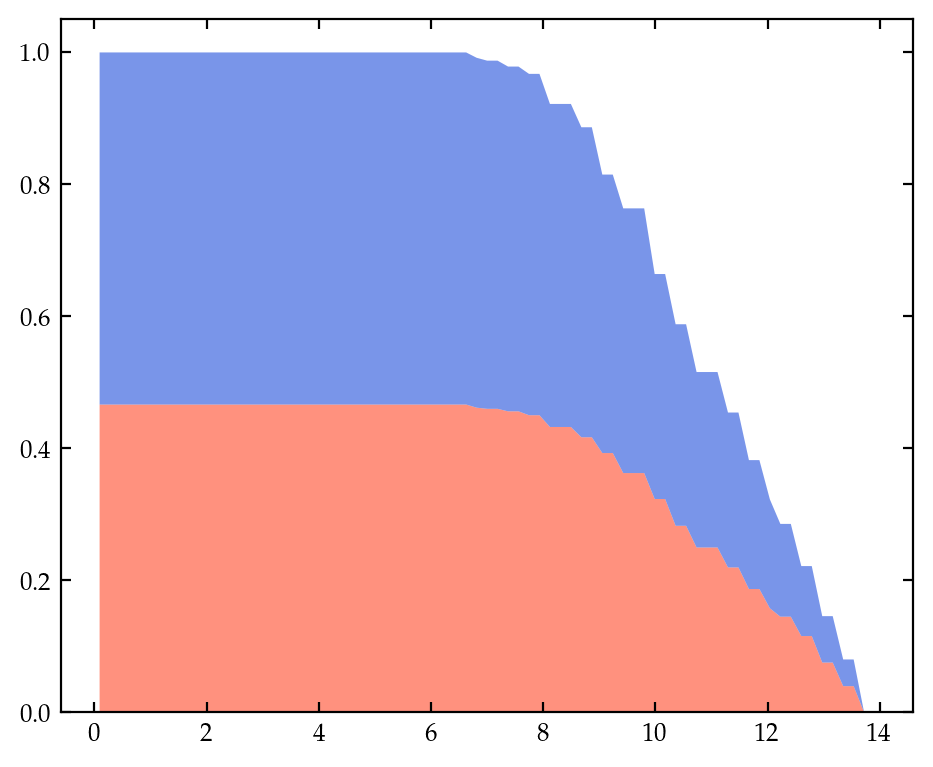

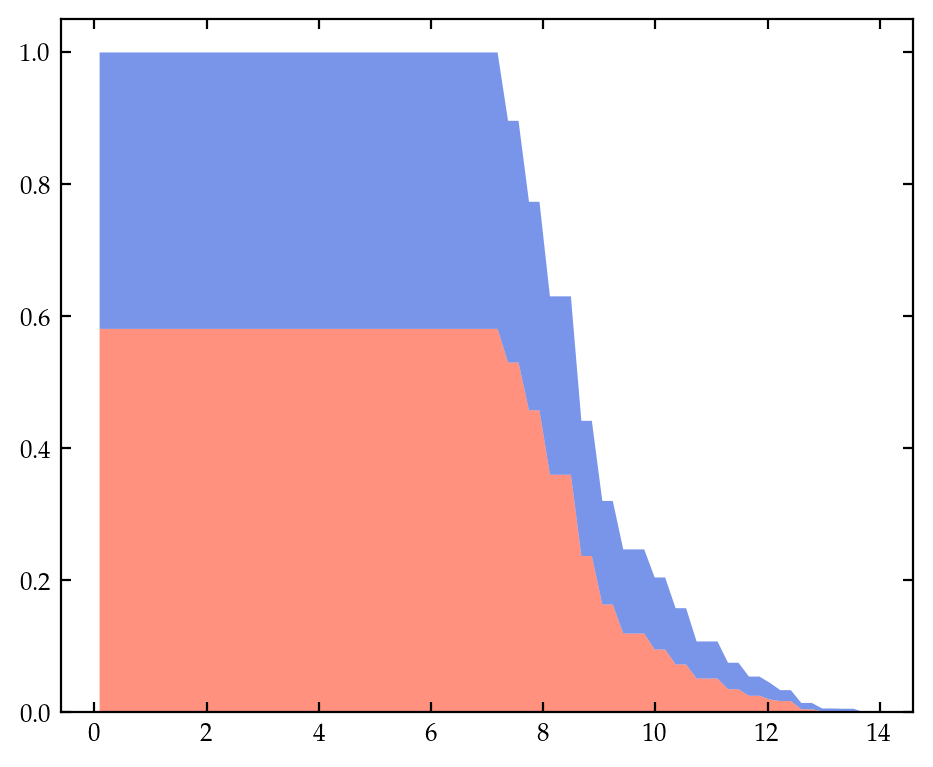

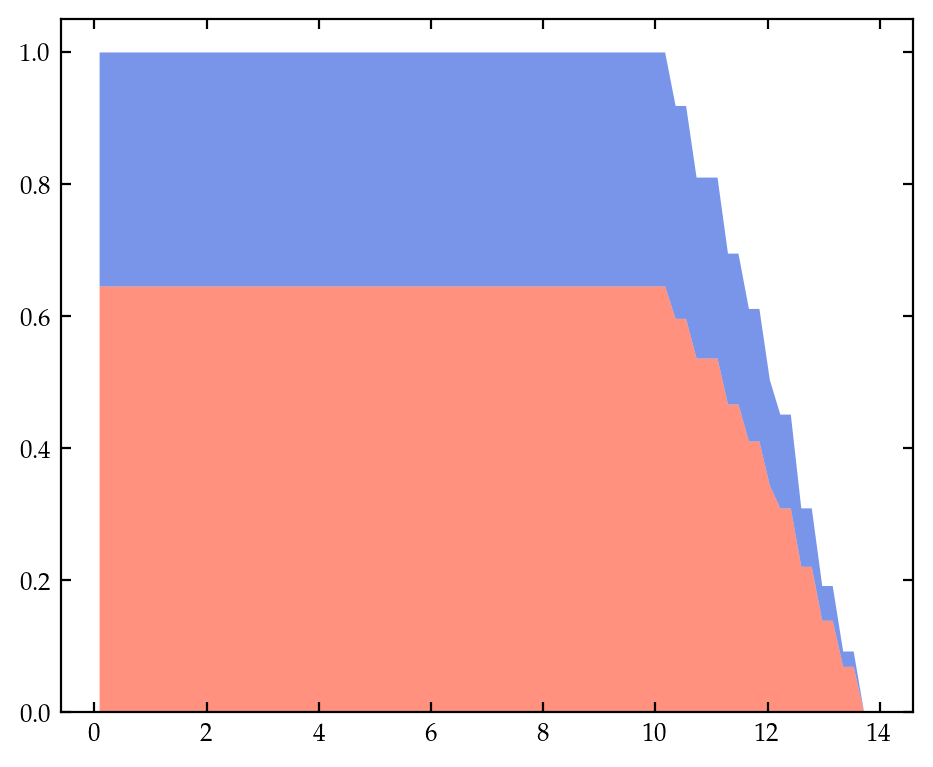

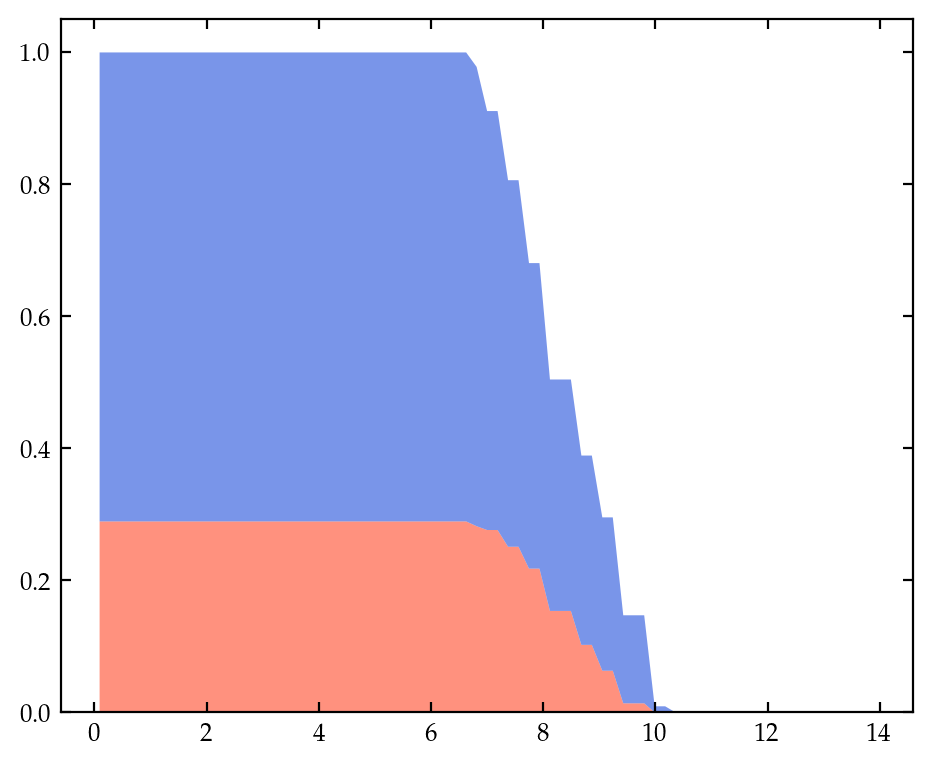

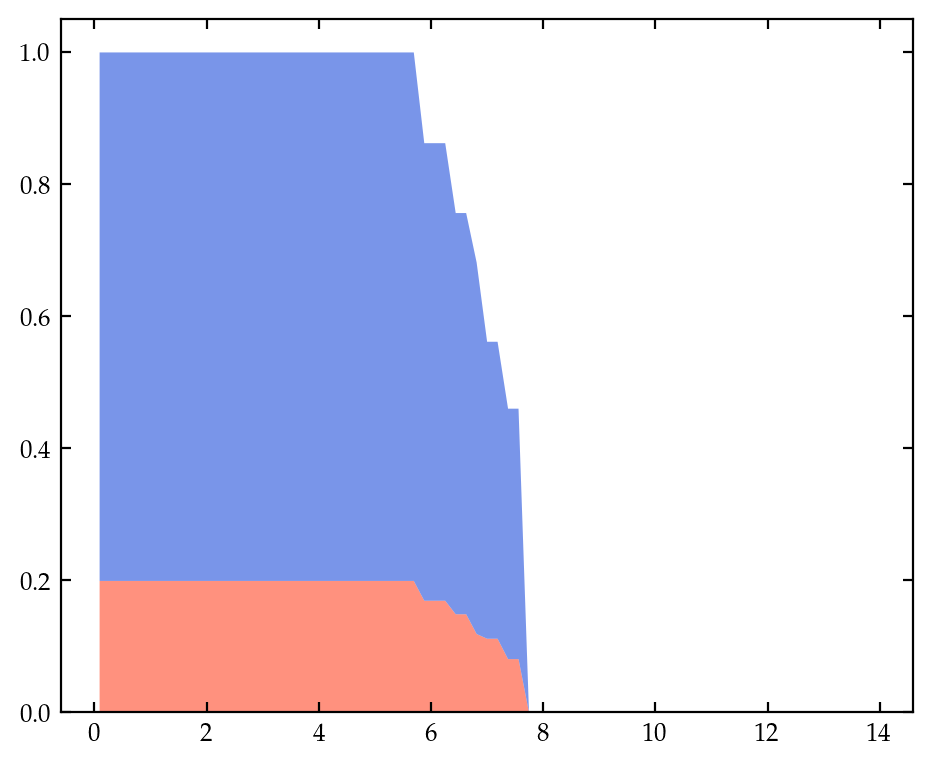

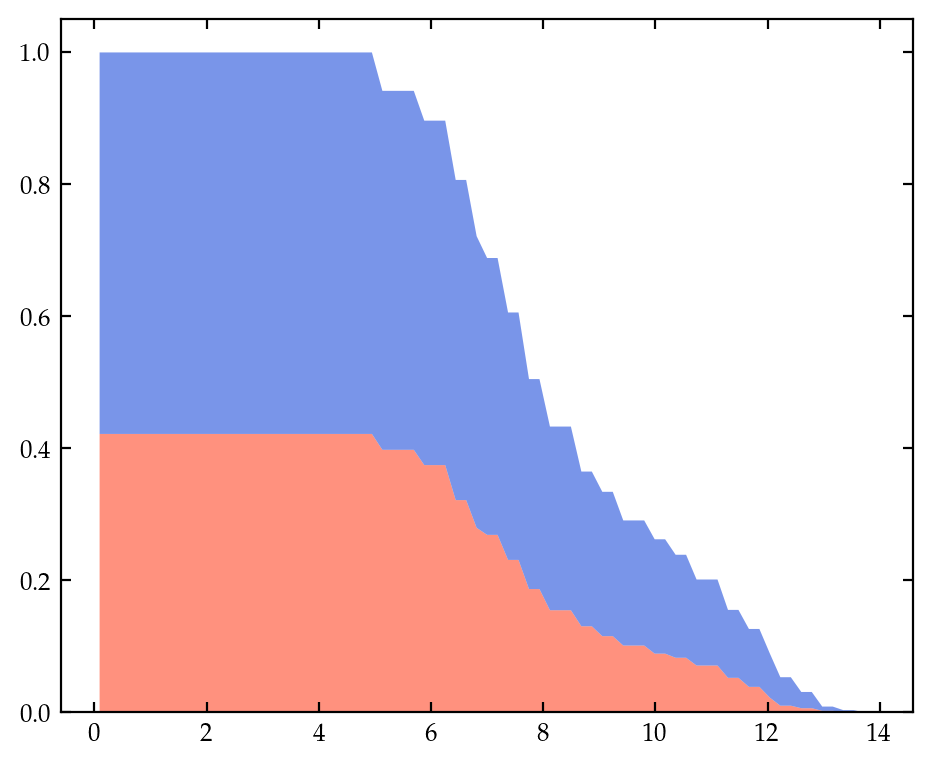

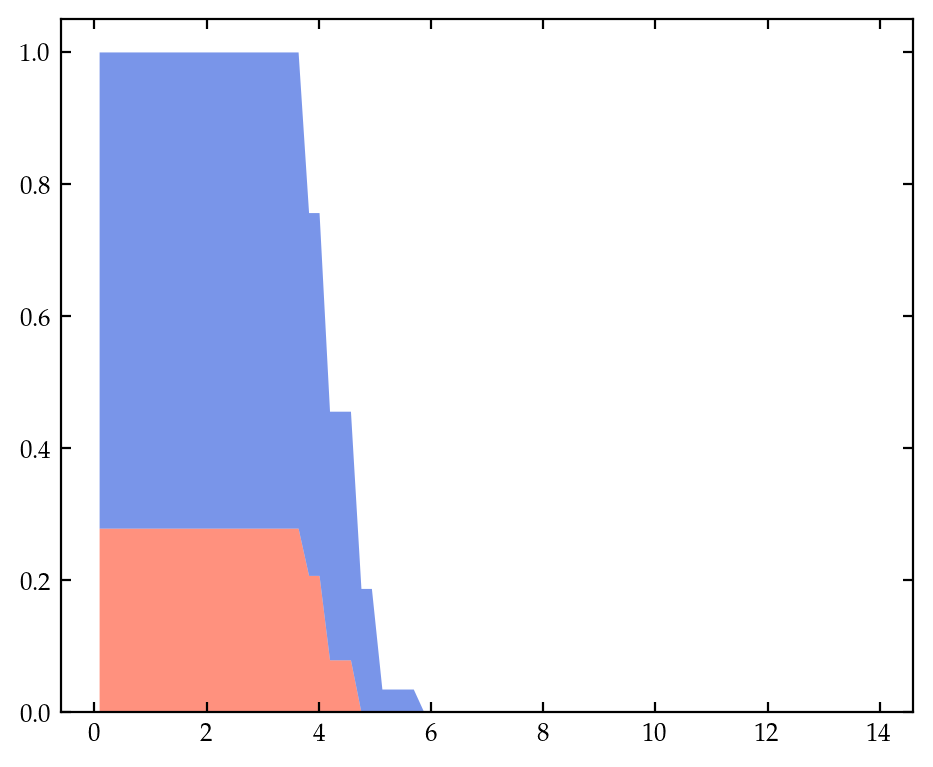

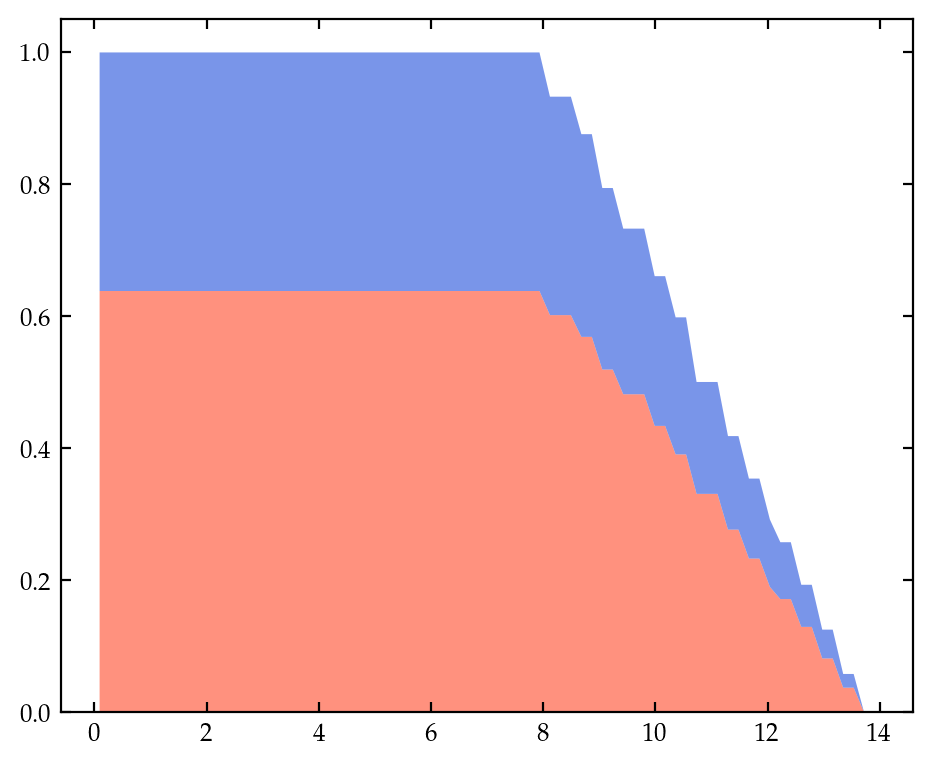

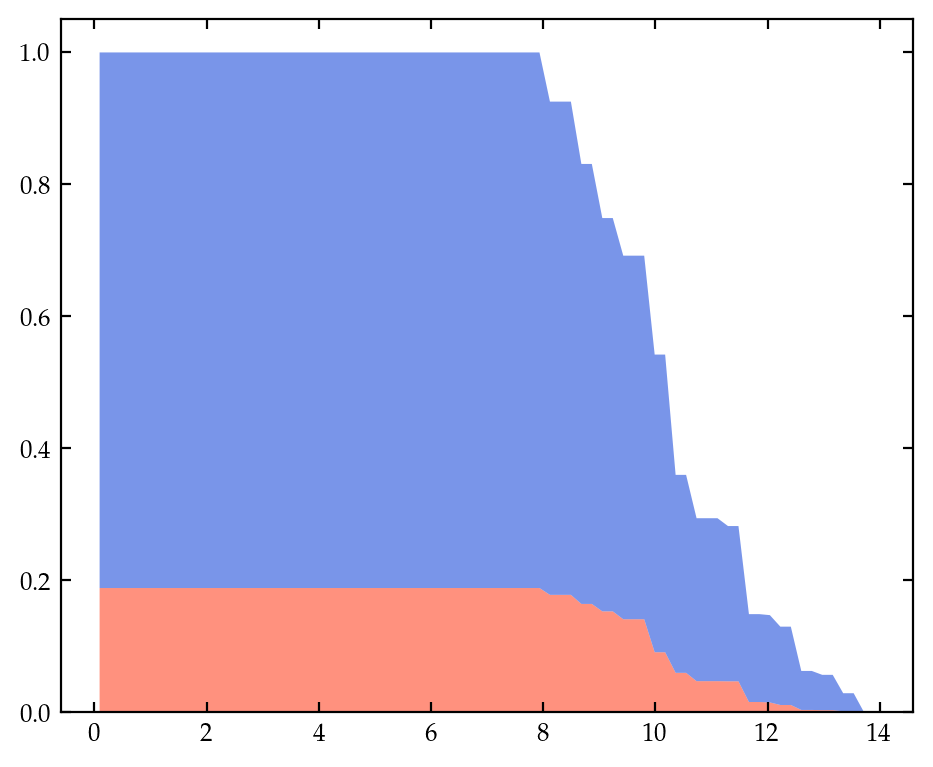

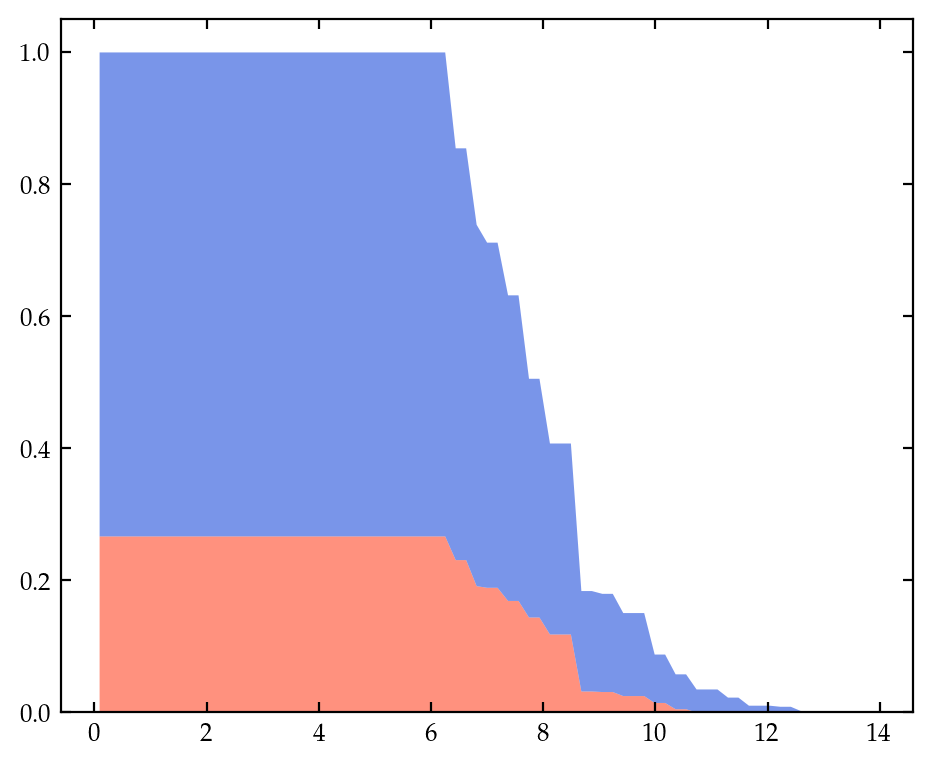

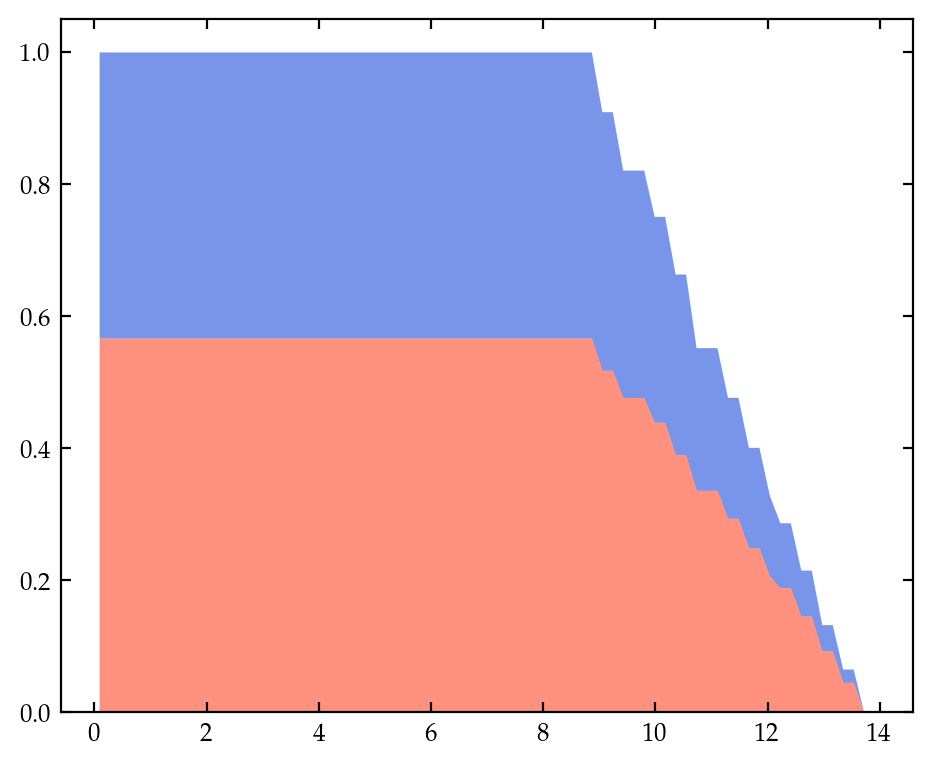

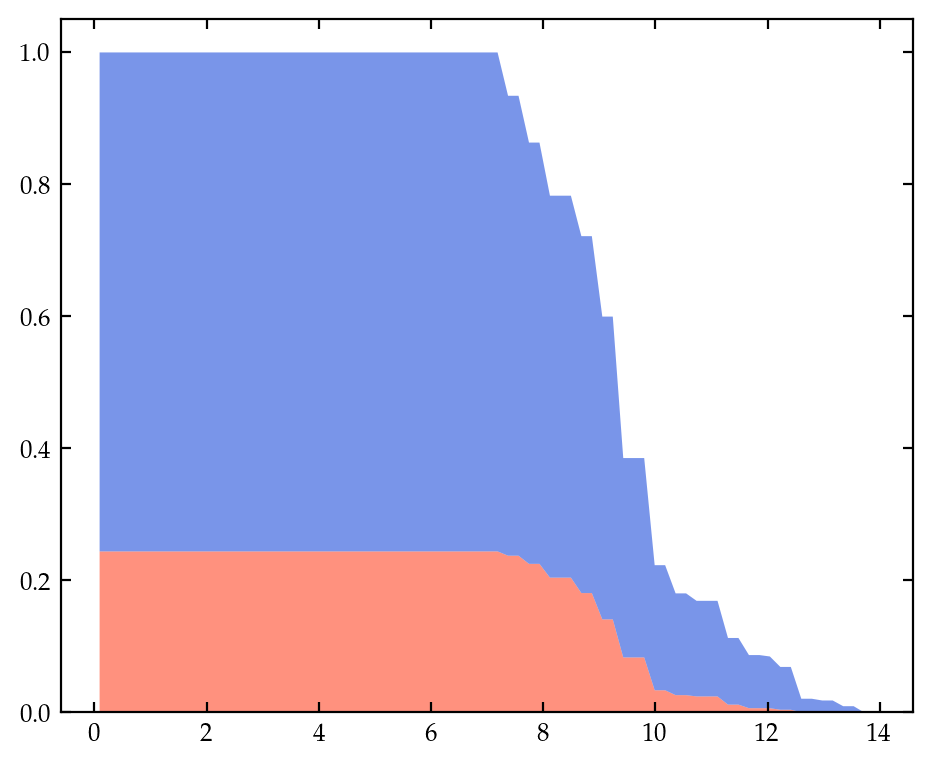

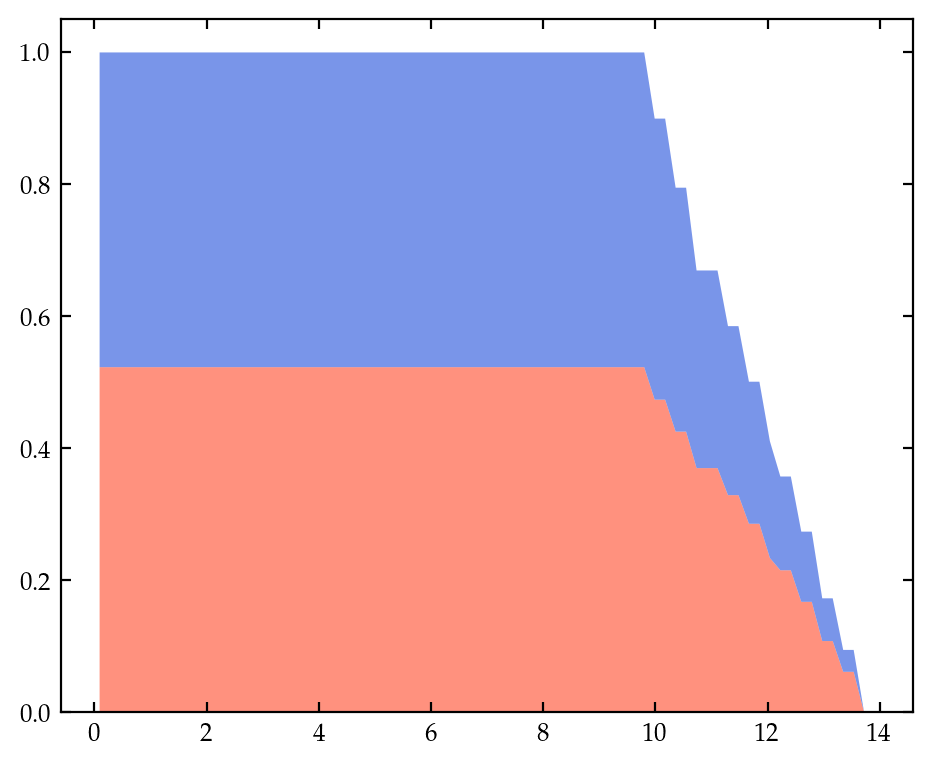

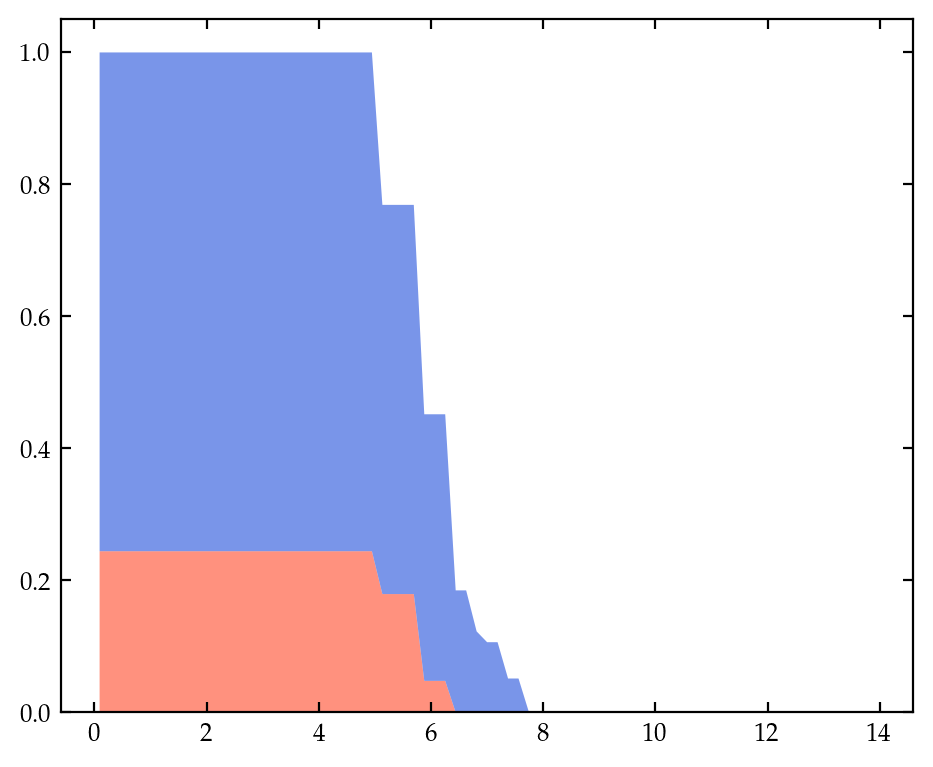

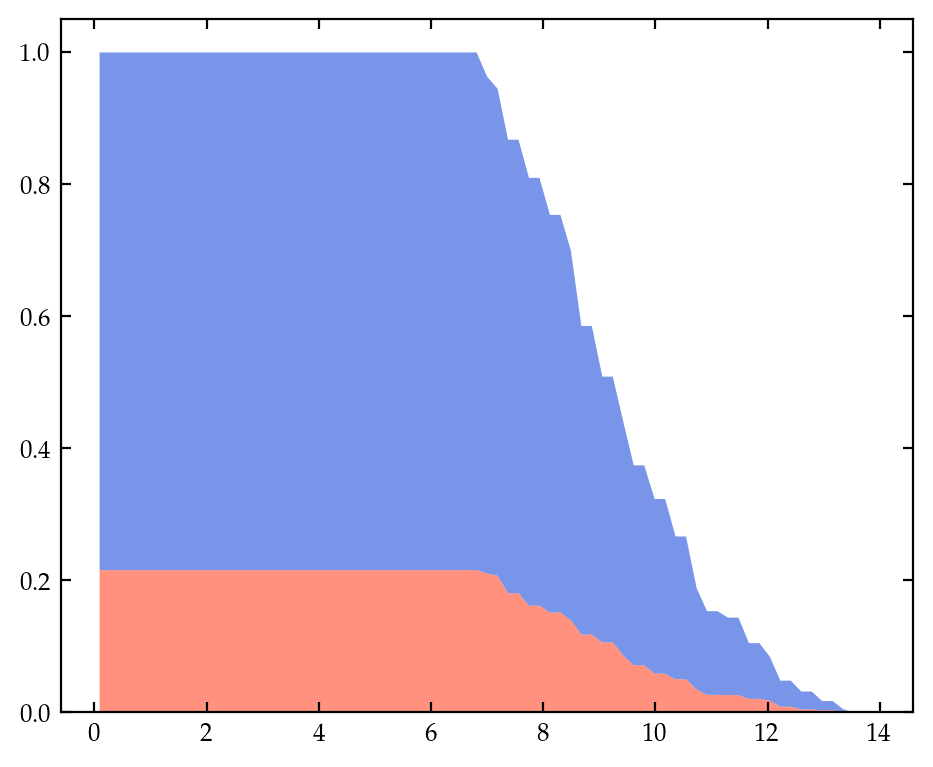

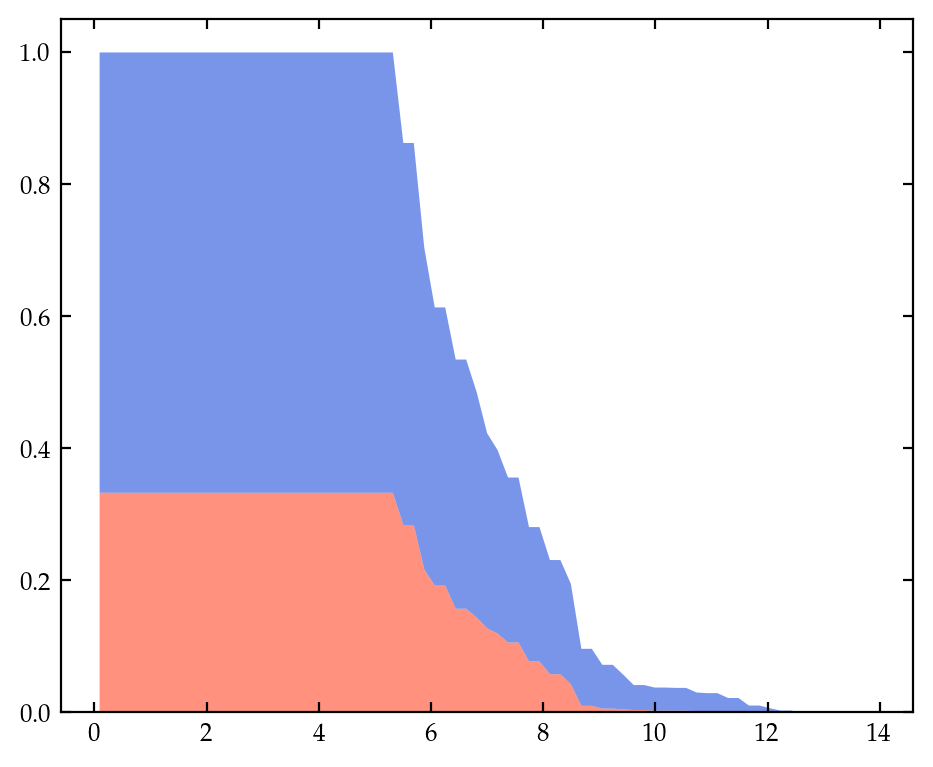

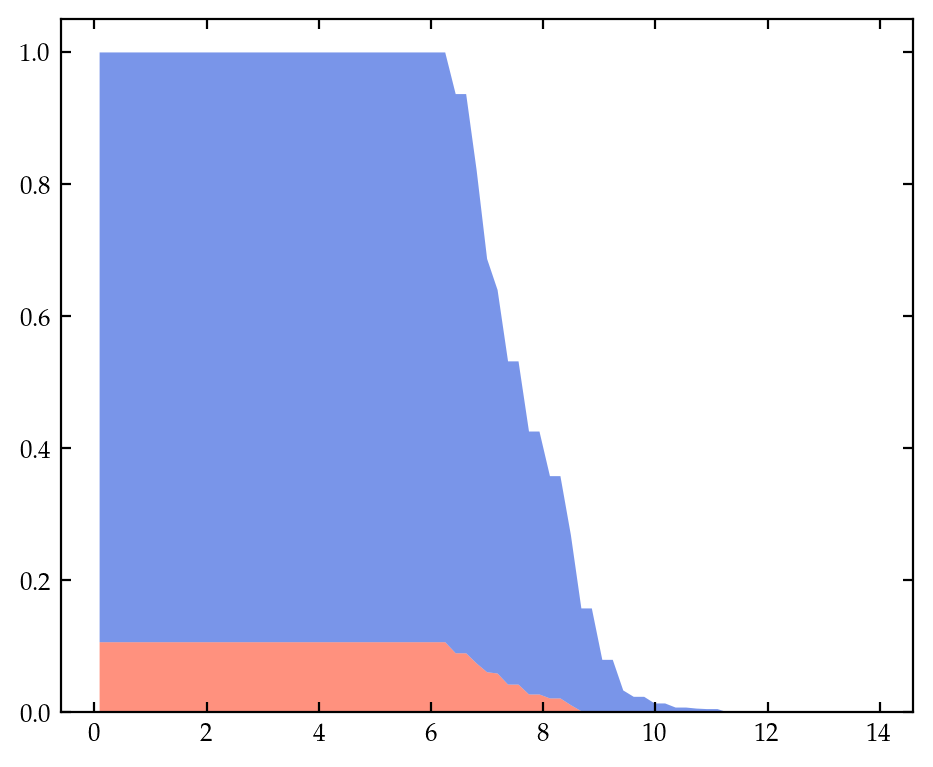

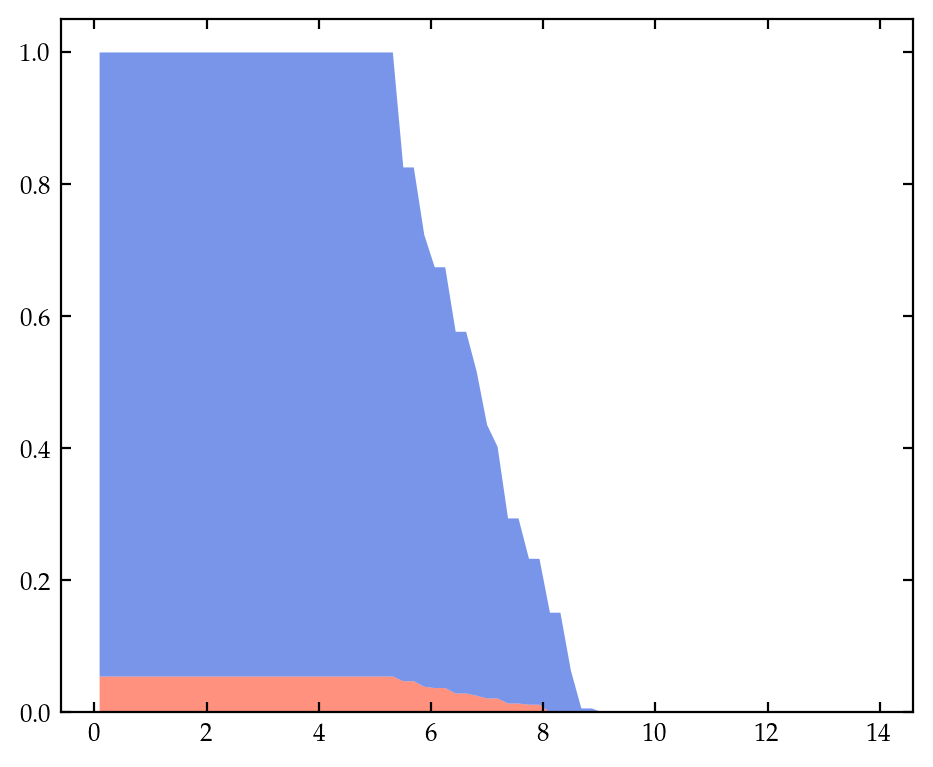

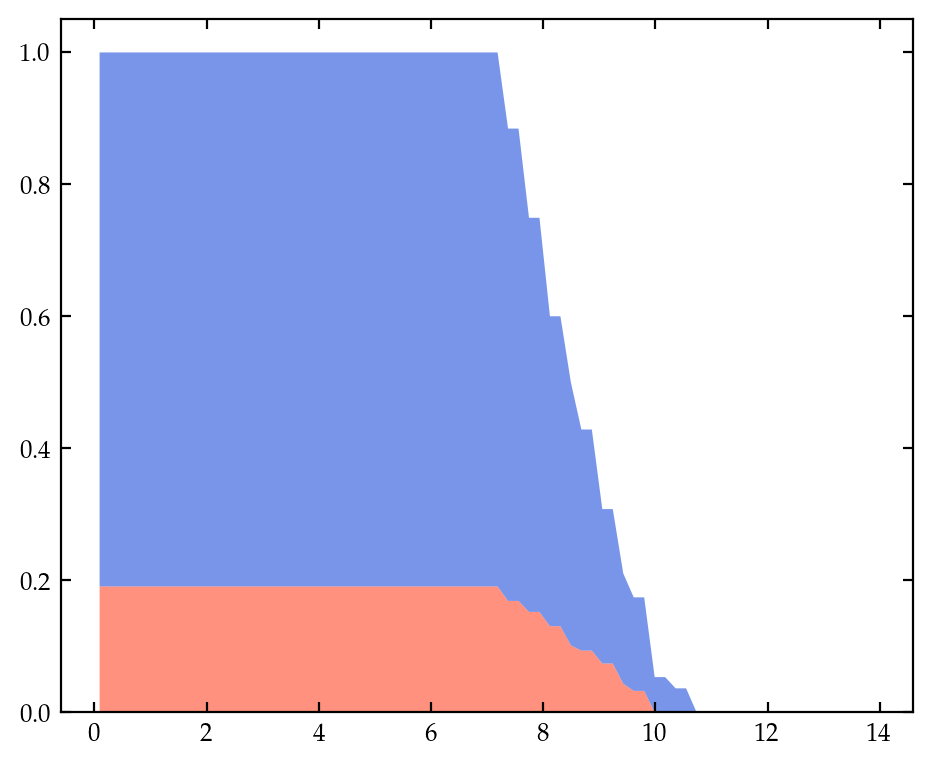

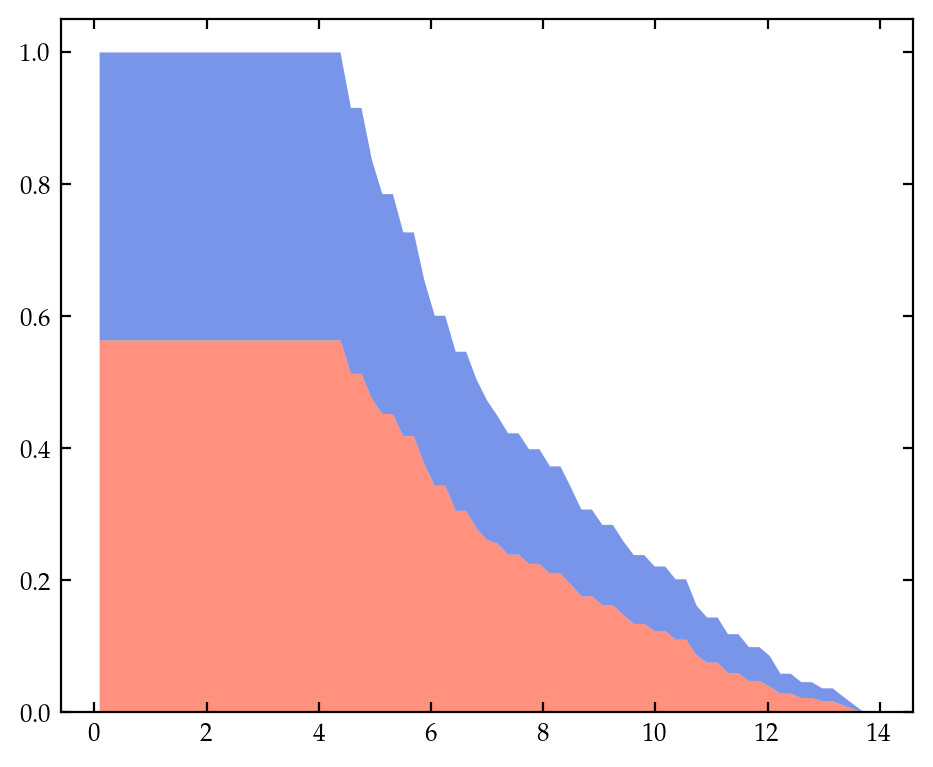

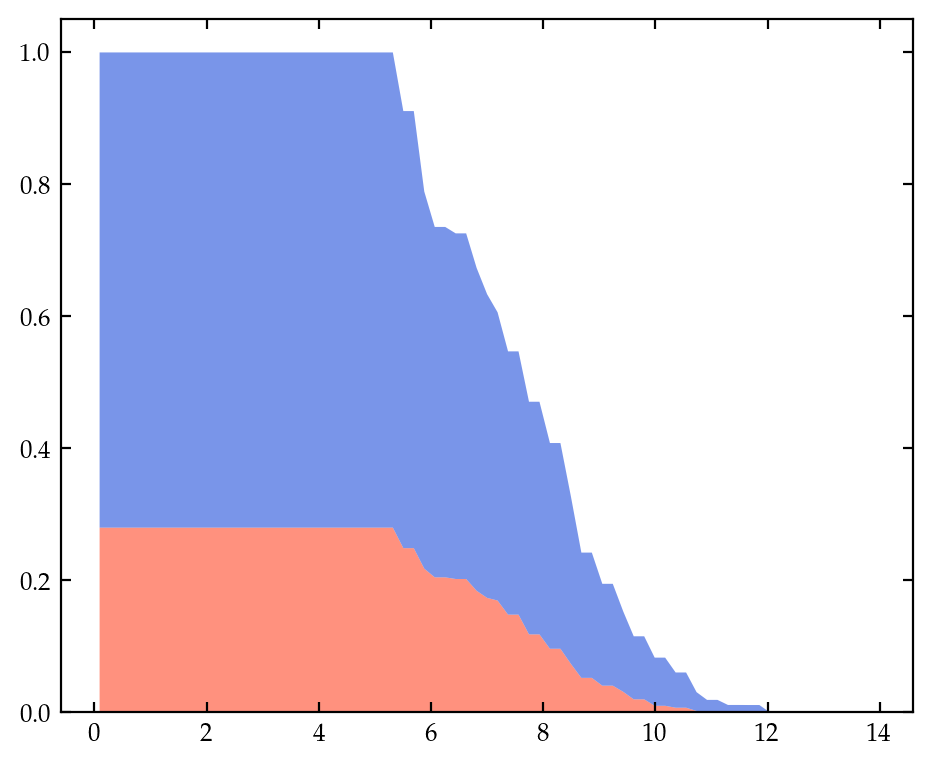

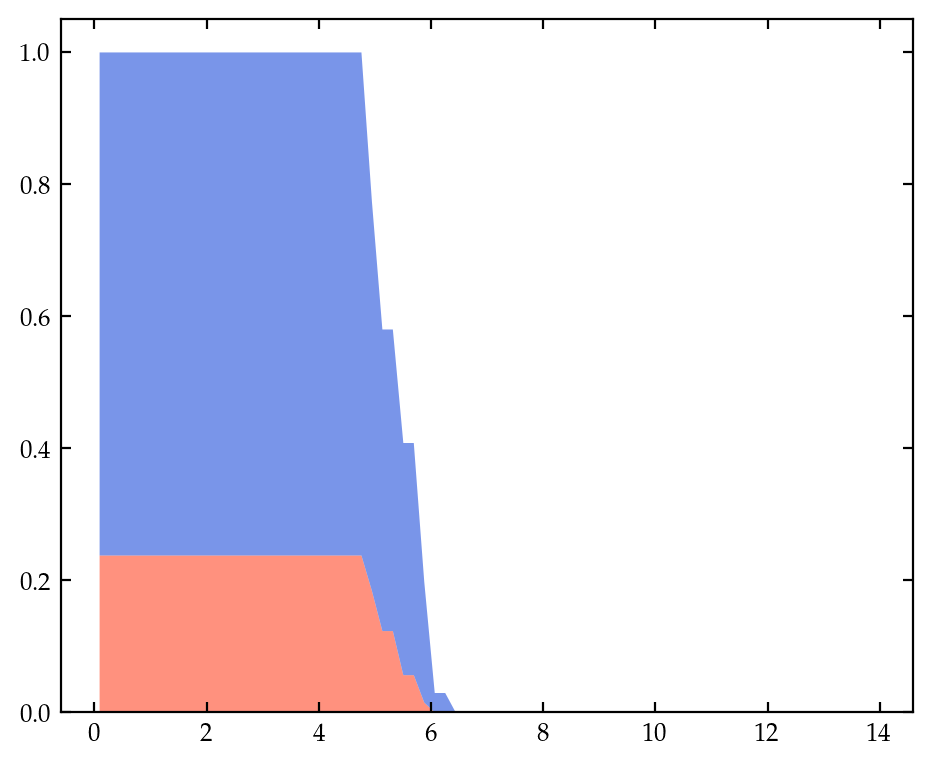

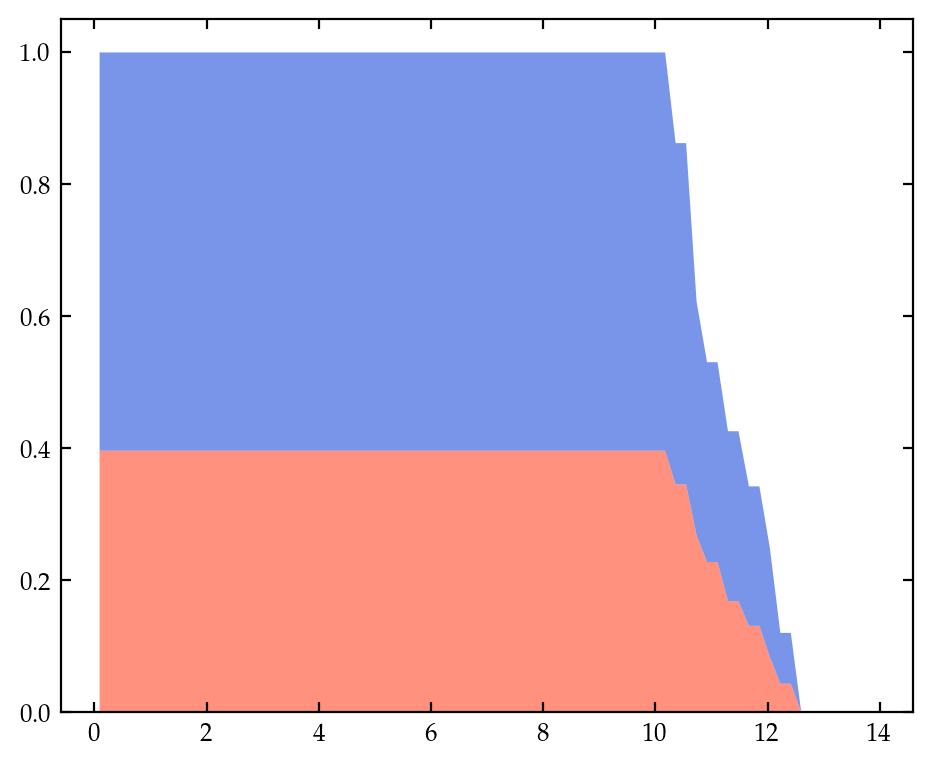

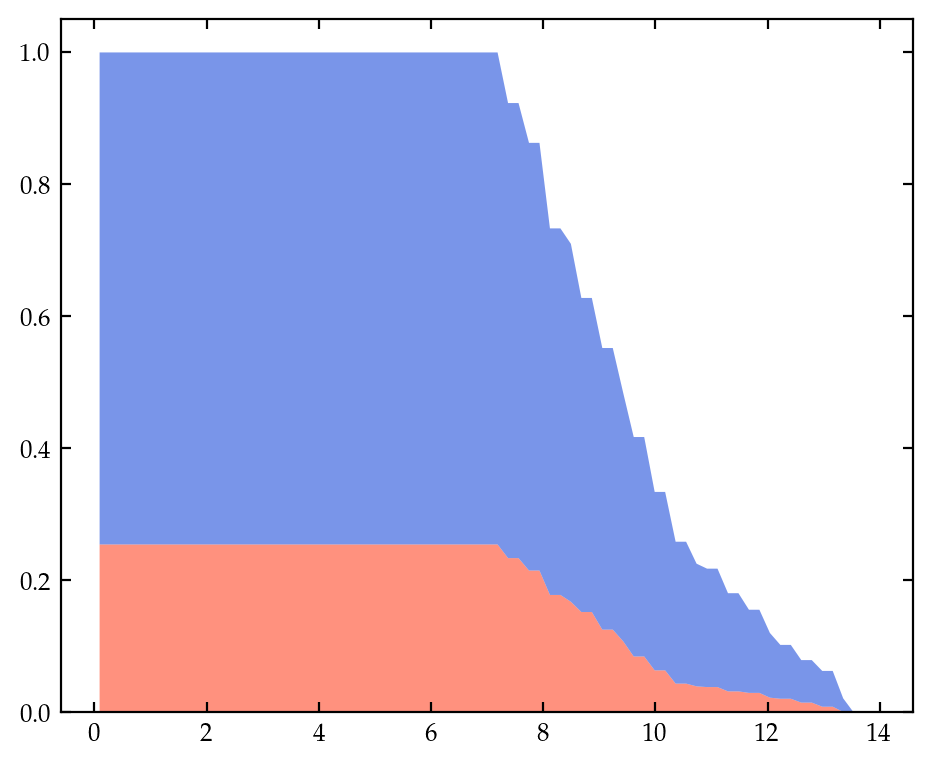

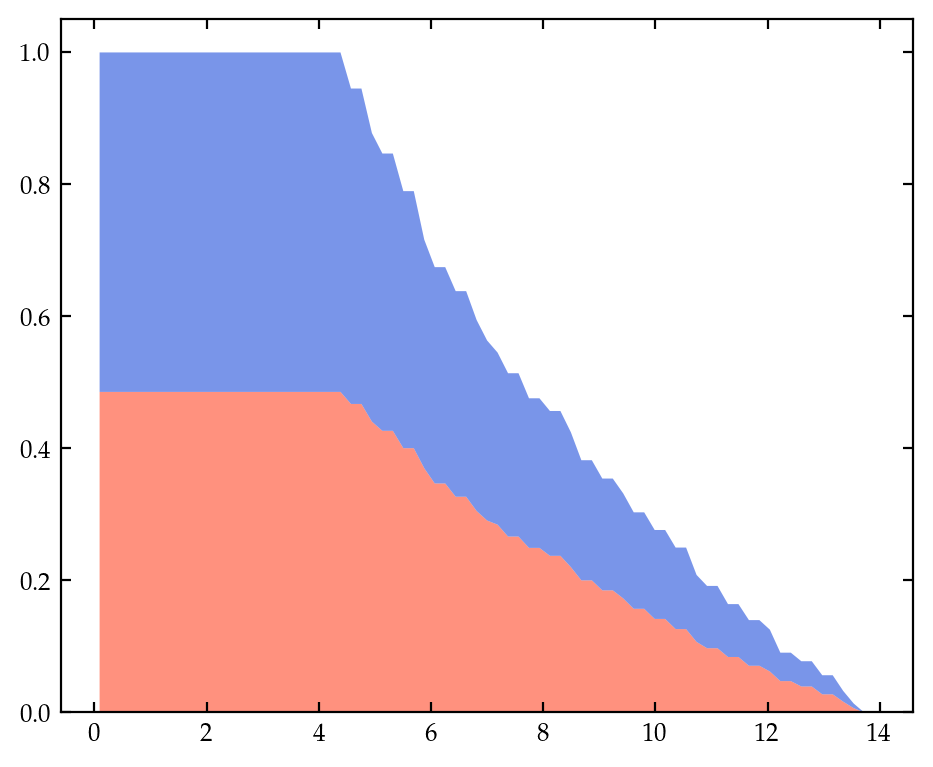

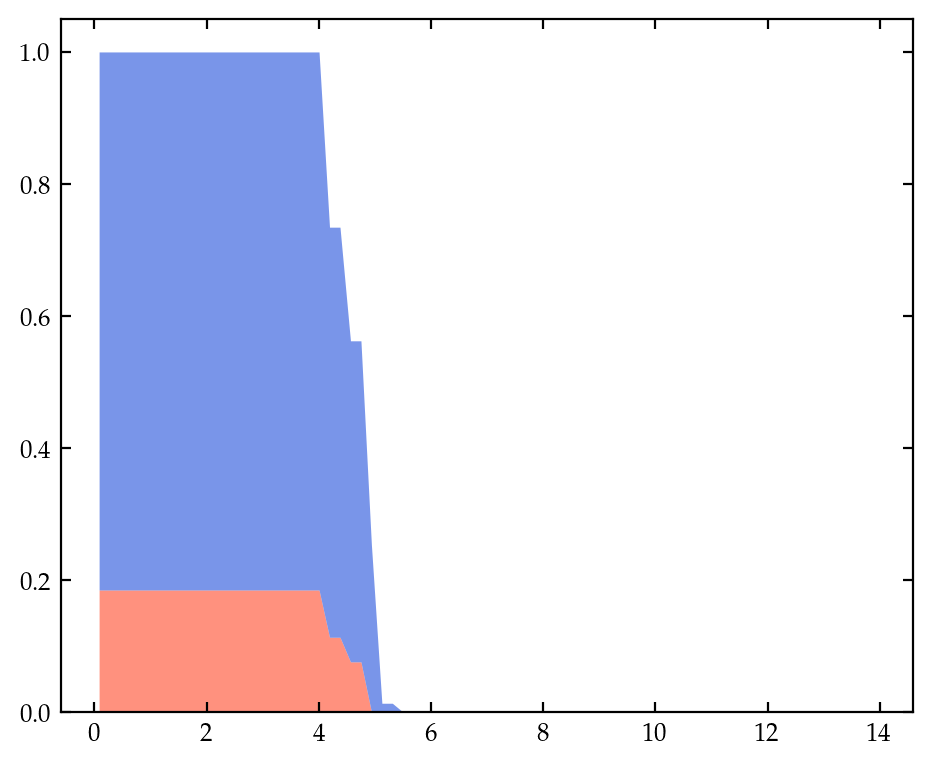

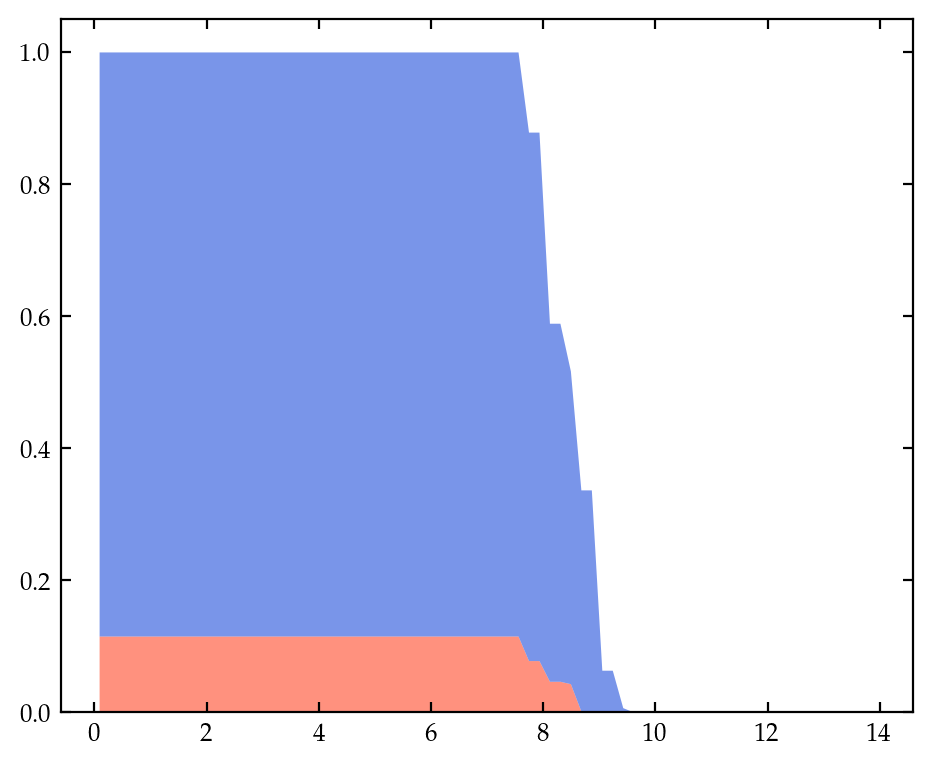

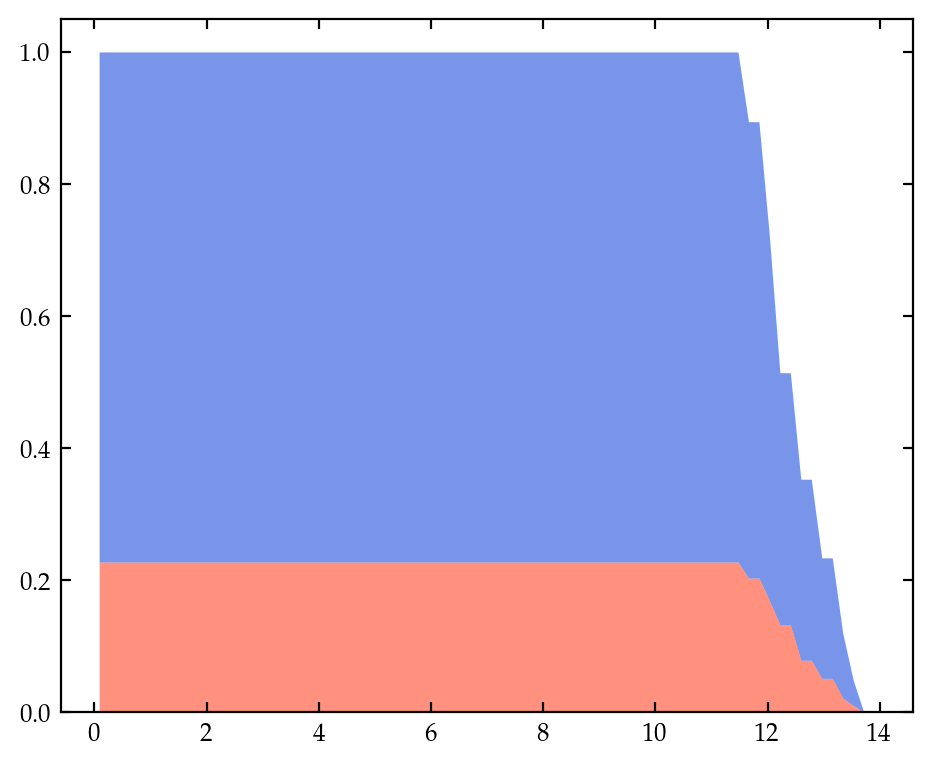

<Figure size 1280x960 with 0 Axes>

In [22]:
#plot the graph but for the entire time
#quenched? or still star-formation active?
#most of quenched galaxies quench prior to reaching 1 Rvir

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
fig1, ax1 = plt.subplots(1,1, dpi=200, figsize = (3,3))

keys = get_keys()
for key in keys:
    
    # Skip the ones I already have
    exclude = ['h242_401']
    
    if key in exclude:
        continue
    
    # defining discharged dataset if not introduced
    sim = str(key[:4])
    haloid = int(key[5:])
    predischarged, discharged = read_one_discharged(key)
    # gas SN-heated/unheated prior to discharge.
    hot = discharged[discharged['snHeated']==True]  # heated.
    cold = discharged[discharged['snHeated']==False]  # unheated.
    
    # read tinfall, tquench, etc. time from csv file
    data = pd.read_csv('SNeData/all-satellite-information-2.csv')
    r_data = data[(data.sim==sim)&(data.haloid==haloid)]
    
    print('Loaded:', key)

    #fraction
    bins = 75
    fig, ax = plt.subplots(1,1, dpi=200, figsize=(5.5,4.5), sharex=True,
                            constrained_layout=False)

    y1, x = np.histogram(hot.time, bins=bins, weights=wt(hot,discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum1 = np.cumsum(y1)
    y2, x = np.histogram(cold.time, bins=bins, weights=wt(cold,discharged),
                         range=(0, 14))
    sum2 = np.cumsum(y2)
    ax.stackplot(bincenters, sum1[-1]-sum1, sum2[-1]-sum2, alpha=0.7,
                 colors=['tomato', 'royalblue'], labels=['SNheated', 'non-SNheated'])         

    y3, x = np.histogram(discharged.time, bins=bins, weights=wt(discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum3 = np.cumsum(y3)
    frac = (y1/y3)[y3>0]
    
#     quenched = r_data[r_data.quenched == True]
#     starforming = r_data[r_data.quenched == False]

    #scatter plot for quenched galaxy
    xa = np.full(len(frac), np.log10(r_data['M_star']))
    ya = frac
    ax1.scatter(xa, ya, c='tomato', label='quenched', s = 10)

ax1.set_xlabel("$log M_{star}$")
ax1.set_ylabel('$M_{sn, dsrg} / M_{dsrg}$')
ax1.set_title('Fraction of SN-driven outflow', fontsize = 7)

#save
plt.show()
plt.savefig(f'plots/S24_FracSN_All.pdf')

In [30]:
# fraction of gas loss at 1 Rvir reached
#fraction with respect to stellar mass?
output = pd.DataFrame()

for key in keys:
    
    # Skip the ones I already have
    exclude = ['h242_401']
    
    if key in exclude:
        continue
    
    # defining discharged dataset if not introduced
    sim = str(key[:4])
    haloid = int(key[5:])
    predischarged, discharged = read_one_discharged(key)
    # gas SN-heated/unheated prior to discharge.
    hot = discharged[discharged['snHeated']==True]  # heated.
    cold = discharged[discharged['snHeated']==False]  # unheated.
    
    # read tinfall, tquench, etc. time from csv file
    data = pd.read_csv('SNeData/all-satellite-information-2.csv')
    r_data = data[(data.sim==sim)&(data.haloid==haloid)]
    
    print('Loaded:', key)

    #fraction
    bins = 75
#     fig, ax = plt.subplots(1,1, dpi=200, figsize=(5.5,4.5), sharex=True,
#                            constrained_layout=False)

    y1, x = np.histogram(hot.time, bins=bins, weights=wt(hot,discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum1 = np.cumsum(y1)
    y2, x = np.histogram(cold.time, bins=bins, weights=wt(cold,discharged),
                         range=(0, 14))
    sum2 = np.cumsum(y2)
    ax.stackplot(bincenters, sum1[-1]-sum1, sum2[-1]-sum2, alpha=0.7,
                 colors=['tomato', 'royalblue'], labels=['SNheated', 'non-SNheated'])         

    y3, x = np.histogram(discharged.time, bins=bins, weights=wt(discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum3 = np.cumsum(y3)
    frac = (y1/y3)[y3>0]
    
    #show where it infalls, quenches if any, where at 1 Rvir, and where at the 1st pericentric
    f_time = float(r_data['tinfall'])
    p_time = float(r_data['1st p_time'])
    vir_time = float(r_data['t_1Rvir_from_Host'])
    q_time = float(r_data['tquench'])

    frac_virtime = np.nan
    try:
        frac_virtime = frac[np.where(bincenters[y3>0] > vir_time)[0][0]]
    except:
        frac_virtime = np.nan
    
    #save frac
    r_data['frac_virtime'] = frac_virtime
    print(key, vir_time, frac_virtime)
    
    #upload to dataframe
    output = pd.concat([output, r_data])

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <
Loaded: h148_10
h148_10 7.767072171295828 0.39115176173910055
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_12 <
Loaded: h148_12
h148_12 9.490993692946342 0.5698229955373671


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_2 <
Loaded: h148_2
h148_2 12.50785635584716 0.6229220659200907


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46:

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_249 <
Loaded: h148_249
h148_249 8.198052551708967 0.4461624586421724
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_251 <
Loaded: h148_251
h148_251 6.905111410469933 0.05937496075926755
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_27 <
Loaded: h148_27
h148_27 6.474131030057089 0.49308716684156273
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_282 <
Loaded: h148_282
h148_282 5.181189888818481 0.0


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_3 <
Loaded: h148_3
h148_3 9.490993692946342 0.6654446382713943


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46:

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_34 <
Loaded: h148_34
h148_34 9.060013312533592 0.2096770941429064
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_38 <
Loaded: h148_38
h148_38 7.336091790882829 0.2498062468221575
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_4 <
Loaded: h148_4
h148_4 12.07687597543439 0.4281169392765938
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_55 <
Loaded: h148_55
h148_55 10.35295445377185 0.17307397541808722


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_6 <
Loaded: h148_6
h148_6 11.645895595020118 0.5150273552866367
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_65 <
Loaded: h148_65
h148_65 8.198052551708967 nan
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_14 <
Loaded: h229_14
h229_14 8.736778027163657 0.1555726280558748


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46:

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_18 <
Loaded: h229_18
h229_18 7.767072171235469 0.3893697928063888
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_20 <
Loaded: h229_20
h229_20 7.443836885925717 0.14086088595791108
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_22 <
Loaded: h229_22
h229_22 7.120601600616011 0.0


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46:

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_49 <
Loaded: h229_49
h229_49 8.413542741855249 0.2904873310564674
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_10 <
Loaded: h242_10
h242_10 5.827660459532568 0.581014162509047


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46:

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_21 <
Loaded: h242_21
h242_21 8.090307456700314 0.34801318929681674
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_30 <
Loaded: h242_30
h242_30 5.181189888913081 0.38841685731526643
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_38 <
Loaded: h242_38
h242_38 11.645895595104797 0.44727152999463526


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime


> Returning (predischarged, discharged, hot_predischarged) for satellite h242_69 <
Loaded: h242_69
h242_69 8.736778027318671 0.3517884162387751
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_8 <
Loaded: h242_8
h242_8 5.504425174222988 0.4617146496847897


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime
/tmp/ipykernel_52351/3153032410.py:46:

> Returning (predischarged, discharged, hot_predischarged) for satellite h329_117 <
Loaded: h329_117
h329_117 5.5044251742885 0.0
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_29 <
Loaded: h329_29
h329_29 8.413542742075784 0.050174833143396914
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_7 <
Loaded: h329_7
h329_7 13.262072021814443 0.2628369892430218


/tmp/ipykernel_52351/3153032410.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3153032410.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime


In [31]:
output.frac_virtime

0     0.391152
1     0.569823
2     0.622922
3     0.446162
4     0.059375
5     0.493087
6     0.000000
7     0.665445
8     0.209677
9     0.249806
10    0.428117
11    0.173074
12    0.515027
13         NaN
14    0.155573
15    0.389370
16    0.140861
17    0.000000
18    0.290487
19    0.581014
20    0.348013
21    0.388417
22    0.447272
23    0.351788
24    0.461715
25    0.000000
26    0.050175
27    0.262837
Name: frac_virtime, dtype: float64

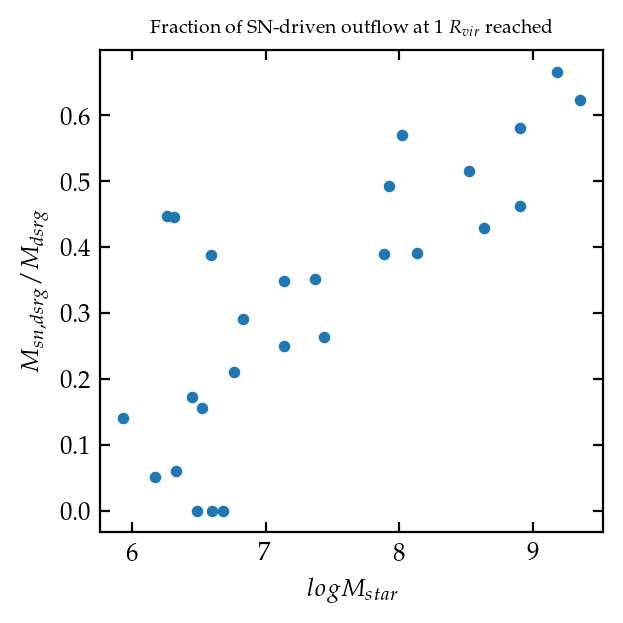

In [18]:
#plot the graph

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
xa = np.log10(output['M_star'][np.isfinite(output['frac_virtime'])])
ya = output['frac_virtime'][np.isfinite(output['frac_virtime'])]
plt.scatter(np.log10(output['M_star']), output['frac_virtime'], s = 10)
ax.set_xlabel("$log M_{star}$")
ax.set_ylabel('$M_{sn, dsrg} / M_{dsrg}$')
ax.set_title('Fraction of SN-driven outflow at 1 $R_{vir}$ reached', fontsize = 7)

#save
plt.savefig(f'plots/fracSNdsrg_Mstar2.pdf')
plt.show()

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <
Loaded: h148_10
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_12 <
Loaded: h148_12


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anac

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_2 <
Loaded: h148_2


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anac

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_249 <
Loaded: h148_249
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_251 <
Loaded: h148_251
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_27 <
Loaded: h148_27
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_282 <
Loaded: h148_282


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_5235

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_3 <
Loaded: h148_3


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anac

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_34 <
Loaded: h148_34
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_38 <
Loaded: h148_38
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_4 <
Loaded: h148_4
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_55 <
Loaded: h148_55


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anac

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_6 <
Loaded: h148_6
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_65 <
Loaded: h148_65
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_14 <
Loaded: h229_14


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_5235

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_18 <
Loaded: h229_18
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_20 <
Loaded: h229_20
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_22 <
Loaded: h229_22


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: Runtime

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_49 <
Loaded: h229_49
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_10 <
Loaded: h242_10


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_5235

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_21 <
Loaded: h242_21
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_30 <
Loaded: h242_30
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_38 <
Loaded: h242_38


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anac

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_69 <
Loaded: h242_69
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_8 <
Loaded: h242_8


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_5235

> Returning (predischarged, discharged, hot_predischarged) for satellite h329_117 <
Loaded: h329_117
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_29 <
Loaded: h329_29
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_7 <
Loaded: h329_7


/tmp/ipykernel_52351/3561716354.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_52351/3561716354.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime


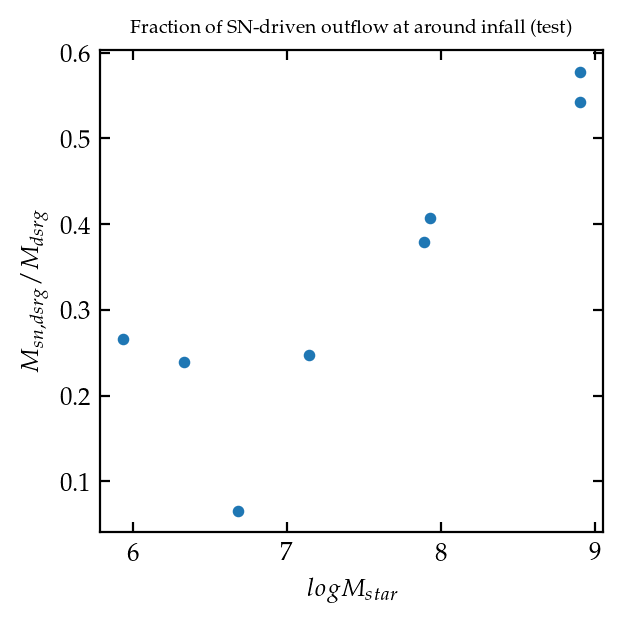

In [27]:
# fraction of gas loss 1Gyr before infall (test)
#fraction with respect to stellar mass?
output = pd.DataFrame()

for key in keys:
    
    # Skip the ones I already have
    exclude = ['h242_401']
    
    if key in exclude:
        continue
    
    # defining discharged dataset if not introduced
    sim = str(key[:4])
    haloid = int(key[5:])
    predischarged, discharged = read_one_discharged(key)
    # gas SN-heated/unheated prior to discharge.
    hot = discharged[discharged['snHeated']==True]  # heated.
    cold = discharged[discharged['snHeated']==False]  # unheated.
    
    # read tinfall, tquench, etc. time from csv file
    data = pd.read_csv('SNeData/all-satellite-information-2.csv')
    r_data = data[(data.sim==sim)&(data.haloid==haloid)]
    
    print('Loaded:', key)

    #fraction
    bins = 75
#     fig, ax = plt.subplots(1,1, dpi=200, figsize=(5.5,4.5), sharex=True,
#                            constrained_layout=False)

    y1, x = np.histogram(hot.time, bins=bins, weights=wt(hot,discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum1 = np.cumsum(y1)
    y2, x = np.histogram(cold.time, bins=bins, weights=wt(cold,discharged),
                         range=(0, 14))
    sum2 = np.cumsum(y2)
    ax.stackplot(bincenters, sum1[-1]-sum1, sum2[-1]-sum2, alpha=0.7,
                 colors=['tomato', 'royalblue'], labels=['SNheated', 'non-SNheated'])         

    y3, x = np.histogram(discharged.time, bins=bins, weights=wt(discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum3 = np.cumsum(y3)
    frac = (y1/y3)[y3>0]
    
    #show where it infalls, quenches if any, where at 1 Rvir, and where at the 1st pericentric
    f_time = float(r_data['tinfall'])
    p_time = float(r_data['1st p_time'])
    vir_time = float(r_data['t_1Rvir_from_Host'])
    q_time = float(r_data['tquench'])

    frac_ftime = np.nan
    try:
        frac_ftime = np.mean(frac[np.isclose(bincenters[y3>0], f_time, atol=0.5)])
    except:
        frac_ftime = np.nan
    
    #save frac
    r_data['frac_ftime'] = frac_ftime
    
    #upload to dataframe
    output = pd.concat([output, r_data])

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
xa = np.log10(output['M_star'][np.isfinite(output['frac_ftime']) & (output['frac_ftime']!=0)])
ya = output['frac_ftime'][np.isfinite(output['frac_ftime']) & (output['frac_ftime']!=0)]
plt.scatter(xa, ya, s = 10)
ax.set_xlabel("$log M_{star}$")
ax.set_ylabel('$M_{sn, dsrg} / M_{dsrg}$')
ax.set_title('Fraction of SN-driven outflow at around infall (test)', fontsize = 7)

plt.show()

Probably, there is no significant different at different times at infall.

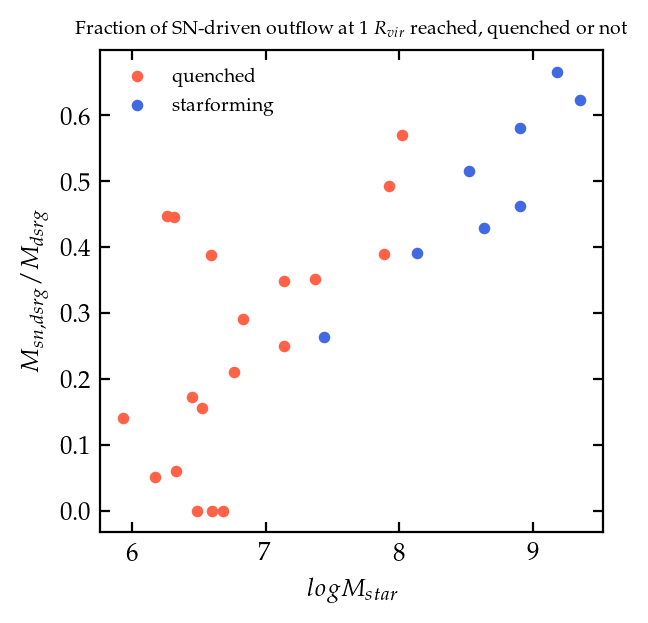

In [34]:
#quenched? or still star-formation active?
#most of quenched galaxies quench prior to reaching 1 Rvir
quenched = output[output.quenched == True]
starforming = output[output.quenched == False]

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
#scatter plot for quenched galaxy
xa = np.log10(quenched['M_star'][np.isfinite(quenched['frac_virtime'])])
ya = quenched['frac_virtime'][np.isfinite(quenched['frac_virtime'])]
plt.scatter(xa, ya, c='tomato', label='quenched', s = 10)

#scatter plot for star-forming galaxy
xb = np.log10(starforming['M_star'][np.isfinite(starforming['frac_virtime'])])
yb = starforming['frac_virtime'][np.isfinite(starforming['frac_virtime'])]
plt.scatter(xb, yb, c='royalblue', label='starforming', s = 10)

ax.set_xlabel("$log M_{star}$")
ax.set_ylabel('$M_{sn, dsrg} / M_{dsrg}$')
plt.legend(fontsize=7)
ax.set_title('Fraction of SN-driven outflow at 1 $R_{vir}$ reached, quenched or not', fontsize = 7)

#save
plt.savefig(f'plots/fracSNdsrg_Mstar3.pdf')
plt.show()

found the keys, starting with:  h148_10
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <
Loaded: h148_10
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_12 <
Loaded: h148_12


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_2 <
Loaded: h148_2


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_249 <
Loaded: h148_249
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_251 <
Loaded: h148_251


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime'] = frac_ptime
/tmp/ipykernel_72375/3248414603.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_27 <
Loaded: h148_27
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_282 <
Loaded: h148_282


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_3 <
Loaded: h148_3


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_34 <
Loaded: h148_34
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_38 <
Loaded: h148_38


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_4 <
Loaded: h148_4


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_55 <
Loaded: h148_55
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_6 <
Loaded: h148_6
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_65 <
Loaded: h148_65


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_14 <
Loaded: h229_14
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_18 <
Loaded: h229_18


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_20 <
Loaded: h229_20
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_22 <
Loaded: h229_22
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_49 <


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loaded: h229_49
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_10 <
Loaded: h242_10


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_21 <
Loaded: h242_21
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_30 <
Loaded: h242_30
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_38 <


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Loaded: h242_38
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_69 <
Loaded: h242_69


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_8 <
Loaded: h242_8


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h329_117 <
Loaded: h329_117
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_29 <
Loaded: h329_29


/tmp/ipykernel_72375/3248414603.py:46: RuntimeWarning: invalid value encountered in divide
  frac = (y1/y3)[y3>0]
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_72375/3248414603.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ftime'] = frac_ftime
/tmp/ipykernel_72375/3248414603.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

> Returning (predischarged, discharged, hot_predischarged) for satellite h329_7 <
Loaded: h329_7


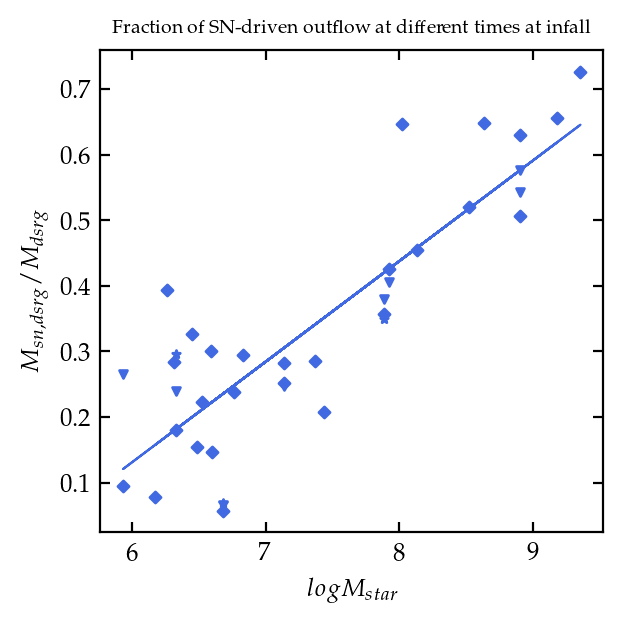

In [8]:
# fraction of gas loss at different points at infall
#fraction with respect to stellar mass
output = pd.DataFrame()
keys = get_keys()

for key in keys:
    
    # Skip the ones I already have
    exclude = ['h242_401']
    
    if key in exclude:
        continue
    
    # defining discharged dataset if not introduced
    sim = str(key[:4])
    haloid = int(key[5:])
    predischarged, discharged = read_one_discharged(key)
    # gas SN-heated/unheated prior to discharge.
    hot = discharged[discharged['snHeated']==True]  # heated.
    cold = discharged[discharged['snHeated']==False]  # unheated.
    
    # read tinfall, tquench, etc. time from csv file
    data = pd.read_csv('SNeData/all-satellite-information-2.csv')
    r_data = data[(data.sim==sim)&(data.haloid==haloid)]
    
    print('Loaded:', key)

    #fraction
    bins = 75
    fig, ax = plt.subplots(1,1, dpi=200, figsize=(5.5,4.5), sharex=True,
                           constrained_layout=False)
    y1, x = np.histogram(hot.time, bins=bins, weights=wt(hot,discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum1 = np.cumsum(y1)
    y2, x = np.histogram(cold.time, bins=bins, weights=wt(cold,discharged),
                         range=(0, 14))
    sum2 = np.cumsum(y2)
    ax.stackplot(bincenters, sum1[-1]-sum1, sum2[-1]-sum2, alpha=0.7,
                 colors=['tomato', 'royalblue'], labels=['SNheated', 'non-SNheated'])         

    y3, x = np.histogram(discharged.time, bins=bins, weights=wt(discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum3 = np.cumsum(y3)
    frac = (y1/y3)[y3>0]
    
    #show where it infalls, quenches if any, where at 1 Rvir, and where at the 1st pericentric
    f_time = float(r_data['tinfall'])
    p_time = float(r_data['1st p_time'])
    vir_time = float(r_data['t_1Rvir_from_Host'])
    q_time = float(r_data['tquench'])

    #finding fractions when at starting infall, at 1st pericentric, and at quenched
    frac_ftime = np.nan
    try:
        frac_ftime = np.mean(frac[np.isclose(bincenters[y3>0], f_time, atol=0.5)])
    except:
        frac_ftime = np.nan
    frac_ptime = np.nan
    try:
        frac_ptime = np.mean(frac[np.isclose(bincenters[y3>0], p_time, atol=0.5)])
    except:
        frac_ptime = np.nan
    frac_qtime = np.nan
    try:
        frac_qtime = np.mean(frac[np.isclose(bincenters[y3>0], q_time, atol=0.5)])
    except:
        frac_qtime = np.nan
    
    #save frac
    r_data['frac_ftime'] = frac_ftime
    r_data['frac_ptime'] = frac_ptime
    r_data['frac_qtime'] = frac_qtime
    
    #upload to dataframe
    output = pd.concat([output, r_data])
    plt.close(fig)

#linear line alignment
from scipy.optimize import curve_fit
def func(x,s,y0):
    return y0+s*x
# the initial guess for the function parameters:
s_guess = [1]
y_guess = [3]

t_parameter = np.array(['frac_ftime', 'frac_ptime', 'frac_qtime']) #different times
m_parameter = np.array(['v', 'D', '*'])

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
x_arr,y_arr = np.array([]),np.array([])
for time, marker in zip(t_parameter, m_parameter):
    #plot different gas frac at the same timestep
    xa = np.log10(output['M_star'][np.isfinite(output[time]) & (output[time]!=0)])
    ya = output[time][np.isfinite(output[time]) & (output[time]!=0)]
    a = ax.scatter(xa,ya, c = 'royalblue', marker = marker, s = 8)

    x_arr = np.append(x_arr, xa)
    y_arr = np.append(y_arr, ya)
    
popt, pcov = curve_fit(func, x_arr, y_arr, p0=[s_guess,y_guess])
plt.plot(np.log10(output['M_star']), func(np.log10(output['M_star']), *popt), c = 'royalblue', lw = 0.8, label = 'discharged')
ax.set_xlabel("$log M_{star}$")
ax.set_ylabel('$M_{sn, dsrg} / M_{dsrg}$')
ax.set_title('Fraction of SN-driven outflow at different times at infall', fontsize = 7)
plt.savefig(f'plots/S24_FracGasLoss_All.pdf')

plt.show()

## Permanent Gas Loss for small galaxies

Another founding was that the ratio of expelled gas over all discharged gas ($M_{expelled}/M_{discharged}$) is higher in lower mass galaxies than massive galaxies. I will investigate this further more through the same approach here.

In [26]:
# fraction of gas loss at 1st pericenter reached
#fraction with respect to stellar mass
output = pd.DataFrame()

for key in keys:
    
    # Skip the ones I already have
    exclude = ['h242_401']
    
    if key in exclude:
        continue
    
    # defining discharged dataset if not introduced
    sim = str(key[:4])
    haloid = int(key[5:])
    # load discharged gas particles
    predischarged, discharged = read_one_discharged(key)
    # gas SN-heated/unheated prior to discharge.
    hot_dsg = discharged[discharged['snHeated']==True]  # heated.
    cold_dsg = discharged[discharged['snHeated']==False]  # unheated.
    # load expelled gas particles
    preexpelled, expelled = read_one_expelled(key)
    # gas SN-heated/unheated prior to expelled.
    hot_exp = expelled[expelled['snHeated']==True]  # heated.
    cold_exp = expelled[expelled['snHeated']==False]  # unheated.
    
    # read tinfall, tquench, etc. time from csv file
    data = pd.read_csv('SNeData/all-satellite-information-2.csv')
    r_data = data[(data.sim==sim)&(data.haloid==haloid)]
    
    print('Loaded:', key)

    #fraction
    bins = 75
#     fig, ax = plt.subplots(1,1, dpi=200, figsize=(5.5,4.5), sharex=True,
#                            constrained_layout=False)

#     y1, x = np.histogram(hot.time, bins=bins, weights=wt(hot,discharged),
#                          range=(0, 14))
#     bincenters = 0.5*(x[1:] + x[:-1])
#     sum1 = np.cumsum(y1)
#     y2, x = np.histogram(cold.time, bins=bins, weights=wt(cold,discharged),
#                          range=(0, 14))
#     sum2 = np.cumsum(y2)
# #     ax.stackplot(bincenters, sum1[-1]-sum1, sum2[-1]-sum2, alpha=0.7,
# #                  colors=['tomato', 'royalblue'], labels=['SNheated', 'non-SNheated'])         
    #frac exp/dsg
    y1, x = np.histogram(expelled.time, bins=bins, weights=expelled.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])

    y2, x = np.histogram(discharged.time, bins=bins, weights=discharged.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    frac1 = (y1/y2)[y2>0]
    
    #frac hot_exp/hot_dsg
    y3, x = np.histogram(hot_exp.time, bins=bins, weights=hot_exp.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])

    y4, x = np.histogram(hot_dsg.time, bins=bins, weights=hot_dsg.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    frac2 = (y3/y4)[y4>0]
    
    #frac cold_exp/cold_dsg
    y5, x = np.histogram(cold_exp.time, bins=bins, weights=cold_exp.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])

    y6, x = np.histogram(cold_dsg.time, bins=bins, weights=cold_dsg.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    frac3 = (y5/y6)[y6>0]
    
    #show where it infalls, quenches if any, where at 1 Rvir, and where at the 1st pericentric
    f_time = float(r_data['tinfall'])
    p_time = float(r_data['1st p_time'])
    vir_time = float(r_data['t_1Rvir_from_Host'])
    q_time = float(r_data['tquench'])

    #fraction when at 1st pericenter
    frac_ptime1 = np.nan #frac exp/dsg
    frac_ptime2 = np.nan #frac hot_exp/hot_dsg
    frac_ptime3 = np.nan #frac cold_exp/cold_dsg
    
    try:
        frac_ptime1 = frac1[np.where(bincenters[y2>0] > p_time)[0][0]]
    except:
        frac_ptime1 = np.nan
    try:
        frac_ptime2 = frac2[np.where(bincenters[y4>0] > p_time)[0][0]]
    except:
        frac_ptime2 = np.nan
    try:
        frac_ptime3 = frac3[np.where(bincenters[y6>0] > p_time)[0][0]]
    except:
        frac_ptime3 = np.nan
    
    #save frac
    r_data['frac_ptime_all'] = frac_ptime1
    r_data['frac_ptime_hot'] = frac_ptime2
    r_data['frac_ptime_cold'] = frac_ptime3
    print(key, p_time, frac_ptime1, frac_ptime2, frac_ptime3)
    
    #upload to dataframe
    output = pd.concat([output, r_data])

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <
Loaded: h148_10
h148_10 9.060013312533592 0.20682033917995502 0.23609287717961688 0.1643504886533256


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_12 <
Loaded: h148_12
h148_12 8.608830726788982 0.7464605112826262 0.7618744638646531 0.7174550720832108
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_2 <
Loaded: h148_2
h148_2 13.800797497085432 nan nan nan
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_249 <
Loaded: h148_249
h148_249 9.490993692946342 1.0 1.0 1.0


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_251 <
Loaded: h148_251
h148_251 7.336091790882829 1.0 1.0 1.0


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_27 <
Loaded: h148_27
h148_27 7.039792779348961 0.5245405730531839 0.5600613891723382 0.49431585688744006
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_282 <


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

Loaded: h148_282
h148_282 4.750209508400876 0.9801512716586988 0.9751477327984832 0.982236762339702
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_3 <
Loaded: h148_3
h148_3 10.35295445377185 0.20600554556032616 0.22366329132982624 0.16633644273888137
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_34 <
Loaded: h148_34
h148_34 9.921974073359095 0.6820548132987061 0.6887727479892763 0.6786900952749668


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_38 <
Loaded: h148_38
h148_38 8.198052551708967 0.6261792116302511 0.6630664222379018 0.6029552362733382


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_4 <
Loaded: h148_4
h148_4 12.93883673625992 0.3484324859433364 0.36732041064264537 0.31543022128101755


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_55 <
Loaded: h148_55
h148_55 9.060013312533592 0.8388929054242944 0.8280480840346409 0.8428835323853842
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_6 <
Loaded: h148_6
h148_6 12.507856355847158 0.23580939510123466 0.25368037312237374 0.21188628783694968
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_65 <


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

Loaded: h148_65
h148_65 7.039792779348961 1.0 nan 1.0
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_14 <
Loaded: h229_14
h229_14 9.383248597782789 0.539163592017615 0.5909921223005569 0.517861879236762


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_18 <
Loaded: h229_18
h229_18 5.181189888758382 0.49468709162391783 0.5483342131998524 0.4649750310950547
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_20 <
Loaded: h229_20
h229_20 8.413542741855249 0.7456618464500595 0.9622826046512482 0.717655078754442


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h229_22 <
Loaded: h229_22
h229_22 8.0903074565453 0.9142727414625834 0.9200194296666331 0.9133083331279634
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_49 <
Loaded: h229_49
h229_49 9.706483883092371 0.8793436874779914 0.9030153721362764 0.8705964762861271


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_10 <
Loaded: h242_10
h242_10 6.150895744842153 0.4566261302899752 0.47515472183563945 0.41482166228628387
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_21 <
Loaded: h242_21
h242_21 6.150895744842153 0.111825676999018 0.17585655584355422 0.08963246311089189


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_30 <
Loaded: h242_30
h242_30 5.504425174222988 0.8072604580944129 0.8298470883628895 0.7929156743129117
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_38 <
Loaded: h242_38
h242_38 12.292366165723918 1.0 1.0 1.0


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_69 <
Loaded: h242_69
h242_69 9.70648388324738 0.4064929035684438 0.46117433600572993 0.3879774756847022


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

> Returning (predischarged, discharged, hot_predischarged) for satellite h242_8 <
Loaded: h242_8
h242_8 6.150895744842153 0.23719379809395502 0.2575953119028442 0.2119131400566143
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_117 <
Loaded: h329_117
h329_117 4.975800801418971 1.0 nan 1.0
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_29 <


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

Loaded: h329_29
h329_29 9.060013312693757 1.0 nan 1.0
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_7 <
Loaded: h329_7
h329_7 13.800797497330509 nan nan nan


/tmp/ipykernel_41723/871433100.py:55: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/871433100.py:65: RuntimeWarning: invalid value encountered in divide
  frac2 = (y3/y4)[y4>0]
/tmp/ipykernel_41723/871433100.py:75: RuntimeWarning: invalid value encountered in divide
  frac3 = (y5/y6)[y6>0]
/tmp/ipykernel_41723/871433100.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_ptime_all'] = frac_ptime1
/tmp/ipykernel_41723/871433100.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

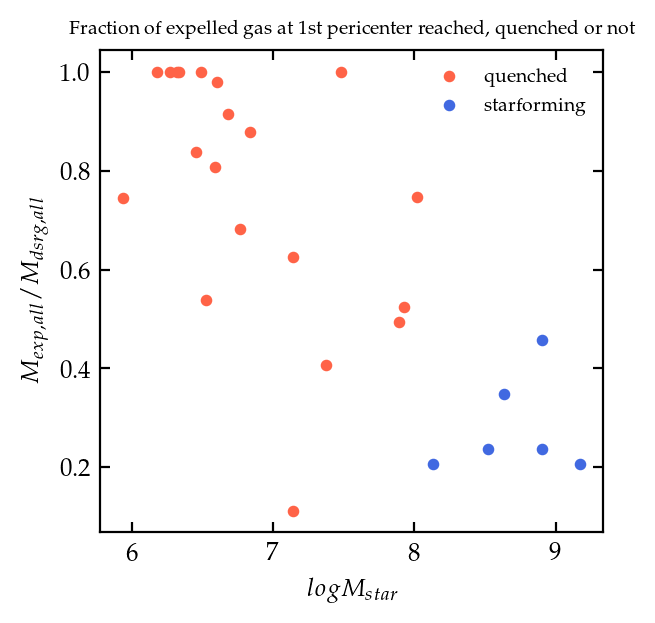

In [28]:
#quenched? or still star-formation active?
#most of quenched galaxies quench prior to reaching 1st pericenter
quenched = output[output.quenched == True]
starforming = output[output.quenched == False]

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
#scatter plot for quenched galaxy
xa = np.log10(quenched['M_star'][np.isfinite(quenched['frac_ptime_all'])])
ya = quenched['frac_ptime_all'][np.isfinite(quenched['frac_ptime_all'])]
plt.scatter(xa, ya, c='tomato', label='quenched', s = 10)

#scatter plot for star-forming galaxy
xb = np.log10(starforming['M_star'][np.isfinite(starforming['frac_ptime_all'])])
yb = starforming['frac_ptime_all'][np.isfinite(starforming['frac_ptime_all'])]
plt.scatter(xb, yb, c='royalblue', label='starforming', s = 10)

ax.set_xlabel("$log M_{star}$")
ax.set_ylabel('$M_{exp, all} / M_{dsrg, all}$')
plt.legend(fontsize=7)
ax.set_title('Fraction of expelled gas at 1st pericenter reached, quenched or not', fontsize = 7)

#save
plt.savefig(f'plots/fracSNdsrg_Mstar5.pdf')
plt.show()

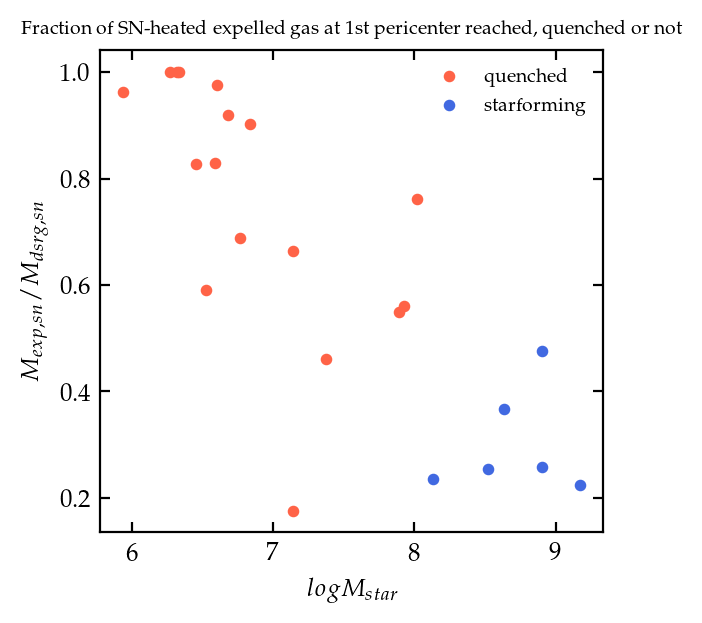

In [29]:
#now for hot and cold

#quenched? or still star-formation active?
#most of quenched galaxies quench prior to reaching 1st pericenter
quenched = output[output.quenched == True]
starforming = output[output.quenched == False]

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
#scatter plot for quenched galaxy
xa = np.log10(quenched['M_star'][np.isfinite(quenched['frac_ptime_hot'])])
ya = quenched['frac_ptime_hot'][np.isfinite(quenched['frac_ptime_hot'])]
plt.scatter(xa, ya, c='tomato', label='quenched', s = 10)

#scatter plot for star-forming galaxy
xb = np.log10(starforming['M_star'][np.isfinite(starforming['frac_ptime_hot'])])
yb = starforming['frac_ptime_hot'][np.isfinite(starforming['frac_ptime_hot'])]
plt.scatter(xb, yb, c='royalblue', label='starforming', s = 10)

ax.set_xlabel("$log M_{star}$")
ax.set_ylabel('$M_{exp, sn} / M_{dsrg, sn}$')
plt.legend(fontsize=7)
ax.set_title('Fraction of SN-heated expelled gas at 1st pericenter reached, quenched or not', fontsize = 7)

#save
plt.savefig(f'plots/fracSNdsrg_Mstar6.pdf')
plt.show()

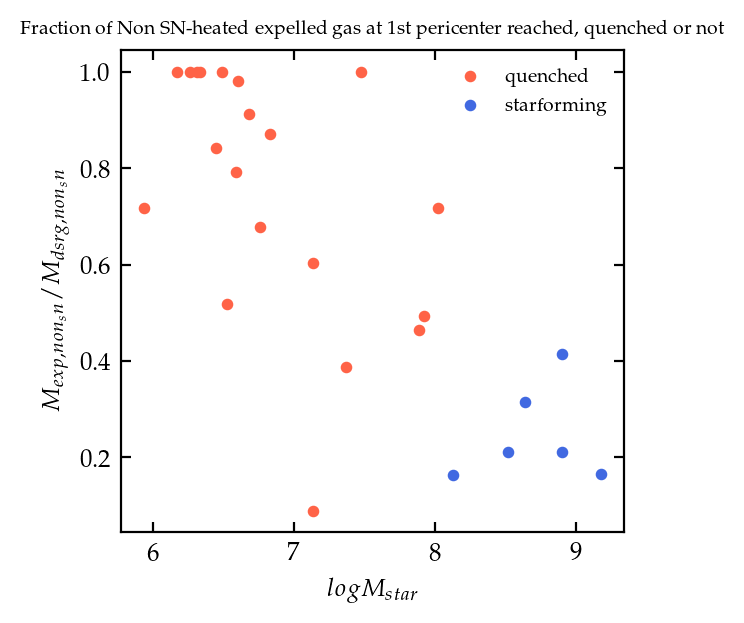

In [30]:
#quenched? or still star-formation active?
#most of quenched galaxies quench prior to reaching 1st pericenter
quenched = output[output.quenched == True]
starforming = output[output.quenched == False]

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
#scatter plot for quenched galaxy
xa = np.log10(quenched['M_star'][np.isfinite(quenched['frac_ptime_cold'])])
ya = quenched['frac_ptime_cold'][np.isfinite(quenched['frac_ptime_cold'])]
plt.scatter(xa, ya, c='tomato', label='quenched', s = 10)

#scatter plot for star-forming galaxy
xb = np.log10(starforming['M_star'][np.isfinite(starforming['frac_ptime_cold'])])
yb = starforming['frac_ptime_cold'][np.isfinite(starforming['frac_ptime_cold'])]
plt.scatter(xb, yb, c='royalblue', label='starforming', s = 10)

ax.set_xlabel("$log M_{star}$")
ax.set_ylabel('$M_{exp, non_sn} / M_{dsrg, non_sn}$')
plt.legend(fontsize=7)
ax.set_title('Fraction of Non SN-heated expelled gas at 1st pericenter reached, quenched or not', fontsize = 7)

#save
plt.savefig(f'plots/fracSNdsrg_Mstar7.pdf')
plt.show()

As expected, lower mass galaxies are likely to permanently lose their gas. This could indicate the stronger effect of ram pressure stripping, but this also might be due to smaller sample sizes since smaller galaxies tend to quench earlier and therefore a fewer gas particles leaving outside at the time of infall.

There is no significant different between SN-heated gas outflow and not. Thus, based on the limited sample sizes, this founding was not as much significant as we expected.

Lastly, check when at 1 $R_{vir}$ reached

In [34]:
# fraction of gas loss at 1st pericenter reached
#fraction with respect to stellar mass
output = pd.DataFrame()

for key in keys:
    
    # Skip the ones I already have
    exclude = ['h242_401']
    
    if key in exclude:
        continue
    
    # defining discharged dataset if not introduced
    sim = str(key[:4])
    haloid = int(key[5:])
    # load discharged gas particles
    predischarged, discharged = read_one_discharged(key)
    # load expelled gas particles
    preexpelled, expelled = read_one_expelled(key)
    
    # read tinfall, tquench, etc. time from csv file
    data = pd.read_csv('SNeData/all-satellite-information-2.csv')
    r_data = data[(data.sim==sim)&(data.haloid==haloid)]
    
    print('Loaded:', key)

    #fraction
    bins = 75
     
    #frac exp/dsg
    y1, x = np.histogram(expelled.time, bins=bins, 
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    print(y1)
    y1, x = np.histogram(expelled.time, bins=bins, weights=expelled.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])

    y2, x = np.histogram(discharged.time, bins=bins, weights=discharged.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    frac1 = (y1/y2)[y2>0]
    
    #show where it infalls, quenches if any, where at 1 Rvir, and where at the 1st pericentric
    f_time = float(r_data['tinfall'])
    p_time = float(r_data['1st p_time'])
    vir_time = float(r_data['t_1Rvir_from_Host'])
    q_time = float(r_data['tquench'])

    #fraction when at 1st pericenter
    frac_virtime1 = np.nan #frac exp/dsg
    
    try:
        frac_virtime1 = frac1[np.where(bincenters[y2>0] > vir_time)[0][0]]
    except:
        frac_virtime1 = np.nan
    
    #save frac
    r_data['frac_virtime'] = frac_virtime1
    print(key, p_time, frac_virtime1)
    
    #upload to dataframe
    output = pd.concat([output, r_data])

> Returning (predischarged, discharged, hot_predischarged) for satellite h148_10 <
Loaded: h148_10
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
    33     7     0    35     0    87     0  1308     0     0  1075     0
  1250     0  1568     0     0  2166     0  1971     0  1840     0     0
  1664     0  1262     0  1427   620     0  2083     0  3787     0  5563
     0 12111     0]
h148_10 9.060013312533592 0.19738900196069203
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_12 <
Loaded: h148_12
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  223    0  444
    0  824    0    0 1133    0  592    0  271    0    0  167    0  230
    0  213    

/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_2 <
Loaded: h148_2
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0  3065     0  4889     0     0
  7954     0  6561     0  9301  4082     0 20248     0 23367     0 28024
     0 57047     0]
h148_2 13.800797497085432 0.23230521882890537
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_249 <
Loaded: h148_249
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  36 113   0 272   0 362   0 584   0   0 410   0 465   0 874   0   0 822
   0  55   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  

/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


Loaded: h148_251
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  221    0    0  225    0  234  244    0  429    0 1930
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
h148_251 7.336091790882829 0.4830073985812181
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_27 <


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


Loaded: h148_27
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 1286
    0    0    0 1344    0    0 2913    0 2393  625    0 2914    0 3561
    0 2528    0    0 1501    0  843    0  799    0    0  535    0  382
    0  799    0    0 1302    0 1026    0 1758 1915    0 1026    0 1113
    0  259    0  229    0]
h148_27 7.039792779348961 0.41713914621571063
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_282 <
Loaded: h148_282
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  732    0 1180    0    0 1096    0  630
    0    0    0  141    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
h148_282 4.750209508400876 1.0


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_3 <
Loaded: h148_3
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0  2316     0     0  2777     0
  4946     0  3963     0     0  4971     0  6236     0  7276     0     0
  4849     0  3922     0  4347  2208     0  8237     0 13987     0 19112
     0 28312     0]
h148_3 10.35295445377185 0.14286845948267274
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_34 <
Loaded: h148_34
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  327    0    0  497    0  418    0  370    0    0 1386    0 1149
    0  291    0  

/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_38 <
Loaded: h148_38
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  463    0  506   48    0  456    0  718
    0  873    0    0 1641    0   34    0  245    0    0  446    0  279
    0  227    0    0  123    0   98    0    0   15    0   75    0   20
    0    0    0    0    0]
h148_38 8.198052551708967 0.4858518616354446


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


> Returning (predischarged, discharged, hot_predischarged) for satellite h148_4 <
Loaded: h148_4
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0 1518    0 1231    0    0 1683    0 2369
    0 2413    0    0 1728    0 1801    0 1908  880    0 2497    0 4159
    0 5598    0 9345    0]
h148_4 12.93883673625992 0.14441634214243865
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_55 <


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


Loaded: h148_55
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  203    0  327
    0  375    0    0  455    0 1261    0 2288    0    0 1362    0  283
    0   63    0    0  445    0  147    0   15  160    0  466    0   24
    0   96    0  118    0]
h148_55 9.060013312533592 0.5207948650171123
> Returning (predischarged, discharged, hot_predischarged) for satellite h148_6 <
Loaded: h148_6
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0  2069     0  1784     0  1701     0     0
  1141     0  1432     0  2043   780     0  2411     0  4160     0  5490
     0 11517     0]
h1

/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


Loaded: h148_65
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  804
    0    0    0 1532    0    0 1325    0  211   68    0  287    0  265
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
h148_65 7.039792779348961 nan
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_14 <
Loaded: h229_14
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 129  83 334   0 229   0 242   0 270 397   0 334   0 393 346   0 250
   0 322   0 384 186   0  55   0 219   0 106 282   0 149   0 120   0 111
  40   0   0]
h229_14 9.383248597782789 0.405136763985523
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_18 <


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


Loaded: h229_18
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 1425    0 1723  660    0  537    0  365  406  176  364    0  745
    0  499    0  438 1533    0  318    0  166  191    0   46    0    5
    0   67   11    0  116    0  168    0   72   55    0   54    0    0
    0    0    0    0    0]
h229_18 5.181189888758382 0.4799112086862542
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_20 <
Loaded: h229_20
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  61   0
 178 147  58 117   0 133   0  89   0 176 237   0 192   0 106  23   0  23
   0  14   0   0   2   0  13   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
h229_20 8.413542741855249 0.47023644905435386
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_22 <


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


Loaded: h229_22
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 146   0  82  44   0 107   0
  68  81  37 141   0 100   0 162   0 174 123   0  13   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
h229_22 8.0903074565453 0.5206137267487019
> Returning (predischarged, discharged, hot_predischarged) for satellite h229_49 <
Loaded: h229_49
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 171   0 225   0 227   0 167  75   0 280   0 231 116   0 413
   0  49   0 139   0   0   0   0   1   0   0   0   0   0   0   0   0   0
   0   0   0]
h229_49 9.706483883092371 0.4183238659670454


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


> Returning (predischarged, discharged, hot_predischarged) for satellite h242_10 <
Loaded: h242_10
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
 15270     0 12403  7987     0  9767     0 10674  8569     0 10139     0
  6501  3542  2148  3364     0  2198     0  2748     0  2911  2936     0
  2134     0  2154  1883     0  1519     0  2319     0  4173  2039     0
  2636     0  1915     0  2067  2631     0  1315     0  1310     0  2512
  3232  4857     0]
h242_10 6.150895744842153 0.3705690263409434
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_21 <
Loaded: h242_21
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 420   0 712 210   0  13   0
 153 103  73 305   0 456   0 472   0 522 413   0 323   0 265 287   0 256
   0 192   0 256 111   0  61   0   1   0 127   0   0   0   0   0   0   0
   0   

/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


Loaded: h242_30
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 346 351   0 440   0 613 534   0  92   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
h242_30 5.504425174222988 0.8072604580944129
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_38 <
Loaded: h242_38
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  93   0 174  66   0  85   0  82   0  91 155   0 165   0   0   0   0
   0   0   0]
h242_38 12.292366165723918 0.7086314133658308
> Returning (predischarged, discharged, hot_predischarged) for satellite h242_69 <


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


Loaded: h242_69
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 396   0 339   0 474   0  94 347   0 640   0 481 478   0 599
   0 376   0 119  42   0 252   0 165   0 274 121   0 225   0 254   0 705
 362   0   0]
h242_69 9.70648388324738 0.47521481763999435


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


> Returning (predischarged, discharged, hot_predischarged) for satellite h242_8 <
Loaded: h242_8
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 4407    0 6265 3605
    0 8178    0 7800 5242    0 4715    0 5298 2709 1093 3746    0 3916
    0 1920    0 3093 3115    0 2265    0 1813 2740    0 1706    0 2094
    0 2958 1410    0 2532    0 2189    0 1042 3023    0 2298    0 4132
    0 5897 6457 7700    0]
h242_8 6.150895744842153 0.26508612161351974
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_117 <
Loaded: h329_117
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 213   0 173   0 491 409   0  22   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
h329_117 4.975800801418971 1.0
> Returning (predischarged, discharged

/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1
/tmp/ipykernel_41723/3659768565.py

Loaded: h329_29
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 157   0 431   0  73 297   0 587   0 123  14   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
h329_29 9.060013312693757 0.46739719908970406
> Returning (predischarged, discharged, hot_predischarged) for satellite h329_7 <
Loaded: h329_7
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 441   0 900 884   0 844   0 641   0 580
 421 521   0]
h329_7 13.800797497330509 0.46929886606336896


/tmp/ipykernel_41723/3659768565.py:42: RuntimeWarning: invalid value encountered in divide
  frac1 = (y1/y2)[y2>0]
/tmp/ipykernel_41723/3659768565.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data['frac_virtime'] = frac_virtime1


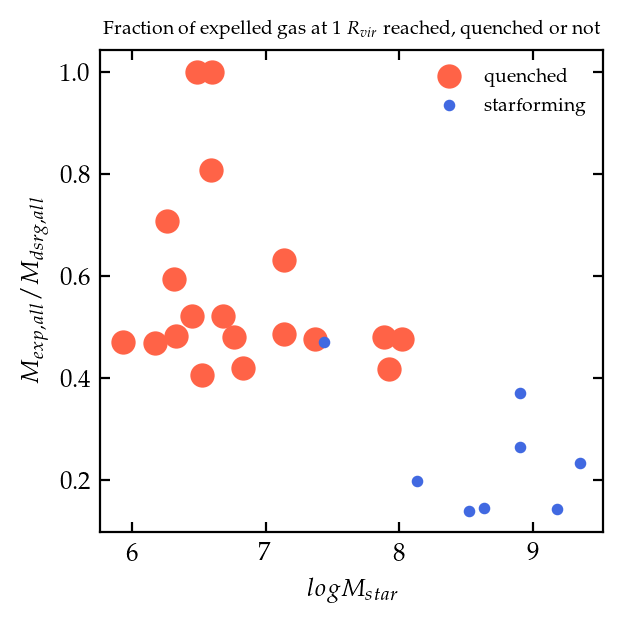

In [38]:
#quenched? or still star-formation active?
#most of quenched galaxies quench prior to reaching 1st pericenter
quenched = output[output.quenched == True]
starforming = output[output.quenched == False]

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
#scatter plot for quenched galaxy
xa = np.log10(quenched['M_star'][np.isfinite(quenched['frac_virtime'])])
ya = quenched['frac_virtime'][np.isfinite(quenched['frac_virtime'])]
plt.scatter(xa, ya, c='tomato', label='quenched', s = 60)

#scatter plot for star-forming galaxy
xb = np.log10(starforming['M_star'][np.isfinite(starforming['frac_virtime'])])
yb = starforming['frac_virtime'][np.isfinite(starforming['frac_virtime'])]
plt.scatter(xb, yb, c='royalblue', label='starforming', s = 10)

ax.set_xlabel("$log M_{star}$")
ax.set_ylabel('$M_{exp, all} / M_{dsrg, all}$')
plt.legend(fontsize=7)
ax.set_title('Fraction of expelled gas at 1 $R_{vir}$ reached, quenched or not', fontsize = 7)

#save
#plt.savefig(f'plots/fracSNdsrg_Mstar8.pdf')
plt.show()

So this result is mostly the same as the ones above except we can see one interesting star-forming galaxy that is in the middle of other quenched groups.

In [ ]:
#Plot fraction of gas loss, at different points at infall
#fraction with respect to stellar mass
output = pd.DataFrame()
keys = get_keys()

for key in keys:
    
    # Skip the ones I already have
    exclude = ['h242_401']
    
    if key in exclude:
        continue
    
    # defining discharged dataset if not introduced
    sim = str(key[:4])
    haloid = int(key[5:])
    # load discharged gas particles
    predischarged, discharged = read_one_discharged(key)
    # load expelled gas particles
    preexpelled, expelled = read_one_expelled(key)
    
    # read tinfall, tquench, etc. time from csv file
    data = pd.read_csv('SNeData/all-satellite-information-2.csv')
    r_data = data[(data.sim==sim)&(data.haloid==haloid)]
    
    print('Loaded:', key)

    #fraction
    bins = 75
     
    #frac exp/dsg
    y1, x = np.histogram(expelled.time, bins=bins, weights=expelled.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])

    y2, x = np.histogram(discharged.time, bins=bins, weights=discharged.mass,
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    frac1 = (y1/y2)[y2>0]
    
    #show where it infalls, quenches if any, where at 1 Rvir, and where at the 1st pericentric
    f_time = float(r_data['tinfall'])
    p_time = float(r_data['1st p_time'])
    vir_time = float(r_data['t_1Rvir_from_Host'])
    q_time = float(r_data['tquench'])

    #fraction when at 1st pericenter
    frac_virtime1 = np.nan #frac exp/dsg
    
    try:
        frac_virtime1 = frac1[np.where(bincenters[y2>0] > vir_time)[0][0]]
    except:
        frac_virtime1 = np.nan
    
    #save frac
    r_data['frac_virtime'] = frac_virtime1
    print(key, p_time, frac_virtime1)
    
    #upload to dataframe
    output = pd.concat([output, r_data])

### Warning: I really don't remember why I put this function

In [ ]:
def calc_avg_fracSN(key, save=True):
    import os
    output = pd.DataFrame()
    
    #load satellite information
    data = pd.read_csv(f'{rootPath}SNe-heated_Gas_Flow/SNeData/all-satellite-information-2.csv')
    sim = str(key[:4])
    haloid = int(key[5:])
    data_local = data[(data.sim==sim)&(data.haloid==haloid)]
    output = pd.concat([output, data_local])
    
    ### Recalculating fracSN ###
    #fraction of discharged/heated
    bins = 75
    rangeMax = 14
    
    # all snheated gas, binned
    filepath = f'{rootPath}SNe-heated_Gas_Flow/SNeData/heated_all_particles.hdf5'
    heated_all = pd.read_hdf(filepath,key=key)
    # bin
    snt, x = np.histogram(heated_all.time, bins=bins, weights=heated_all.mass, range=(0,rangeMax))
    
    # discharged sn-heated gas, binned
    _, discharged = read_one_discharged(key)
    heated_dis = discharged[discharged['snHeated']==True].drop_duplicates(subset=['pid', 'time'])
    # bin
    dist, x = np.histogram(heated_dis.time, bins=bins, range=(0,rangeMax))

    # expelled sn-heated gas, binned
    _, expelled = read_one_expelled(key)
    heated_exp = expelled[expelled['snHeated']==True].drop_duplicates(subset=['pid', 'time'])
    # bin
    expt, x = np.histogram(heated_exp.time, bins=bins, range=(0,rangeMax))
    
    y1, x = np.histogram(hot.time, bins=bins, weights=wt(hot,discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum1 = np.cumsum(y1)
    y2, x = np.histogram(cold.time, bins=bins, weights=wt(cold,discharged),
                         range=(0, 14))
    sum2 = np.cumsum(y2)
    ax.stackplot(bincenters, sum1[-1]-sum1, sum2[-1]-sum2, alpha=0.7,
                 colors=['tomato', 'royalblue'], labels=['SNheated', 'non-SNheated'])         

    y3, x = np.histogram(discharged.time, bins=bins, weights=wt(discharged),
                         range=(0, 14))
    bincenters = 0.5*(x[1:] + x[:-1])
    sum3 = np.cumsum(y3)
    frac = (y1/y3)[y3>0]
    
    bins = 30
    rangeMax = 14
    
    # all snheated gas, binned
    filepath = f'{rootPath}SNe-heated_Gas_Flow/SNeData/heated_all_particles.hdf5'
    heated_all = pd.read_hdf(filepath,key=key)
    #bin
    snt, x = np.histogram(heated_all.time, bins=bins, range=(0,rangeMax))
    
    

    #computing fraction dist/snt
    fracDis = np.array([])
    fracExp = np.array([])

    for i in range(0, bins):
        ratioDis = dist[i]/snt[i]
        ratioExp = expt[i]/snt[i]
        fracDis = np.append(fracDis,ratioDis)
        fracExp = np.append(fracExp,ratioExp)
        i += 1
        
    #time array
    bincenters = 0.5*(x[1:] + x[:-1])
    ### Recalculation end here ###
    
    
    if ~np.isnan(float(data_local.t_1Rvir_from_Host)):
        #time at infalling into 1 Rvir from host
        tRvir = float(data_local['t_1Rvir_from_Host'])
        
        #calculate avg fracSN before and after tRvir 
        """
        Reason to cut the last 1 Gyr is because there is a significant increase in fracExp for all satellites.
        To avoid being confused about averaging before and after the last 1 Gyr increase, 
        here intentionally cut the last 1 Gyr when calculating post tRvir. (discussed on 7/27/23)
        """
        fracDis_Rvir_after = fracDis[np.where((bincenters > tRvir)&(bincenters < 13))[0]]        
        fracDis_Rvir_before = fracDis[np.where(bincenters < tRvir)[0]]
        #remove NaN of infinite if any
        fracDis_Rvir_after = fracDis_Rvir_after[np.isfinite(fracDis_Rvir_after)]
        fracDis_Rvir_before = fracDis_Rvir_before[np.isfinite(fracDis_Rvir_before)]
        
        fracExp_Rvir_after = fracExp[np.where((bincenters > tRvir)&(bincenters < 13))[0]]        
        fracExp_Rvir_before = fracExp[np.where(bincenters < tRvir)[0]]
        #remove NaN of infinite if any
        fracExp_Rvir_after = fracExp_Rvir_after[np.isfinite(fracExp_Rvir_after)]
        fracExp_Rvir_before = fracExp_Rvir_before[np.isfinite(fracExp_Rvir_before)]
        
        #append avg values
        output['fracDis_Rvir_after'] = np.mean(fracDis_Rvir_after)
        output['fracDis_Rvir_before'] = np.mean(fracDis_Rvir_before)
        output['fracExp_Rvir_after'] = np.mean(fracExp_Rvir_after)
        output['fracExp_Rvir_before'] = np.mean(fracExp_Rvir_before)
      
    else:
        print(f'Couldnt find t_1Rvir_from_Host value for {key}')
        output['fracDis_Rvir_after'] = np.nan
        output['fracDis_Rvir_before'] = np.nan
        output['fracExp_Rvir_after'] = np.nan
        output['fracExp_Rvir_before'] = np.nan
    
    
    if ~np.isnan(float(data_local['1st p_time'])):
        tpericenter = float(data_local['1st p_time'])
        #calculate avg fracSN around 1st pericentric passage (within 1 Gyr)
        fracDis_pericenter = fracDis[np.where(np.isclose(bincenters, tpericenter, atol = 0.5))[0]]        
        fracExp_pericenter = fracExp[np.where(np.isclose(bincenters, tpericenter, atol = 0.5))[0]]
        #remove NaN of infinite if any
        fracDis_pericenter = fracDis_pericenter[np.isfinite(fracDis_pericenter)]
        fracExp_pericenter = fracExp_pericenter[np.isfinite(fracExp_pericenter)]
        
        #append avg values
        output['fracDis_pericenter'] = np.mean(fracDis_pericenter)
        output['fracExp_pericenter'] = np.mean(fracExp_pericenter)

    else:
        print(f'Couldnt find 1st p_time for {key}')
        output['fracDis_pericenter'] = np.nan
        output['fracExp_pericenter'] = np.nan
        
        
    #save the output (also avoid duplicates)    
    if save:
        filepath = f'{rootPath}SNe-heated_Gas_Flow/SNeData/avg_fracSN_calculation_NEW.csv'
        
        if os.path.exists(filepath):
            output.to_csv(filepath, mode='a', index = False, header = False)
        
        else:
            #create a file with the appropriate header
            output.to_csv(filepath, index = False)
        
        #print(f'Saving {key} avg fracSN values to {filepath}')

    return output

## Mass Loading Factor 

/home/watanabe/anaconda3/envs/conda-env-py39/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


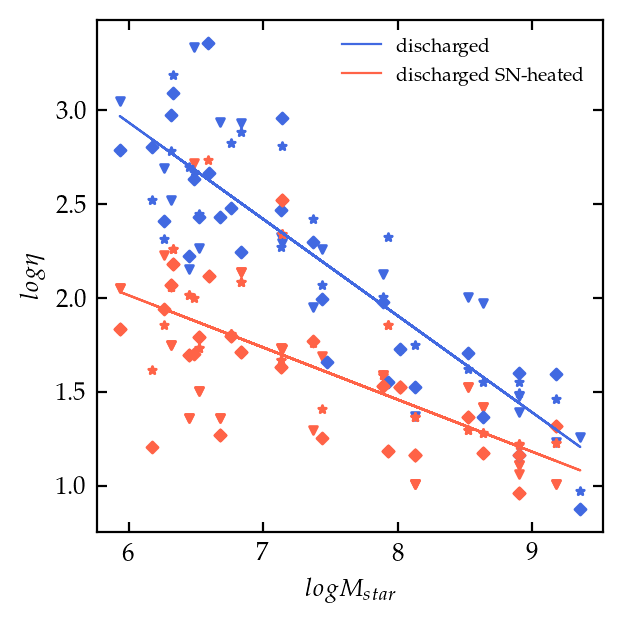

In [12]:
#Plot Mass Loading Factor over different Stellar Mass at different times in infall
'''
plot for infall before, post infall, and 1st pericenter
also plot separately for discharged only, snheated only, and expelled only
'''
#load the dataframes
output = pd.read_csv('/home/watanabe/watanabe_MAP/SNe-heated_Gas_Flow/SNeData/avg_mlf_calculation.csv') #discharged
expelled = pd.read_csv(f'{rootPath}SNe-heated_Gas_Flow/SNeData/avg_mlf_expelled_calculation.csv')
snheated = pd.read_csv(f'{rootPath}SNe-heated_Gas_Flow/SNeData/avg_mlf_snheated_calculation.csv')
expelledsnheated = pd.read_csv(f'{rootPath}SNe-heated_Gas_Flow/SNeData/avg_mlf_expelled_snheated_calculation.csv')

#linear line alignment
from scipy.optimize import curve_fit
def func(x,s,y0):
    return y0+s*x
# the initial guess for the function parameters:
s_guess = [1]
y_guess = [3]

t_parameter = np.array(['mlf_infall_before', 'mlf_infall_to_quench', 'mlf_1st_pericenter']) #different times
m_parameter = np.array(['v', '*', 'D'])

fig, ax = plt.subplots(1,1, dpi=200, figsize = (3,3))
disx,disy,snx,sny = np.array([]),np.array([]),np.array([]),np.array([])
for time, marker in zip(t_parameter, m_parameter):
    #plot different gas at the same timestep
    xb = np.log10(output['M_star'][np.isfinite(output[time])])
    yb = np.log10(output[time][np.isfinite(output[time])])
    b = ax.scatter(np.log10(output['M_star']), np.log10(output[time]), c = 'royalblue', marker = marker, s = 8)

    xb1 = np.log10(snheated['M_star'][np.isfinite(snheated[time]) & (snheated[time] != 0)])
    yb1 = np.log10(snheated[time][np.isfinite(snheated[time]) & (snheated[time] != 0)])
    b1 = ax.scatter(np.log10(snheated['M_star']), np.log10(snheated[time]), c = 'tomato', marker = marker, s = 8)

    
    disx = np.append(disx, xb)
    disy = np.append(disy, yb)
    snx = np.append(snx, xb1)
    sny = np.append(sny, yb1)
    
popt, pcov = curve_fit(func, disx, disy, p0=[s_guess,y_guess])
plt.plot(np.log10(output['M_star']), func(np.log10(output['M_star']), *popt), c = 'royalblue', lw = 0.8, label = 'discharged')
popt1, pcov1 = curve_fit(func, snx, sny, p0=[s_guess,y_guess])
plt.plot(np.log10(output['M_star']), func(np.log10(output['M_star']), *popt1), c = 'tomato', lw = 0.8, label = 'discharged SN-heated')
plt.legend(fontsize = 7)
ax.set_xlabel("$log M_{star}$")
ax.set_ylabel("$log \eta$")
plt.savefig(f'plots/mlf_dis_sn.pdf')
plt.show()

Mass loading factor generally decreases with stellar mass. This trend is much significant in discharged all gas than SN-heated discharged gas, meaning that SN-feedback has more dominant effect on gasw loss in massive galaxies.

Now I am able to see the fraction of mass loading factor increases with respect to stellar mass, which also corresponds to previous plot of fraction of gas outflow as well.

It seems that mlf at different times at infall doesn't play a pivotal role in this. This is because SFR changes with different times and $\eta$ by nature supresses the role of SFHs. However, this is meaningful in that by normalizing the changing SFRs over time, we can see the constant effect of SN-feedback on boosting the gas outflow. Since massive galaxies tend to have higher ratio of SN-driven gas loss, it indicates the cruicial role of internal processes such as SN-feedback that can accelerate the quenching mechanism. 